In [379]:
#!pip3 install flake8 pycodestyle_magic

In [380]:
!pip3 install xgboost

In [381]:
try: 
    !pip3 install scikit-learn==0.24
except:
    pass

'\ntry: \n    !pip3 install scikit-learn==0.24\nexcept:\n    pass\n'

In [432]:
from pickle import Unpickler as Upck
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn import tree
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, DotProduct
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
import xgboost as xgb
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, normalize
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score, ShuffleSplit, KFold, RepeatedKFold, LeaveOneOut, LeavePOut, StratifiedKFold, RepeatedStratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

from scipy.stats import normaltest, norm, gamma, chisquare, f_oneway, kruskal, spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor  as vif 
from statsmodels.stats.diagnostic import acorr_ljungbox, kstest_normal
from scipy.stats import normaltest, norm

pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)

#%load_ext pycodestyle_magic
#%pycodestyle_on

# Data

In [383]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', sep=',')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', sep=',')
y = df_train[['SalePrice']]
idx_test = df_test[['Id']]

In [384]:
# Visualisation train
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [385]:
# Visualisation train
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [386]:
print('df_train: ', df_train.shape)
print('df_test: ', df_test.shape)

df_train:  (1460, 81)
df_test:  (1459, 80)


In [387]:
# Count of NA values %
df_train.count()/df_train.shape[0]

Id               1.000000
MSSubClass       1.000000
MSZoning         1.000000
LotFrontage      0.822603
LotArea          1.000000
Street           1.000000
Alley            0.062329
LotShape         1.000000
LandContour      1.000000
Utilities        1.000000
LotConfig        1.000000
LandSlope        1.000000
Neighborhood     1.000000
Condition1       1.000000
Condition2       1.000000
BldgType         1.000000
HouseStyle       1.000000
OverallQual      1.000000
OverallCond      1.000000
YearBuilt        1.000000
YearRemodAdd     1.000000
RoofStyle        1.000000
RoofMatl         1.000000
Exterior1st      1.000000
Exterior2nd      1.000000
MasVnrType       0.994521
MasVnrArea       0.994521
ExterQual        1.000000
ExterCond        1.000000
Foundation       1.000000
BsmtQual         0.974658
BsmtCond         0.974658
BsmtExposure     0.973973
BsmtFinType1     0.974658
BsmtFinSF1       1.000000
BsmtFinType2     0.973973
BsmtFinSF2       1.000000
BsmtUnfSF        1.000000
TotalBsmtSF 

In [388]:
# put NA to all negative value
for col in df_train:
    if df_train[col].dtypes != 'object' and col != 'SalePrice':
        df_train[col] = df_train[col].where(df_train[col] >= 0)
        df_test[col] = df_test[col].where(df_test[col] >= 0)

In [389]:
# Suppress columns too empty
limit = 0.6

for col in df_train:
    if df_train[col].count()/df_train.shape[0] < limit:
        del(df_train[col])
        del(df_test[col])
        print('col deleted', col)

df_train.head()

col deleted Alley
col deleted FireplaceQu
col deleted PoolQC
col deleted Fence
col deleted MiscFeature


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

In [390]:
# Look at the columns types
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [391]:
# values.count() per feature
# we can see that many feature contains almost times the same value
# this kind of feature is useless for any model
for col in df_train:
    if df_train[col].dtypes == 'object':
        print(df_train[col].value_counts(), '\n')

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

Pave    1454
Grvl       6
Name: Street, dtype: int64 

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64 

Norm      1260
Feedr     

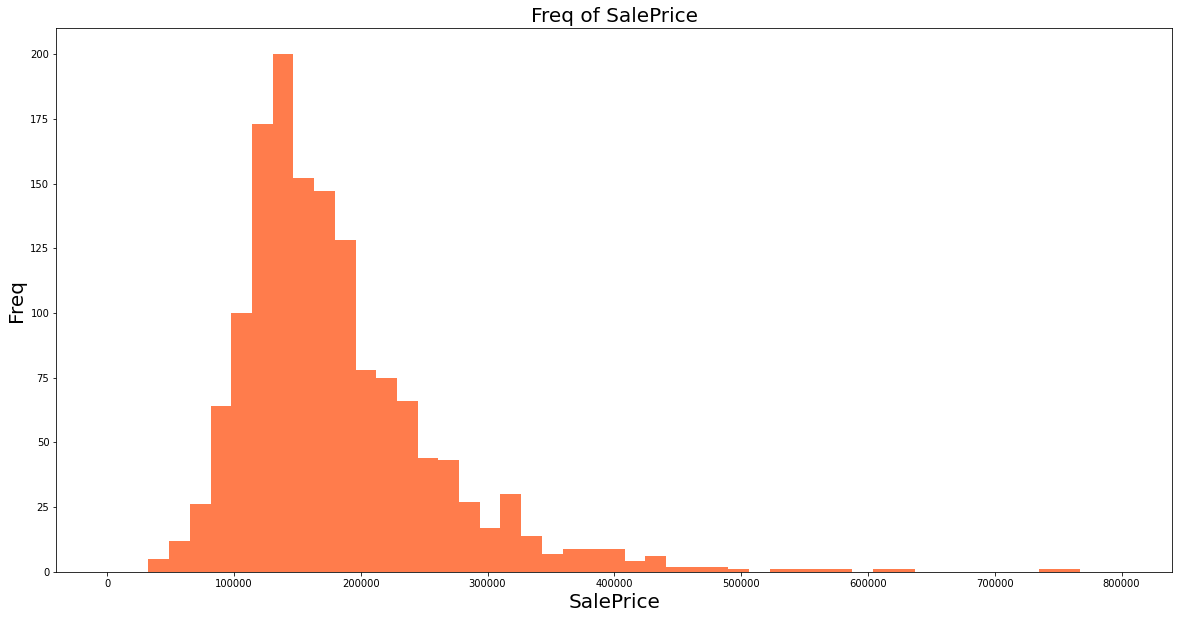

In [392]:
# Visualisation of 'SalePrice'
plt.figure(figsize=(20, 10))
plt.hist(df_train['SalePrice'].values, bins=np.linspace(0, 800000, 50), color="orangered", alpha=0.7)
plt.xlabel("SalePrice", fontsize=20)
plt.ylabel("Freq", fontsize=20)
plt.title("Freq of SalePrice", fontsize=20)
plt.show()

In [393]:
# Suppress outliers
col = 'SalePrice'
df_train = df_train[df_train[col] >= df_train[col].quantile(0.01)]
df_train = df_train[df_train[col] <= df_train[col].quantile(0.99)]
y = df_train[['SalePrice']]

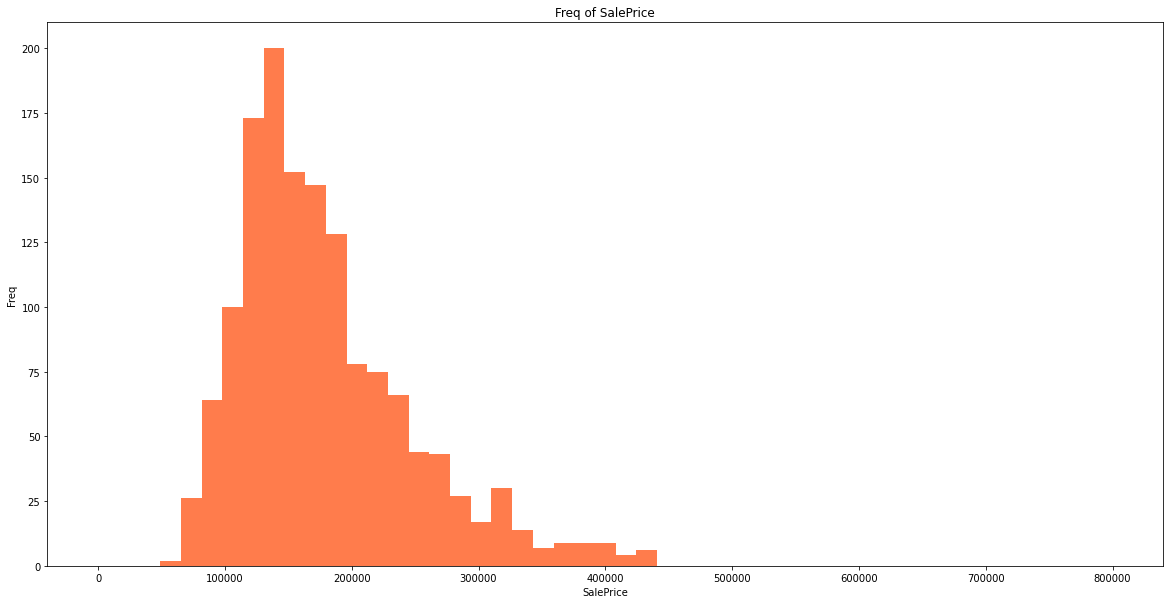

In [394]:
# Visualisation of 'SalePrice'
plt.figure(figsize=(20, 10))
plt.hist(df_train['SalePrice'].values, bins=np.linspace(0, 800000, 50), color="orangered", alpha=0.7)
plt.xlabel("SalePrice")
plt.ylabel("Freq")
plt.title("Freq of SalePrice")
plt.show()

### check the link between categorical value and 'SalePrice'

MSZoning :  1.42564232828642e-54
Street :  0.24002394008212596
LotShape :  7.5900487245501595e-31
LandContour :  1.7060671421205095e-07
Utilities :  0.5146302652772275
LotConfig :  2.5405837321791802e-06
LandSlope :  0.02105238028668557
Neighborhood :  3.085922965229001e-160
Condition1 :  1.0976135196539989e-13
Condition2 :  0.009800570910189753
BldgType :  1.8009601251382423e-14
HouseStyle :  1.6929356192557498e-35
RoofStyle :  1.3012000089376069e-05
RoofMatl :  0.052581331128780516
Exterior1st :  6.224554437677834e-55
Exterior2nd :  1.7074509157250737e-49
MasVnrType :  6.452899779800884e-54
ExterQual :  8.524187961142656e-140
ExterCond :  2.9328129671826777e-06
Foundation :  3.111197105989413e-97
BsmtQual :  4.167503797885198e-129
BsmtCond :  1.878692560865233e-10


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


BsmtExposure :  1.5606595863058843e-26
BsmtFinType1 :  1.584594542496679e-58
BsmtFinType2 :  0.05674341760855745
Heating :  0.00011538506651312374
HeatingQC :  5.208698079374583e-69
CentralAir :  7.894810493401197e-26
Electrical :  7.788610583482051e-23
KitchenQual :  3.714609674126697e-133
Functional :  8.669118089974612e-05
GarageType :  2.444493540905889e-86
GarageFinish :  1.463673400670995e-106
GarageQual :  2.6183213690433164e-13
GarageCond :  2.4897067334598525e-11
PavedDrive :  5.399337643427716e-21
SaleType :  4.6923752129710996e-27
SaleCondition :  3.433802842223303e-31


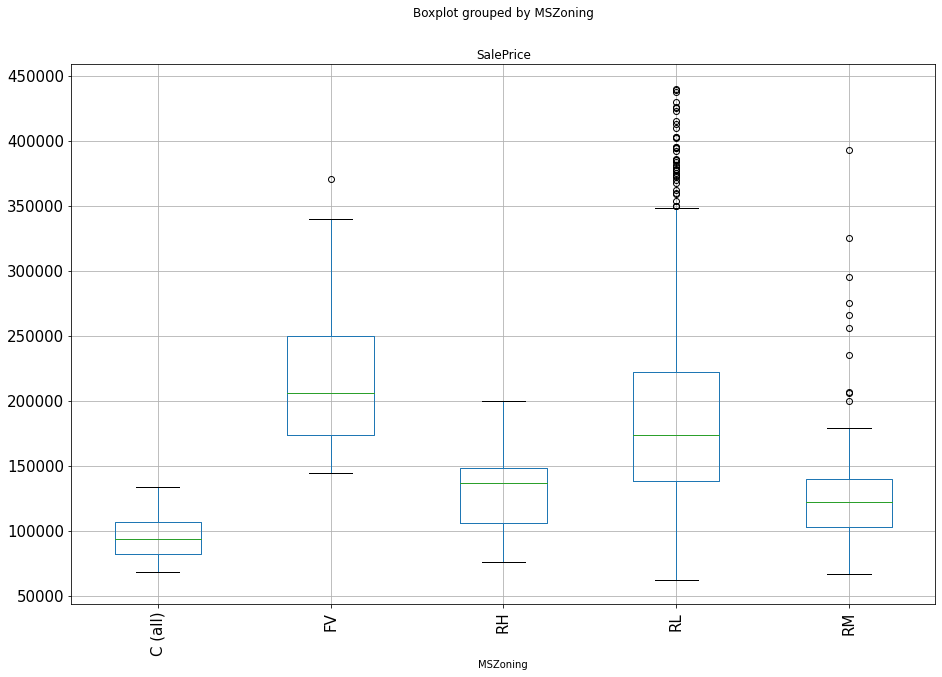

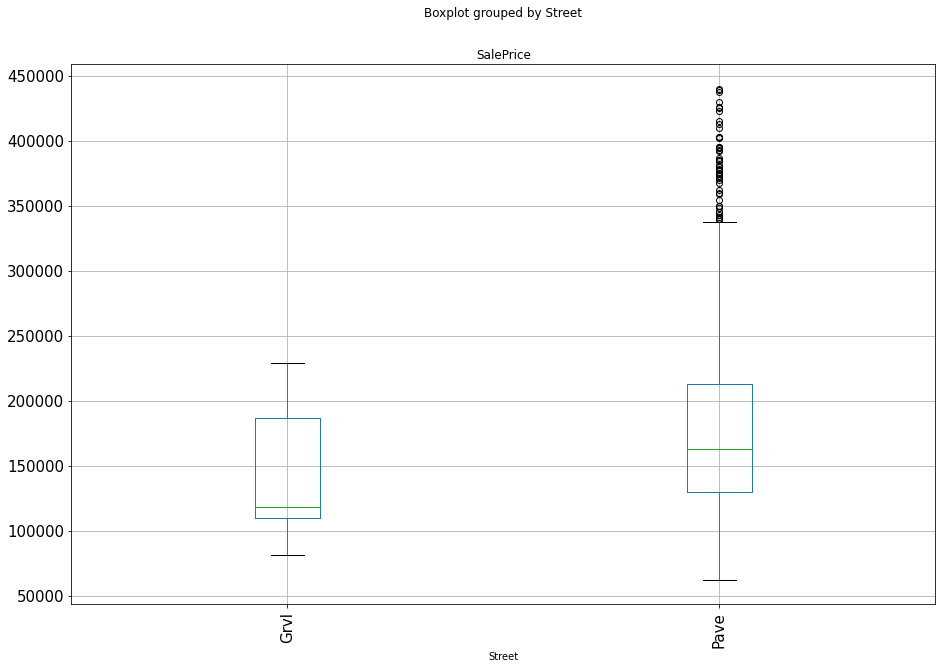

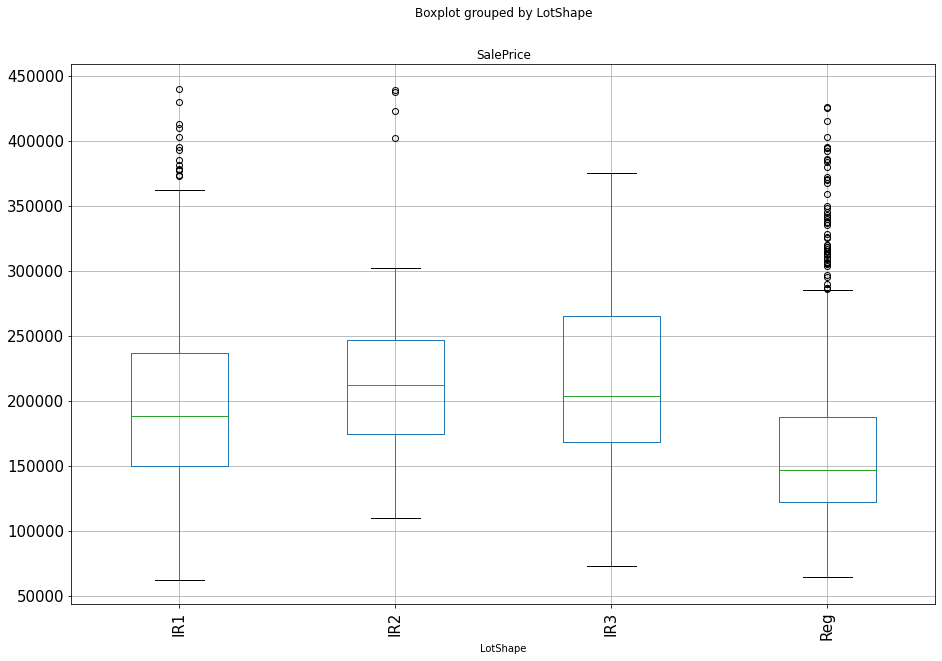

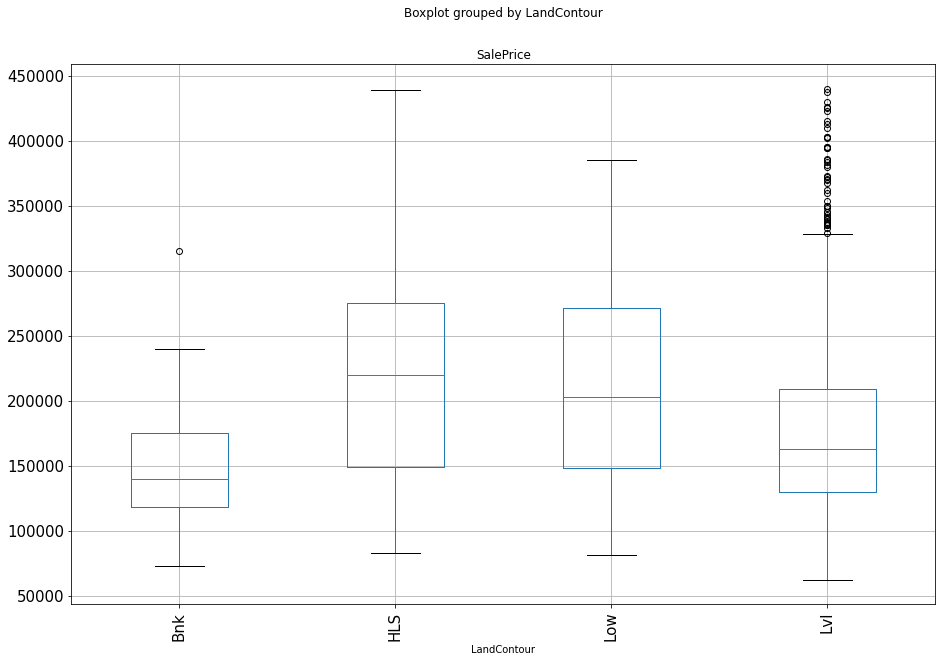

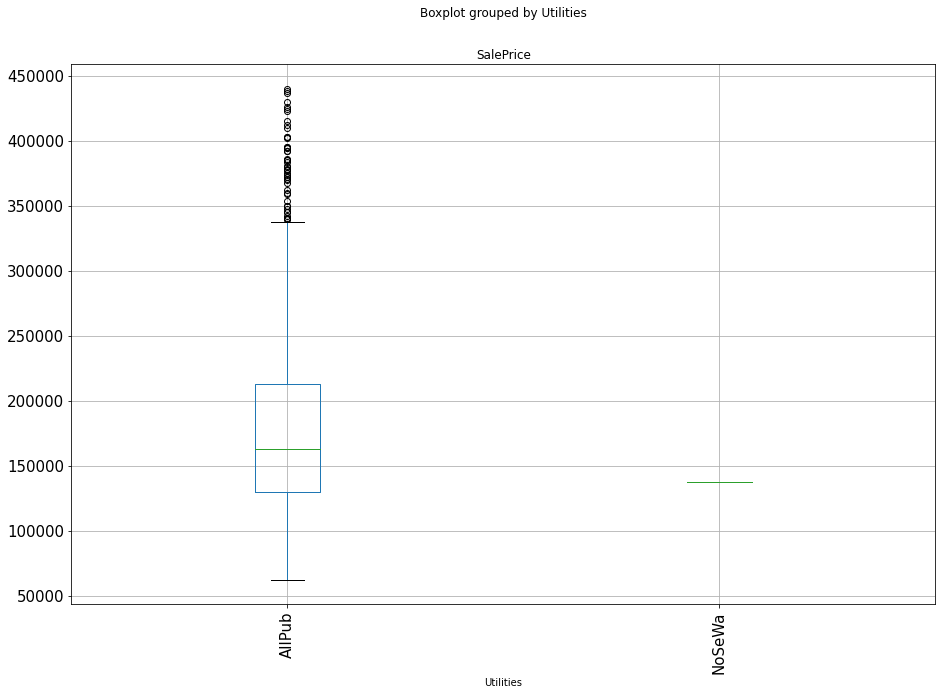

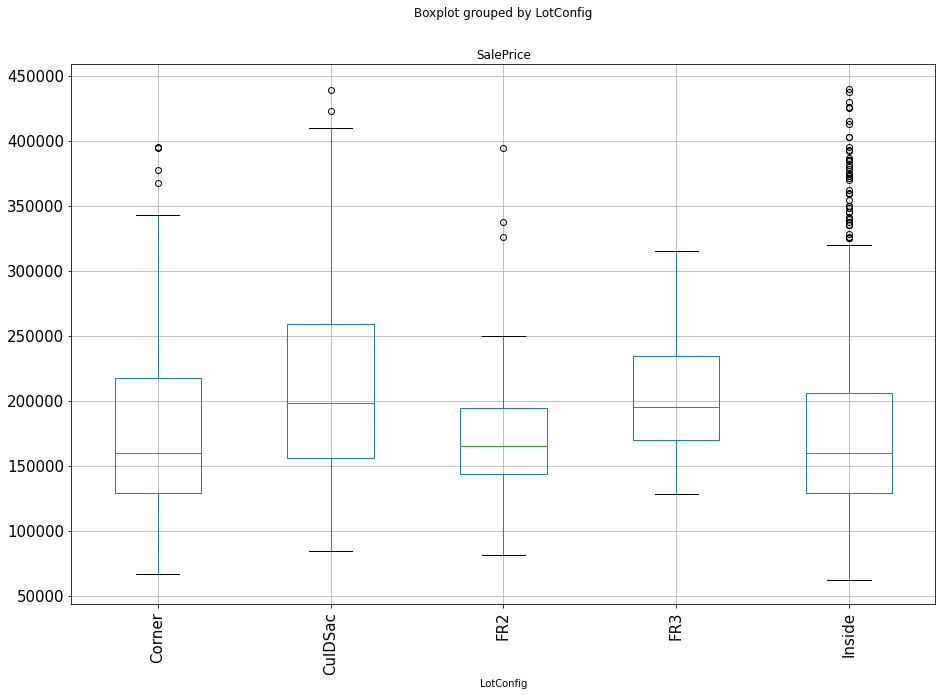

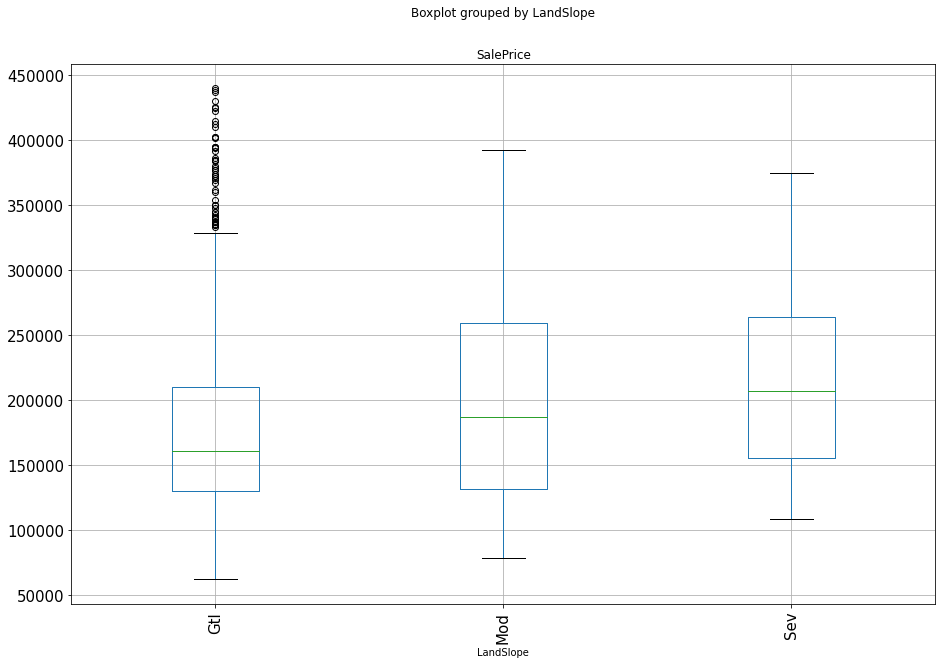

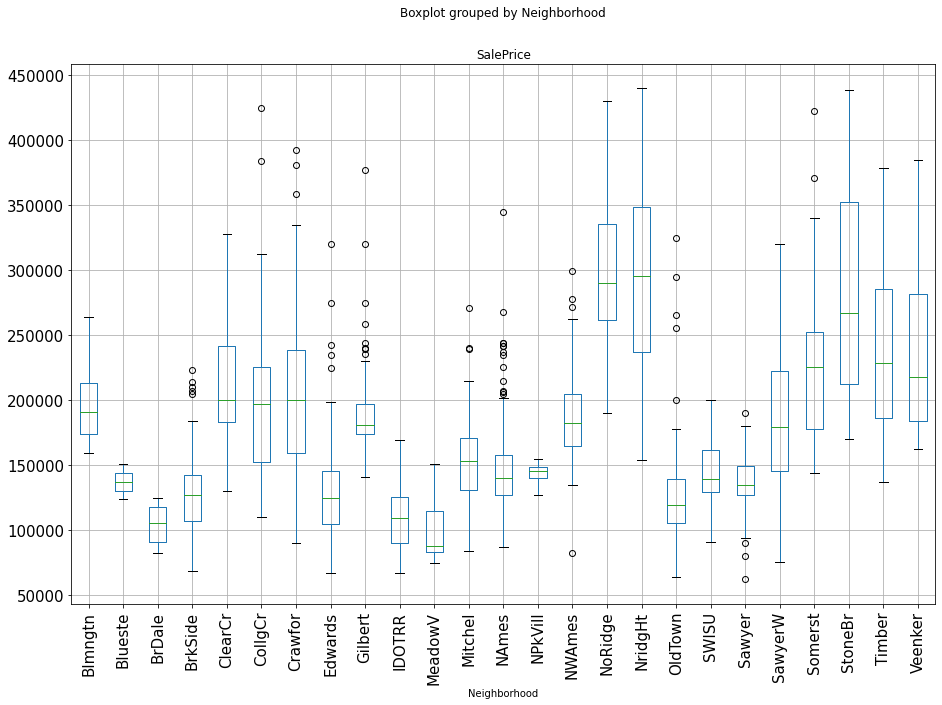

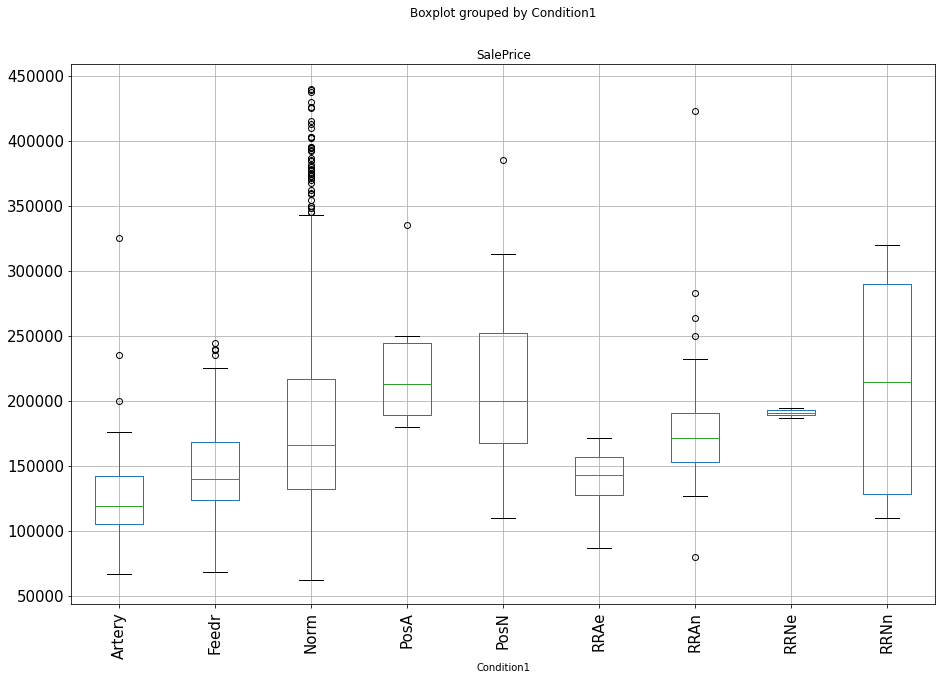

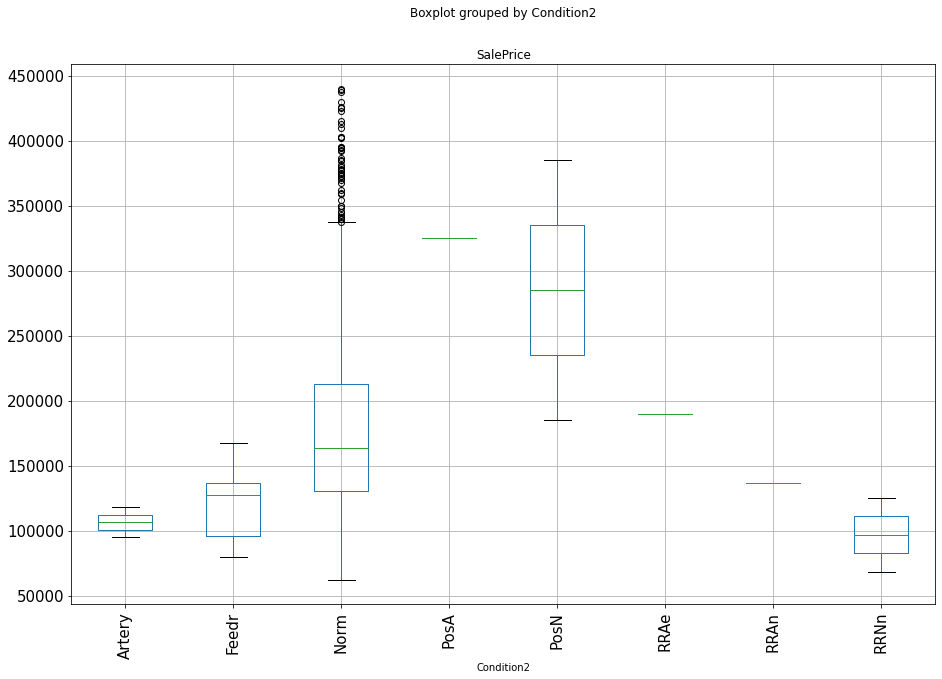

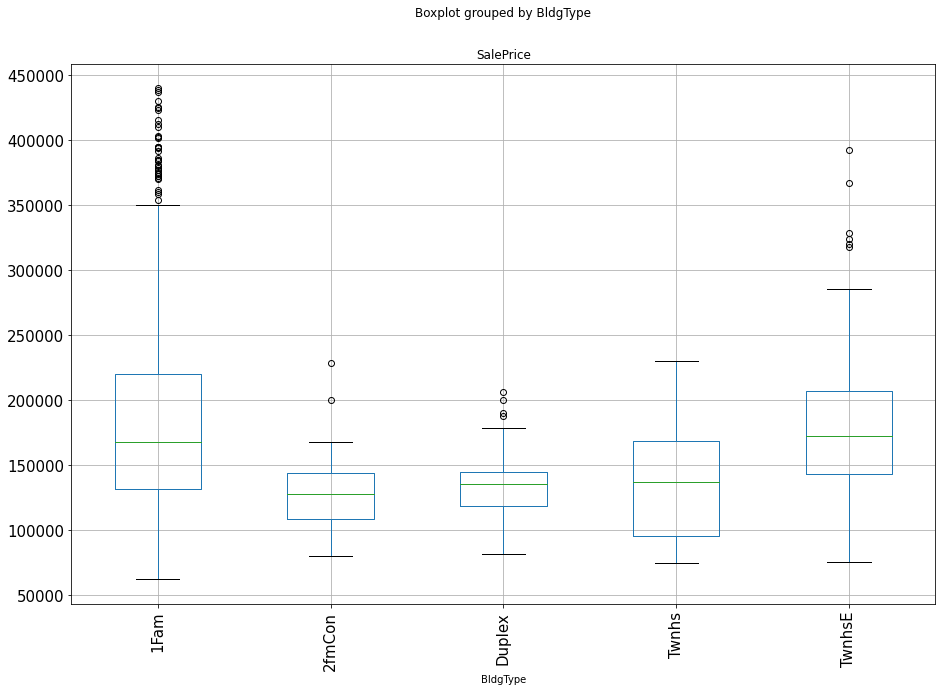

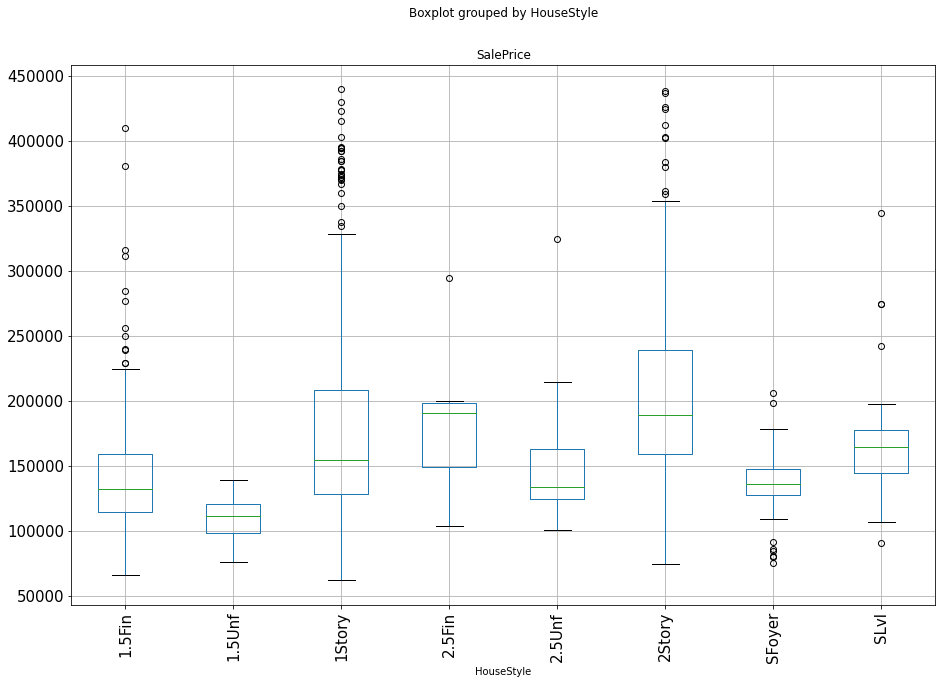

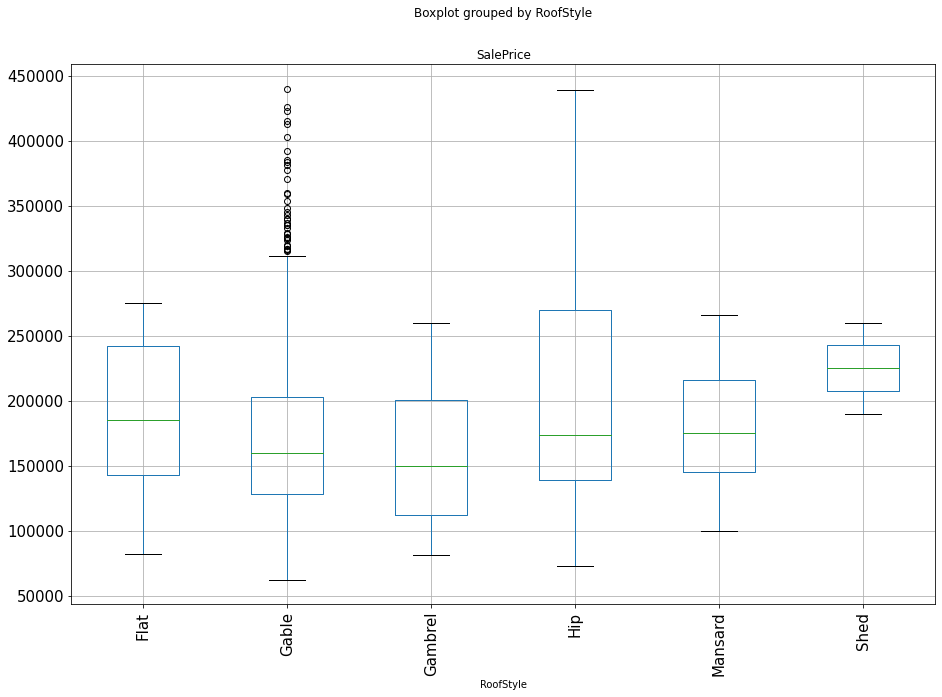

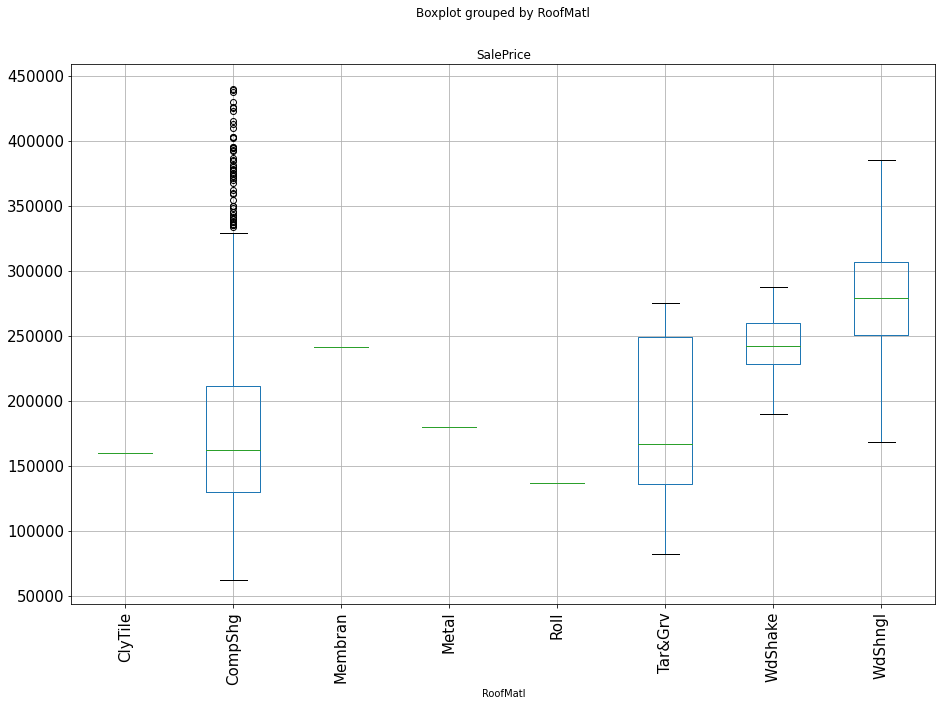

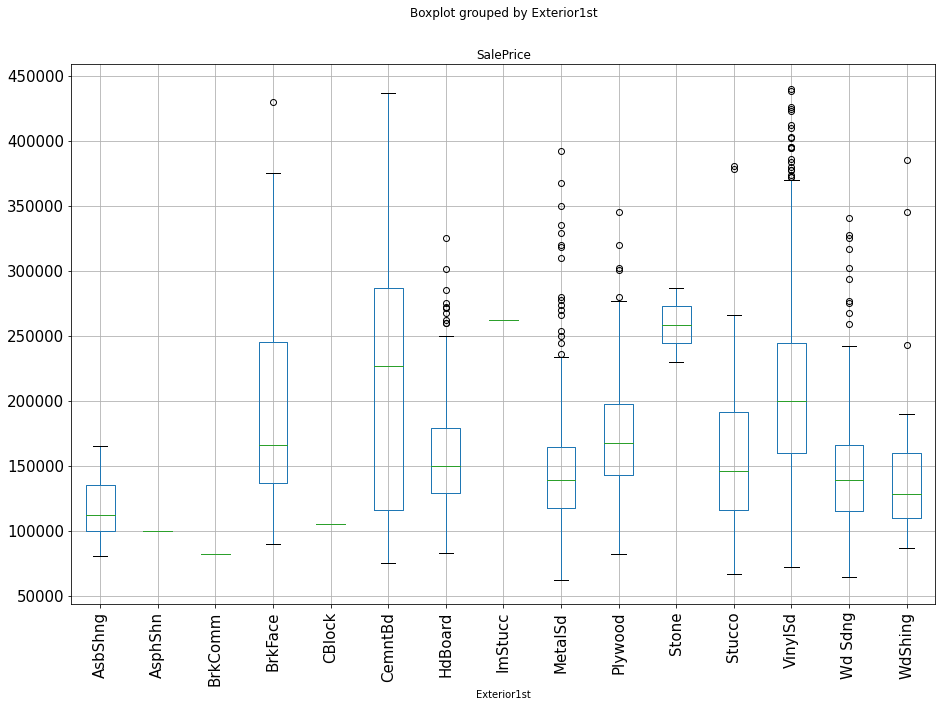

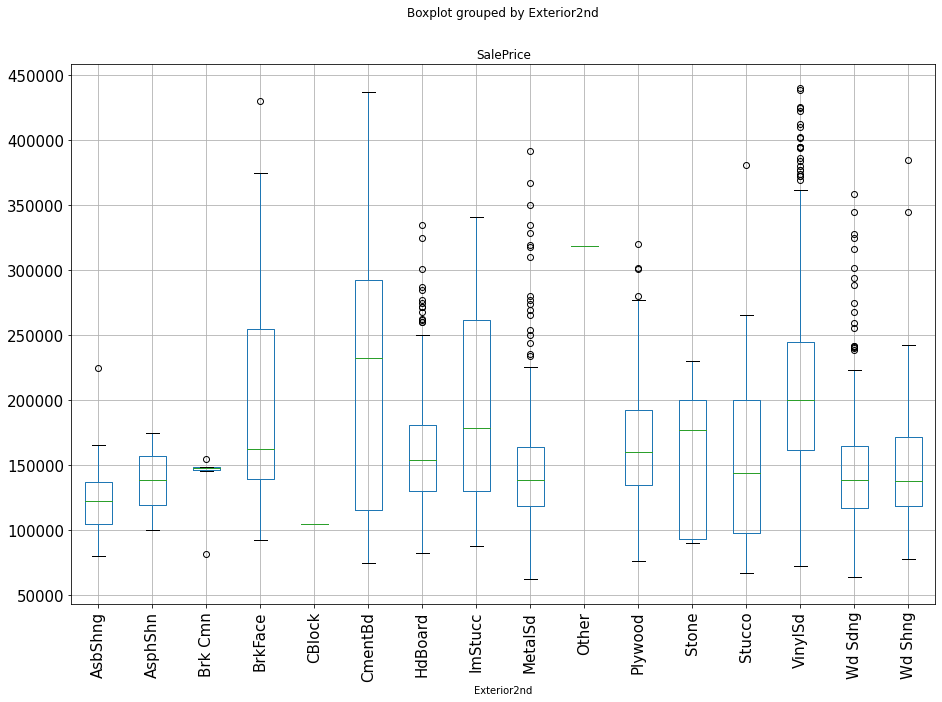

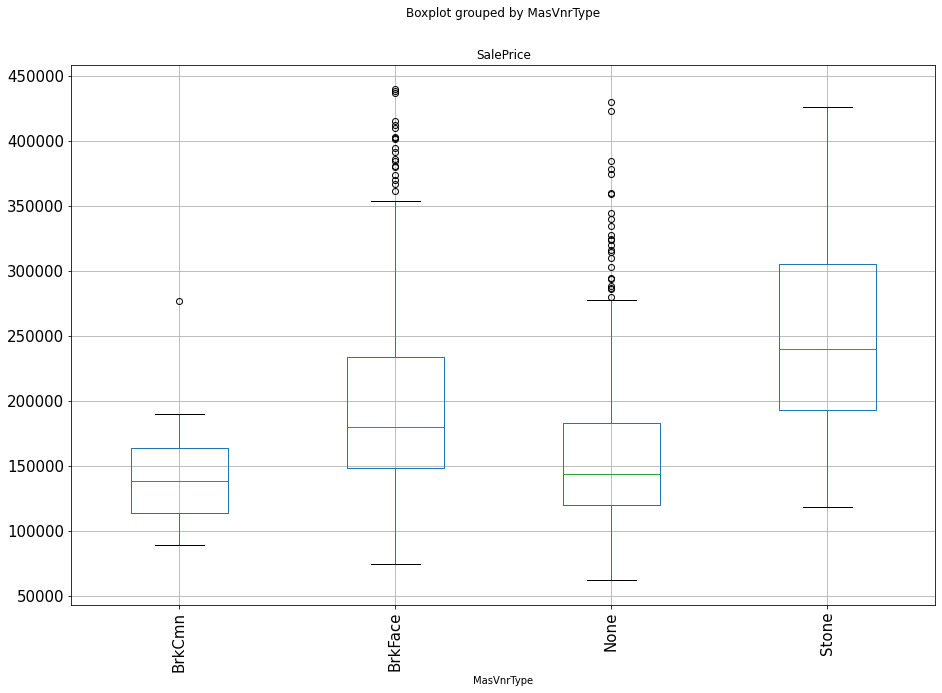

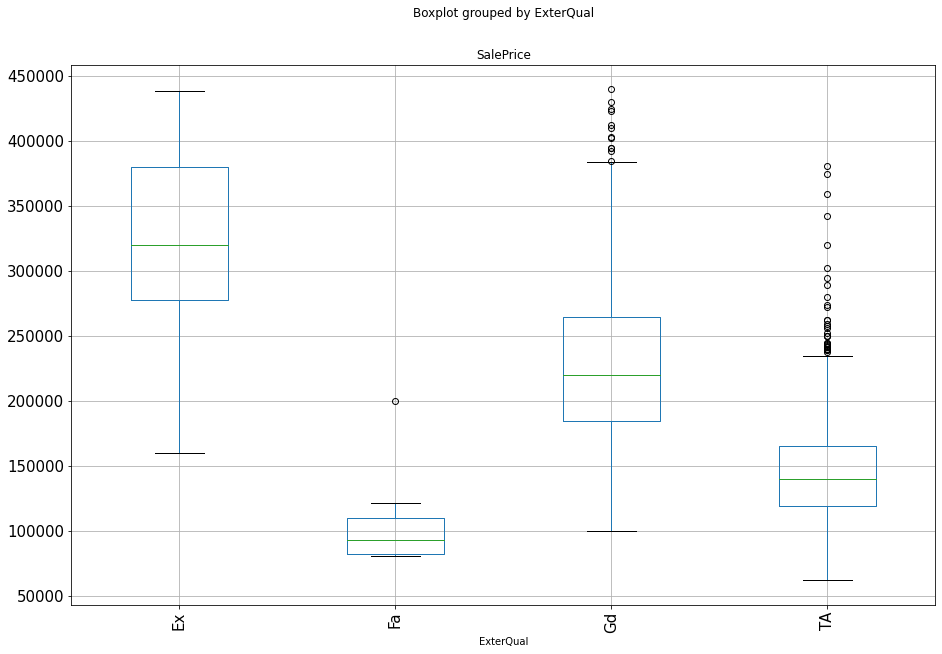

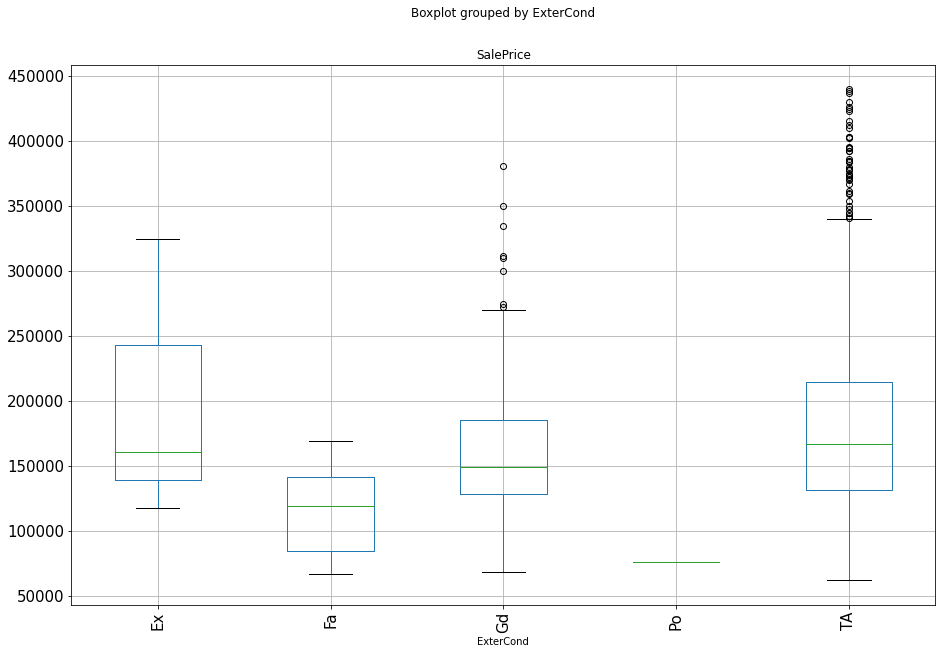

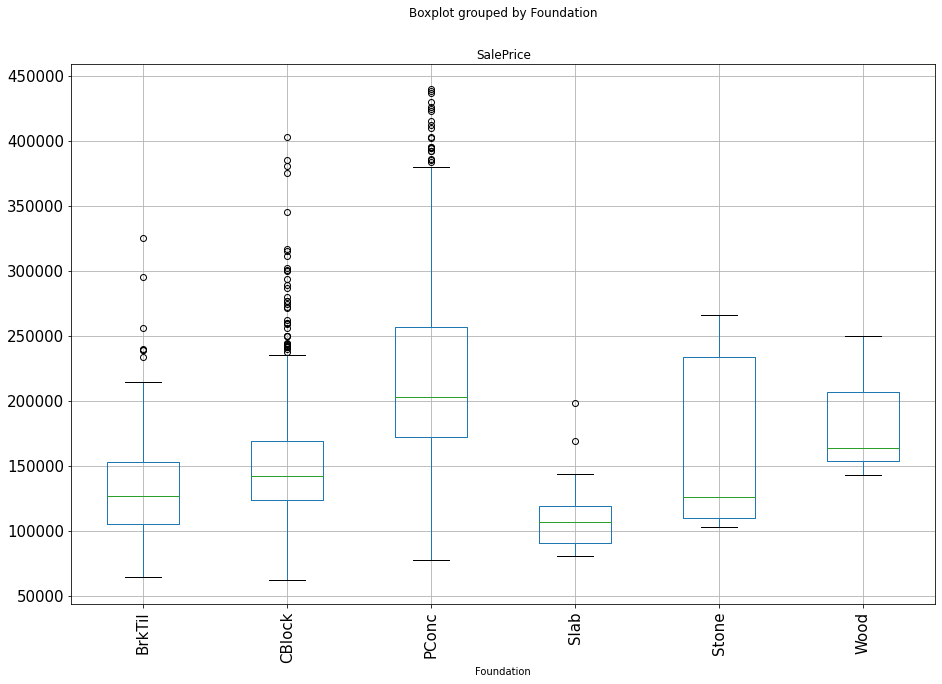

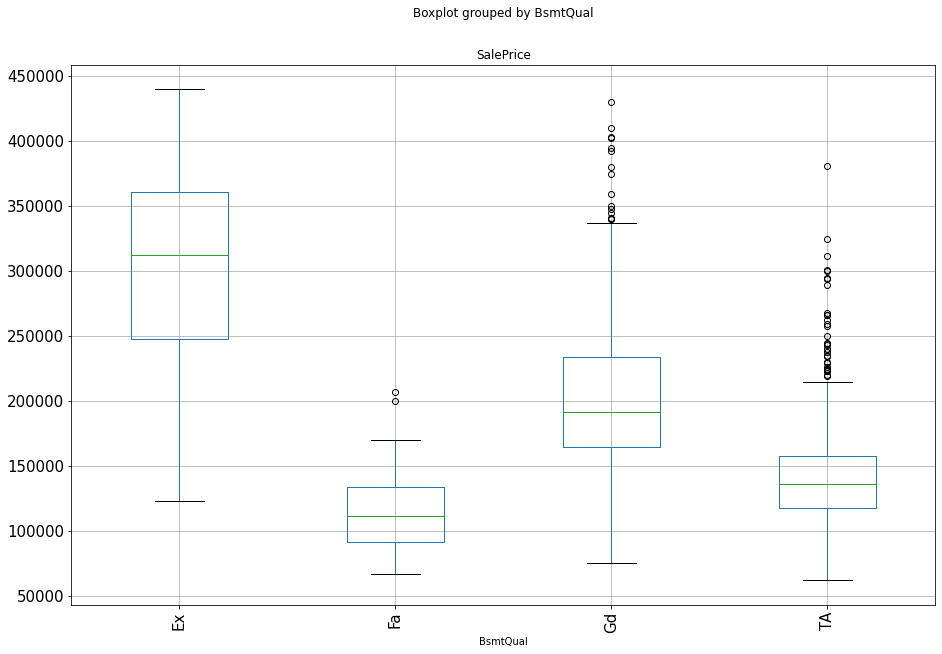

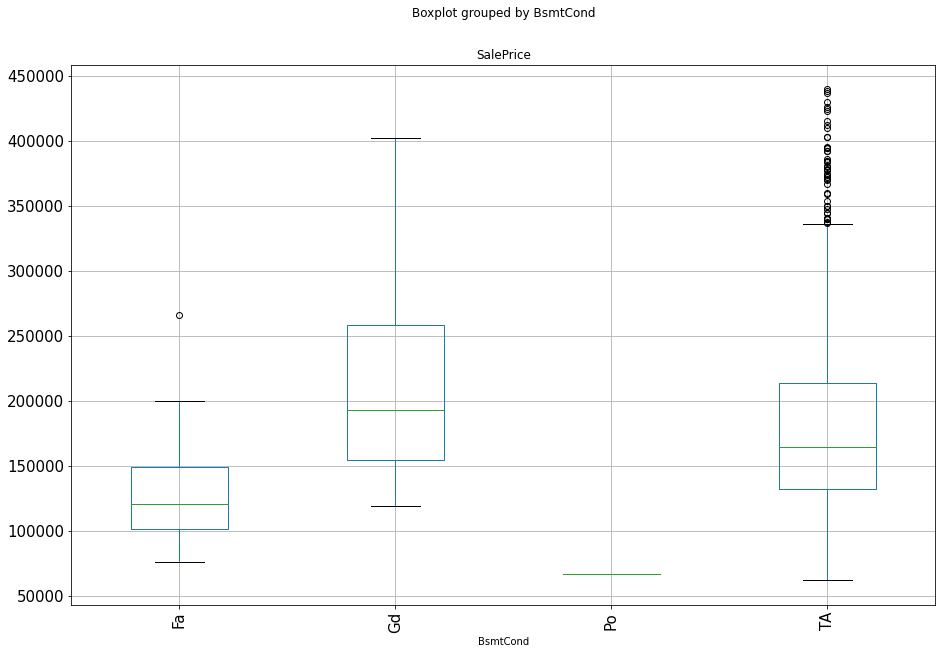

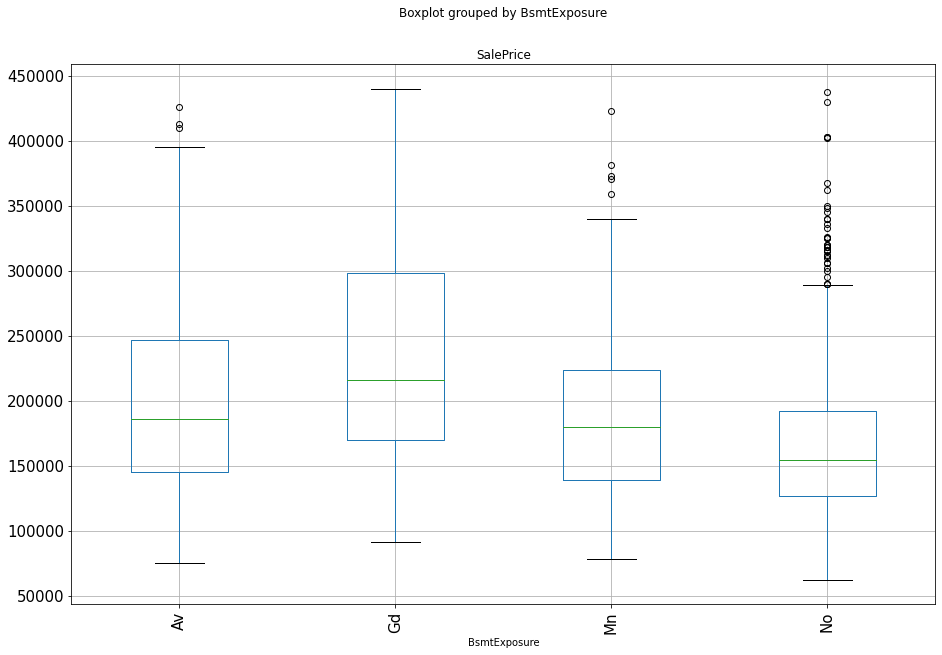

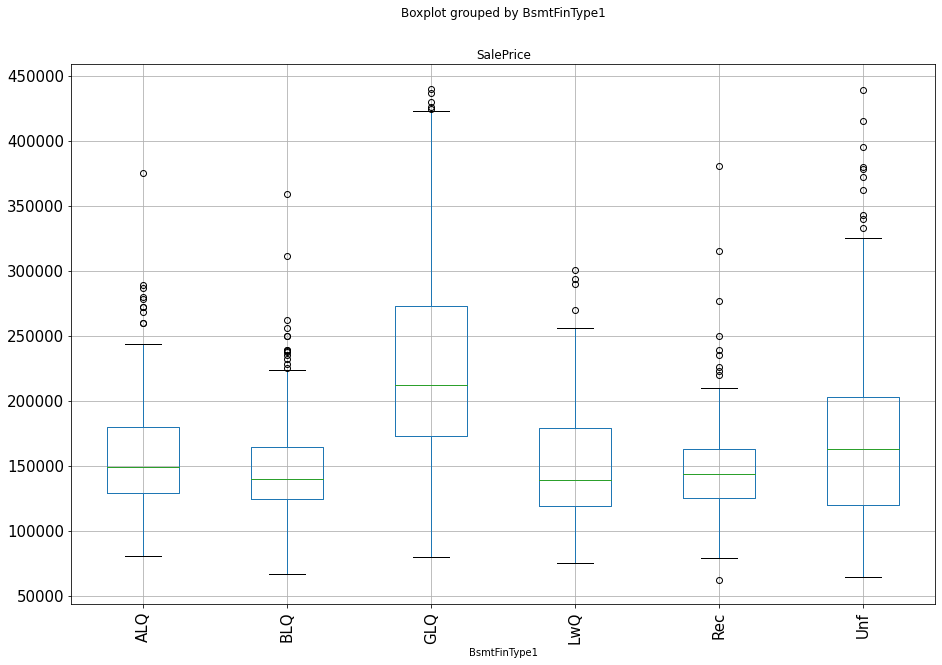

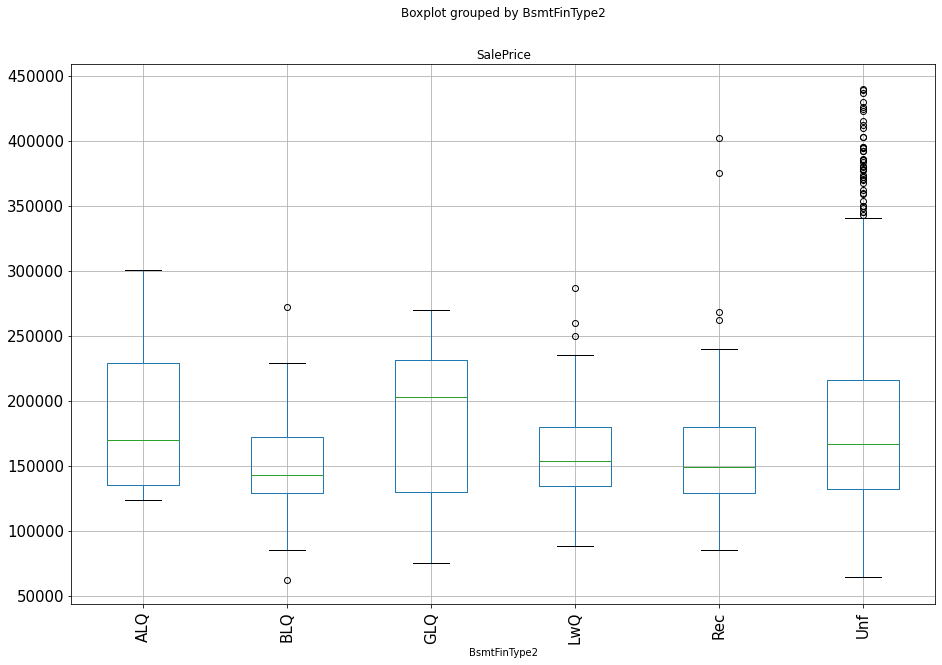

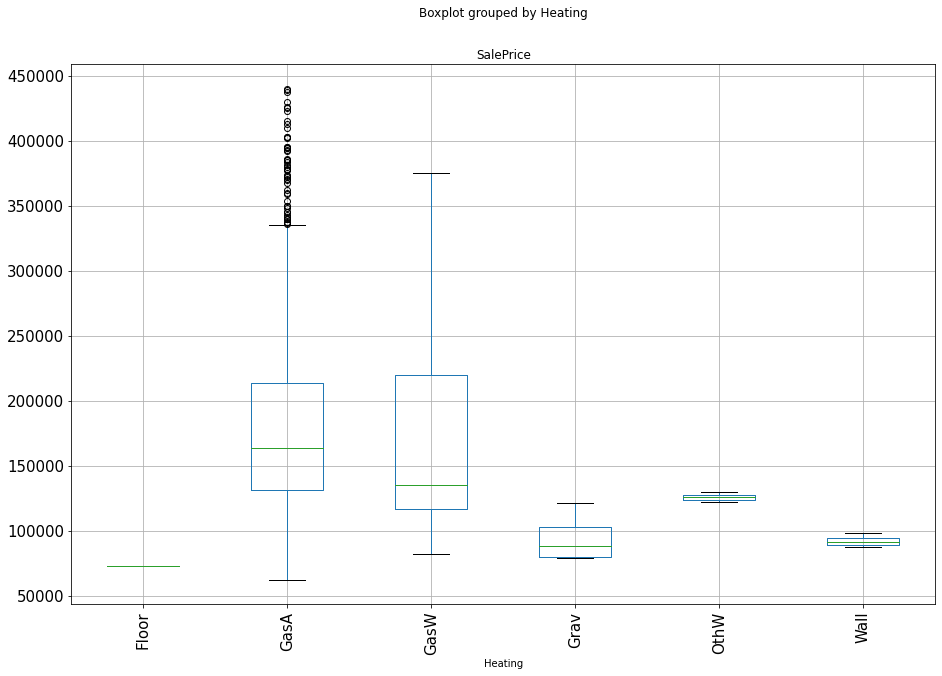

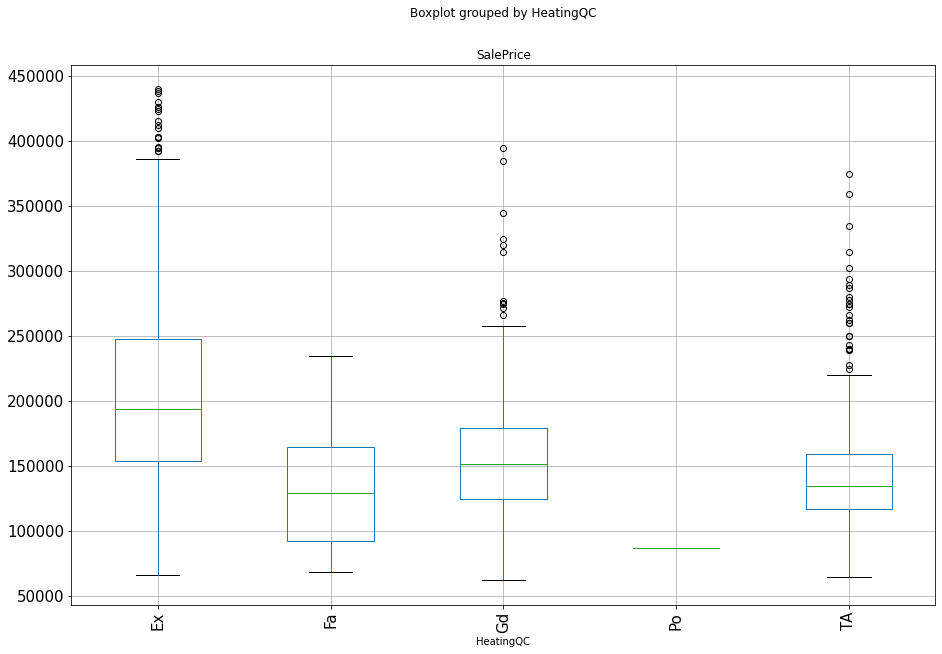

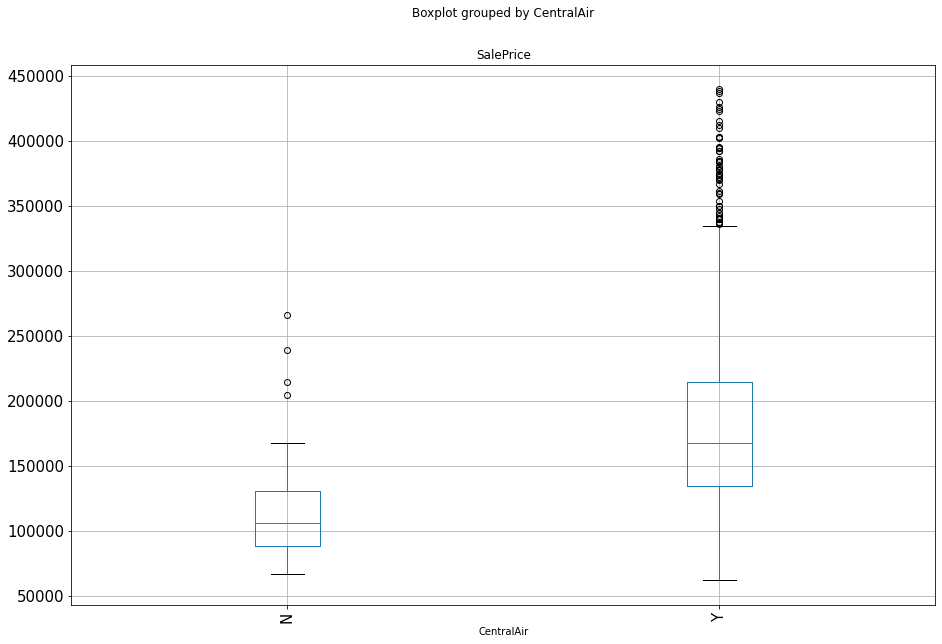

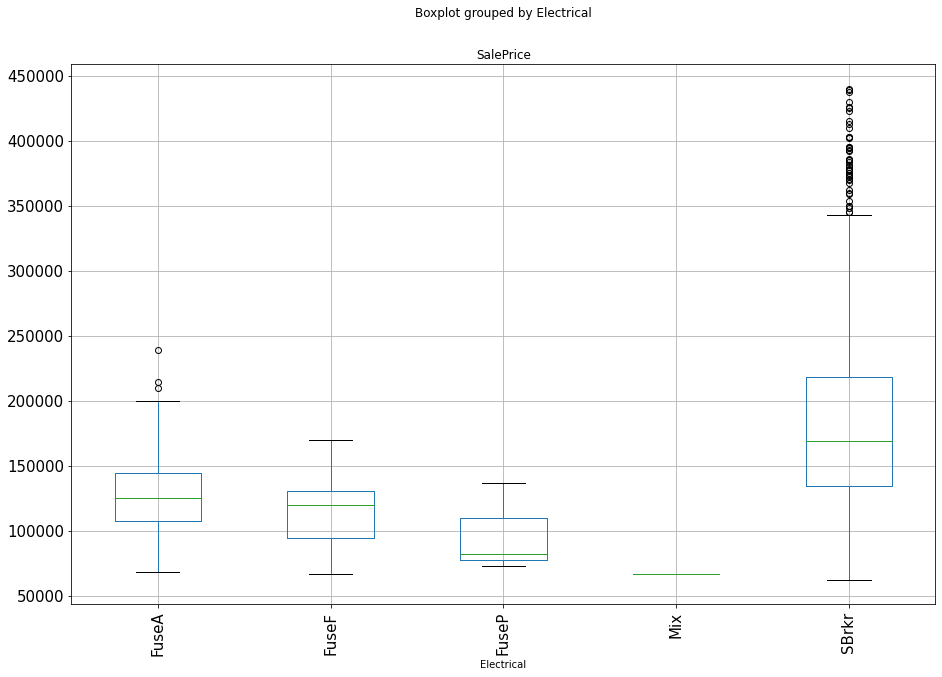

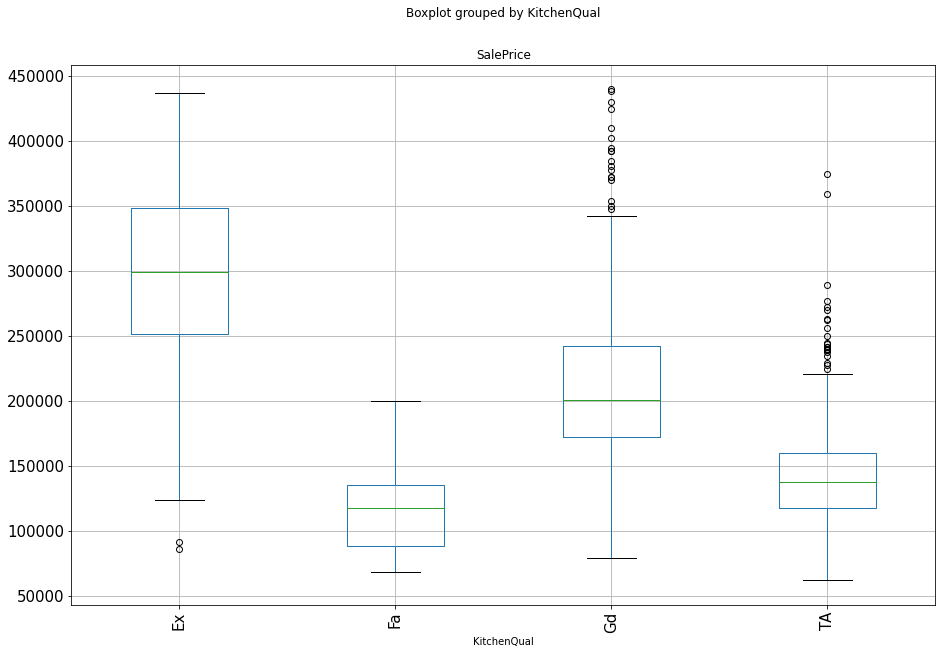

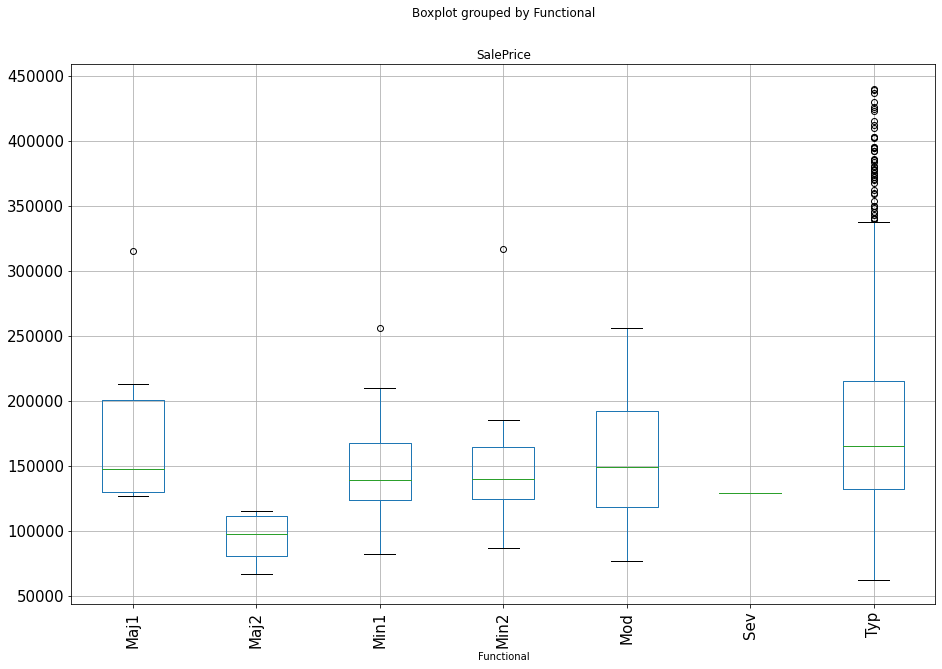

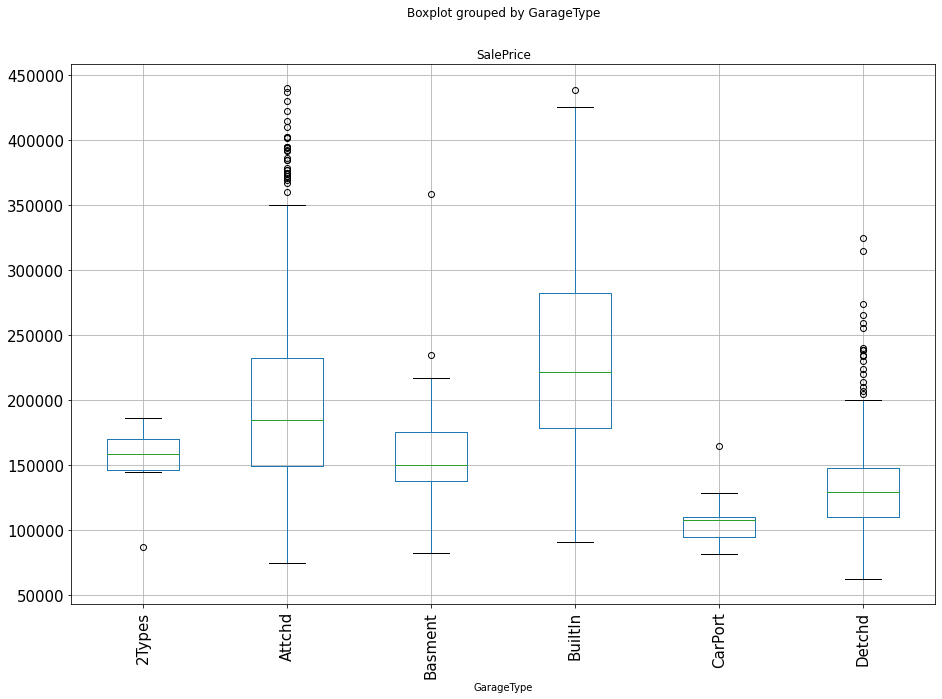

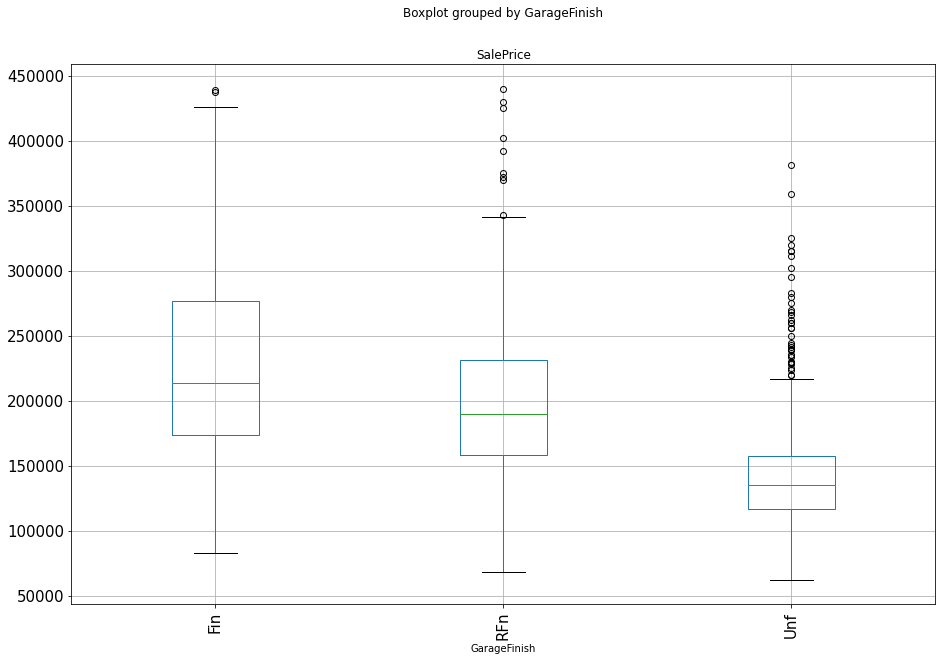

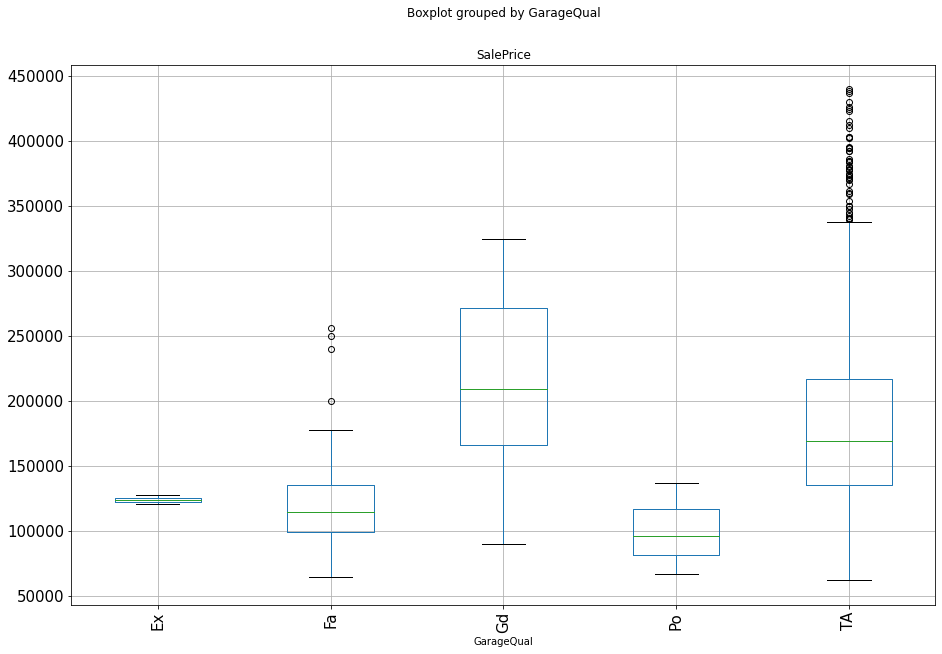

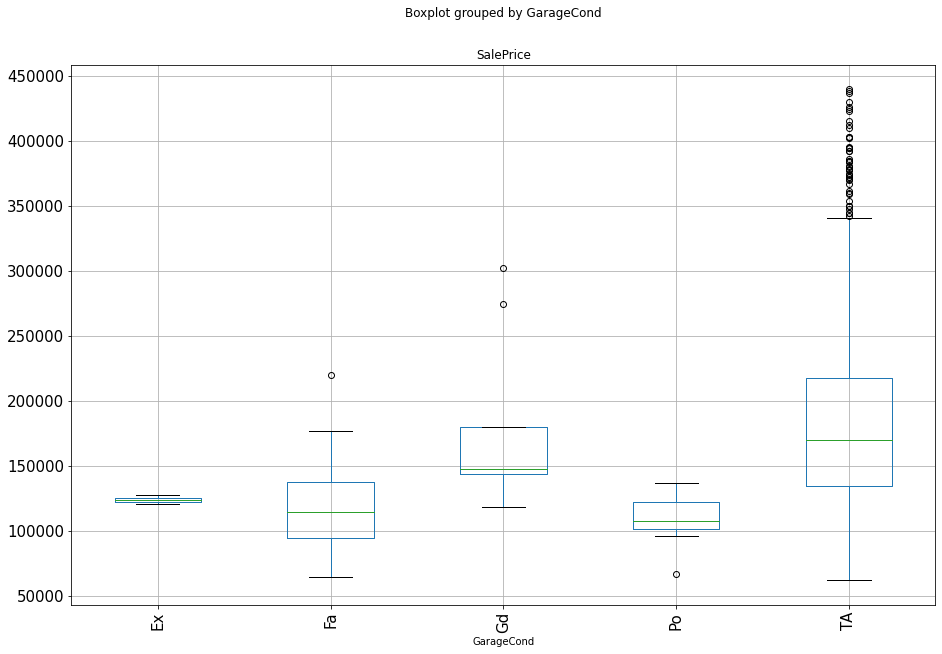

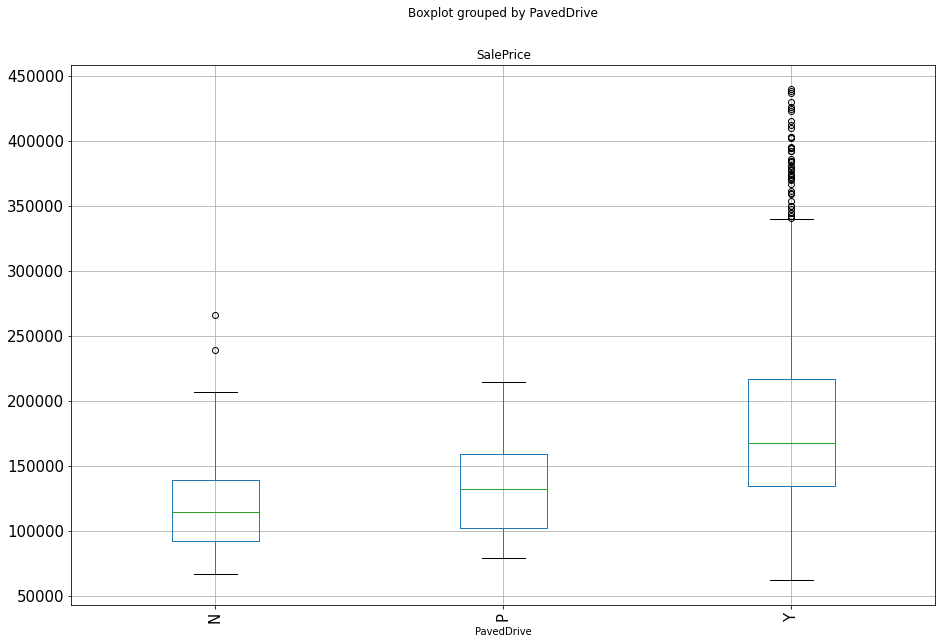

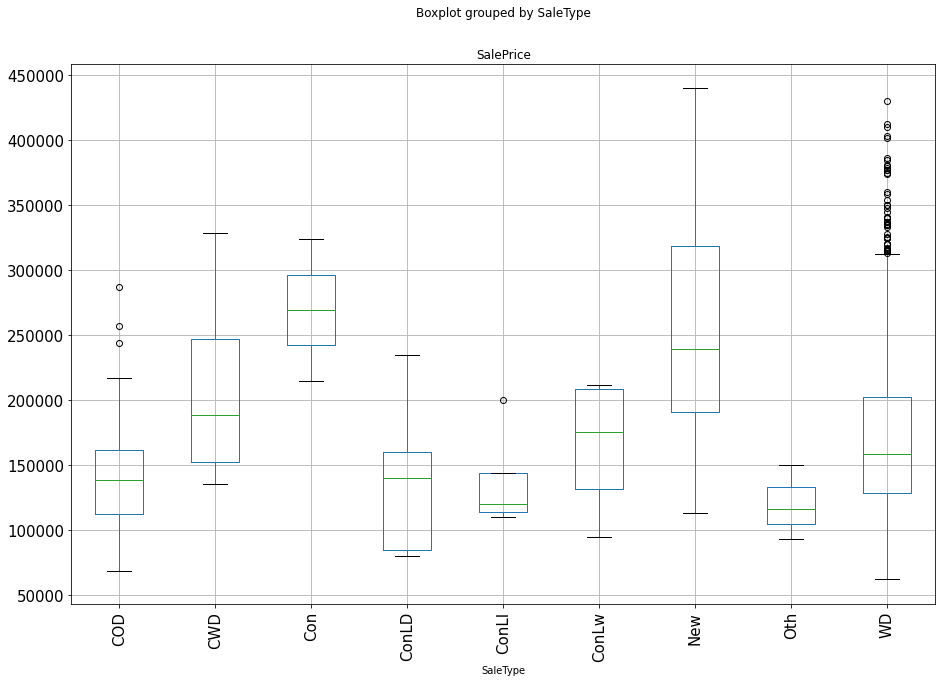

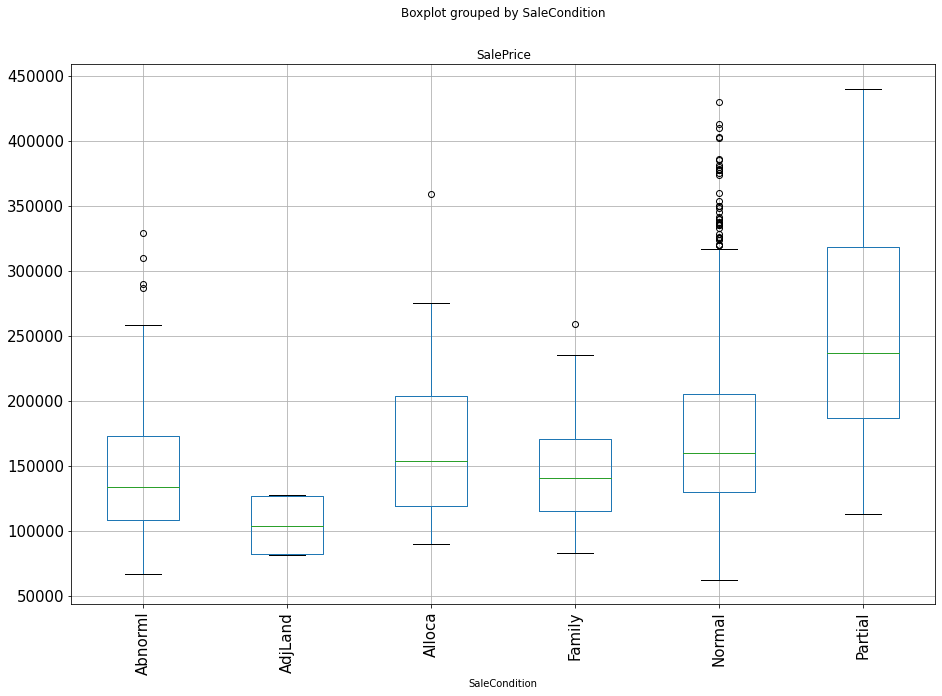

In [395]:
# link beteween categorical data and prices
# feature to kill
useless = []
for col in df_train.columns.values:
    if df_train[col].dtypes == 'object':
        value = df_train[col].value_counts().index.values
        kruskal_data = []
        if len(value) >= 2:
            for val in value:
                kruskal_data.append(df_train[df_train[col] == val]['SalePrice'].values)
            _, p_value = kruskal(*kruskal_data)
            print(col, ': ',p_value)
            df_train.boxplot(column='SalePrice', by=col, rot=90, fontsize=15, figsize=(15, 10))
            
            if p_value > 0.05:
                useless.append(col)

In [396]:
# feature to delete
print(useless)
for col in useless:
    del(df_train[col])
    del(df_test[col])

['Street', 'Utilities', 'RoofMatl', 'BsmtFinType2']


In [397]:
# we treat categorical and numerical values separately  
cat = []
num = []
for col in df_train:
    if df_train[col].dtypes == 'object':
        cat.append(col)
    elif col != 'SalePrice' and col != 'Id':
        num.append(col)
        
df_train_cat = df_train[cat]
df_train_num = df_train[num]
df_test_cat = df_test[cat]
df_test_num = df_test[num]

In [398]:
# We want to use a KNN imputer 
# to complete NA value.
# we have to ordinal encode
# because of imputer accept 
# only numrical values

# we take the first one value 'k1, k2'
# to complete all the NA.
# in the same time we kept
# the NA vlaue position
# with 'mask'.
k1 = '$$'  # df_train_cat.iloc[0,0]
k2 =  '$$'  # df_test_cat.iloc[0,0]
# mask to record the actual NA value
# positions
mask_cat_train = df_train_cat.isna()
mask_cat_test1 = df_test_cat.isna()
# fill the NA value
df_train_cat = df_train_cat.fillna(k1)
df_test_cat = df_test_cat.fillna(k2)

# Ordinal Encoder
X_train = df_train_cat.to_numpy()
X_test = df_test_cat.to_numpy()
# to manage unknown values on X_test
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
X_train = oe.fit_transform(X_train)
# to avoid dataleakage
X_test = oe.transform(X_test)

# we create a DataFrame
# with encoded value and
# we put back NA value
df_train_cat = pd.DataFrame(data=X_train, columns=df_train_cat.columns, index=df_train.index)
df_train_cat = df_train_cat.where(~mask_cat_train == True)

df_test_cat = pd.DataFrame(data=X_test, columns=df_test_cat.columns, index=df_test.index)
mask_cat_test2 = df_test_cat.isna()
# initial NA and NA generate on transform
mask = np.logical_or(mask_cat_test1, mask_cat_test2)
df_test_cat = df_test_cat.where(~mask == True)

In [399]:
# we recreate df_train 
# with encoded values
df_train = pd.concat([df_train_num, df_train_cat], axis=1)
df_test = pd.concat([df_test_num, df_test_cat], axis=1)
df_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   MSZoning  LotShape  LandContour  LotConfig  LandSlope  Neighborhood  \
0       3.0       3.0          3.0        4.0        0.0           5.0   
1       3.0       3.0          3.0        2.0        0.0          24.0   
2       3.0       0.0          3.0        4.0        0.0           5.0   
3       3.0       0.0          3.0        0.0        0.0           6.0   
4       3.0       0.0          3.0        2.0        0.0          15.0   

   Condition1  Condition2  BldgType  HouseStyle  RoofStyle  Exterior1st  \
0         2.0         2.0       0.0         5.0        1.0         12.0   
1         1.0         2.0       0.0         2.0        1.0          8.0   
2         2.0         2.0       0.0         5.0        1.0         12.0   
3         2.0         2.0       0.0         5.0        1.0         13.0   
4         2.0         2.0       0.0         5.0        1.0         12.0   

   Exterior2nd  MasVnrType  ExterQual  ExterCond  Foundation  BsmtQual  \
0         13.0         2.0        2.0        4.0         2.0       3.0   
1          8.0         3.0        3.0        4.0         1.0       3.0   
2         13.0         2.0        2.0        4.0         2.0       3.0   
3         15.0         3.0        3.0        4.0         

In [400]:
# we use KNN imputer
#imputer = KNNImputer(n_neighbors=5)
#df_train = pd.DataFrame(data=imputer.fit_transform(df_train), columns=df_train.columns, index=df_train.index)
#df_test = pd.DataFrame(data=imputer.transform(df_test), columns=df_test.columns, index=df_test.index)

In [401]:
# Iterative Imputer
Lr = LinearRegression()
Knn = KNeighborsRegressor(n_neighbors=5)
imputer = IterativeImputer(estimator = Lr, max_iter = 300, tol = 1e-3, verbose = 1, imputation_order = 'ascending') 
df_train = pd.DataFrame(data=np.round(imputer.fit_transform(df_train)).astype(int), columns=df_train.columns, index=df_train.index)
df_test = pd.DataFrame(data=np.round(imputer.transform(df_test)).astype(int), columns=df_test.columns, index=df_test.index)

[IterativeImputer] Completing matrix with shape (1430, 70)
[IterativeImputer] Change: 108.43435808096713, scaled tolerance: 215.245 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (1459, 70)


In [402]:
# After imputer it could have negative value
for col in df_train:
    if col != 'SalePrice':
        df_train[col][df_train[col] < 0] = 0
        df_test[col][df_test[col] < 0] = 0

In [403]:
# we can OneHotEncode
# categorical values
ohe = OneHotEncoder(handle_unknown = 'ignore')

for col in cat:
    X_train = df_train[col].to_numpy().reshape(-1,1)
    X_test = df_test[col].to_numpy().reshape(-1,1)
    dfc = pd.get_dummies(df_train[col].values)
    colu = dfc.columns.tolist()
    
    # among the new feature due
    # to OneHotEncode, many of
    # them are to much empty
    # => suppress if empty rate > 90%
    X_train = ohe.fit_transform(X_train).toarray()
    X_test = ohe.transform(X_test).toarray()
    
    # rename dfc columns
    for i, j in enumerate(colu):
        colu[i] = col + str(j)
    dfc_train = pd.DataFrame(data=X_train, columns=colu, index=df_train.index)
    dfc_test = pd.DataFrame(data=X_test, columns=colu, index=df_test.index)
    
    # After OneHotEncoding
    # we didn't take into 
    # account columns not enough 
    # filled
    keep = []
    for i in range(len(X_train[0, :])):
        if X_train[:, i].sum()/df_train.shape[0] >= 0.025:
            keep.append(dfc_train.columns.values[i])
    
    # we had new feature to df_train
    if len(keep) >= 2:
        dfc_train = dfc_train[keep]
        dfc_test = dfc_test[keep]
        df_train = pd.concat([df_train, dfc_train], axis=1)
        df_test = pd.concat([df_test, dfc_test], axis=1)

In [404]:
df_train = pd.concat([df_train, dfc_train], axis=1)
df_test = pd.concat([df_test, dfc_test], axis=1) 

In [405]:
for col in cat:
    del(df_train[col])
    del(df_test[col])

In [406]:
df_test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20           80    11622            5            6       1961   
1          20           81    14267            6            6       1958   
2          60           74    13830            5            5       1997   
3          60           78     9978            6            6       1998   
4         120           43     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1961           0         468         144        270          882   
1          1958         108         923           0        406         1329   
2          1998           0         791           0        137          928   
3          1998          20         602           0        324          926   
4          1992           0         263           0       1017         1280   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       896         0             0        896             0             0   
1      1329         0             0       1329             0             0   
2       928       701             0       1629             0             0   
3       926       678             0       1604             0             0   
4      1280         0             0       1280             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1         0             2             1             5           0   
1         1         1             3             1             6           0   
2         2         1             3             1             6           1   
3         2         1             3             1             7           1   
4         2         0             2             1             5           0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         1961           1         730         140            0   
1         1958           1         312         393           36   
2         1997           2         482         212           34   
3         1998           2         470         360           36   
4         1992           2         506           0           82   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0          120         0        0       6    2010   
1              0          0            0         0    12500       6    2010   
2              0          0            0         0        0       3    2010   
3              0          0            0         0        0       6    2010   
4              0          0          144         0        0       1    2010   

   MSZoning1  MSZoning3  MSZoning4  LotShape0  LotShape1  LotShape3  \
0        0.0        0.0        0.0        0.0        0.0        1.0   
1        0.0        1.0        0.0        1.0        0.0        0.0   
2        0.0        1.0        0.0        1.0        0.0        0.0   
3        0.0        1.0        0.0        1.0        0.0        0.0   
4        0.0        1.0        0.0        1.0        0.0        0.0   

   LandContour0  LandContour1  LandContour3  LotConfig0  LotConfig1  \
0           0.0           0.0           1.0         0.0         0.0   
1           0.0           0.0           1.0         1.0         0.0   
2           0.0           0.0           1.0         0.0         0.0   
3           0.0           0.0           1.0         0.0         0.0   
4           0.0           1.0           0.0         0.0         0.0   

   LotConfig2  LotConfig4  LandSlope0  LandSlope1  Neighborhood3  \
0         0.0         1.0         1.0         0.0            0.0   
1         0.0         0.0         1.0         0.0            0.0   
2         0.0         1.0         1.0         0.0            0.0   
3         0.0         1.0         1.0         0.0            0.0   
4         0.0         1.0         1.0         0.0      

In [407]:
df_test.shape

(1459, 151)

## Numerical data

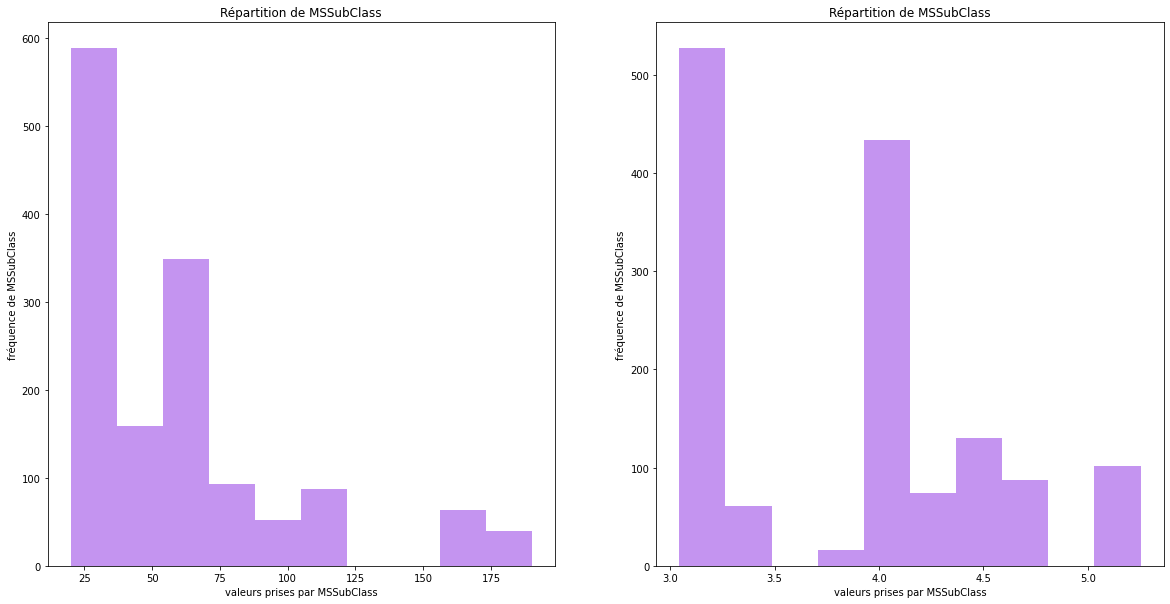

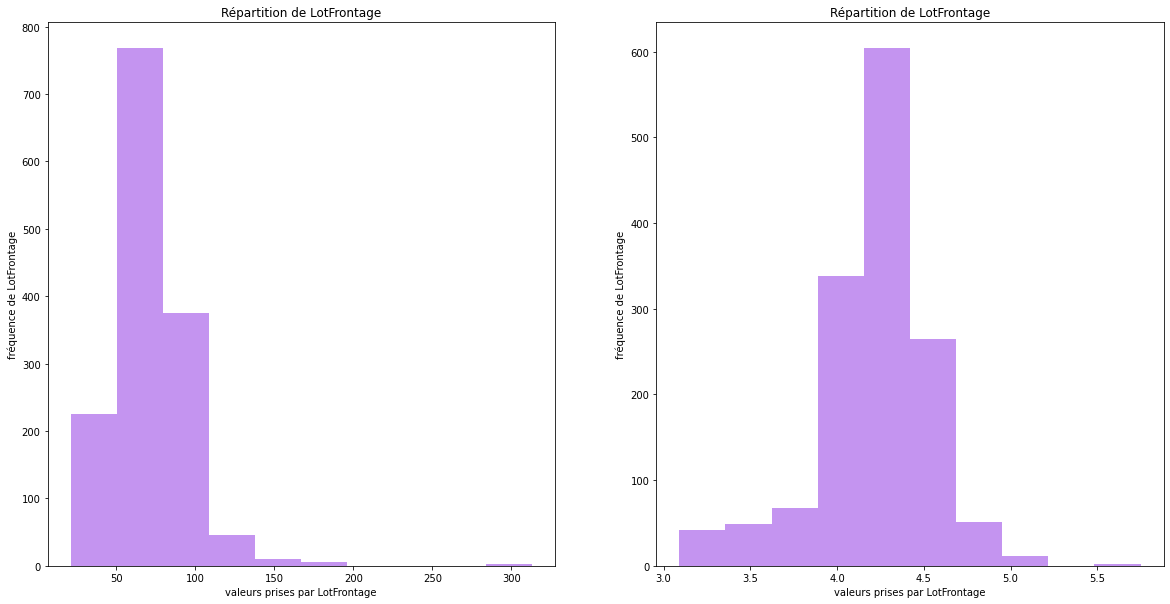

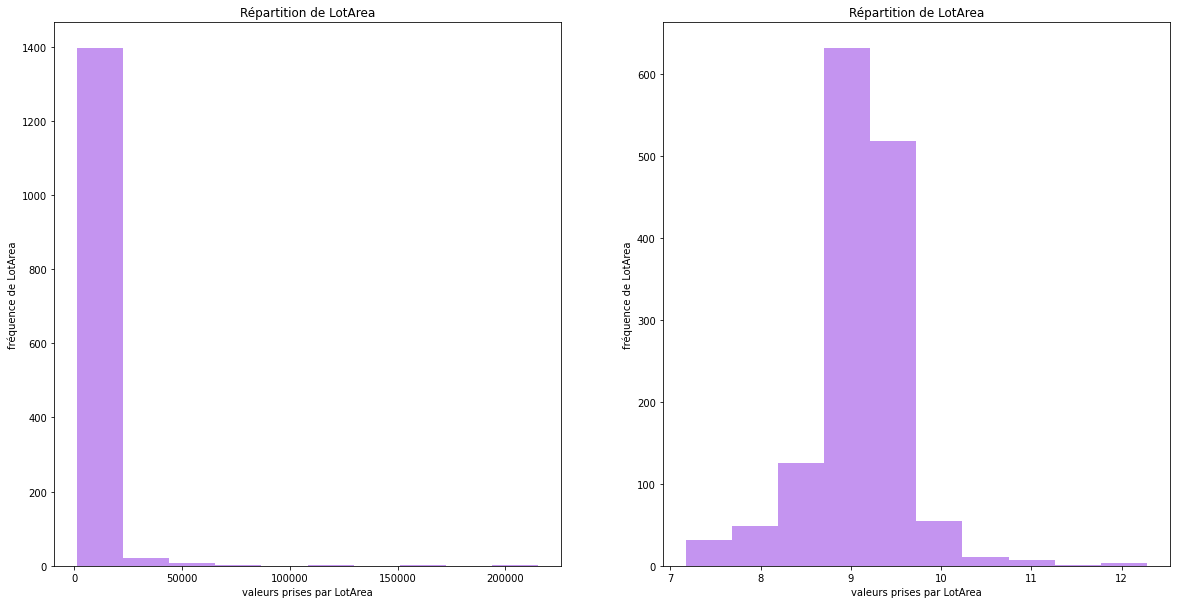

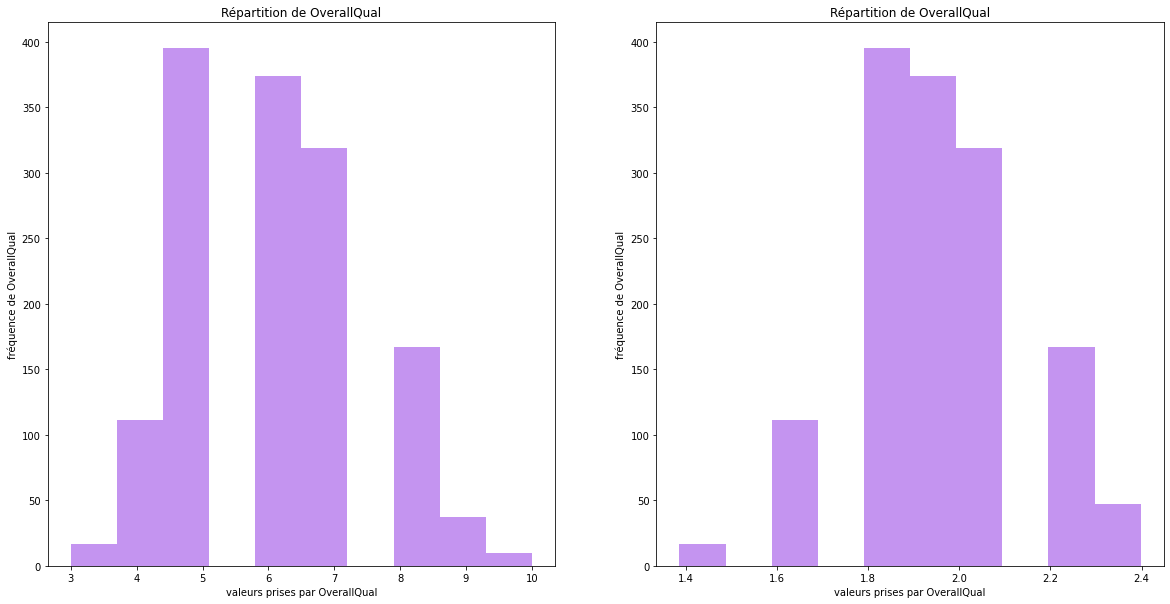

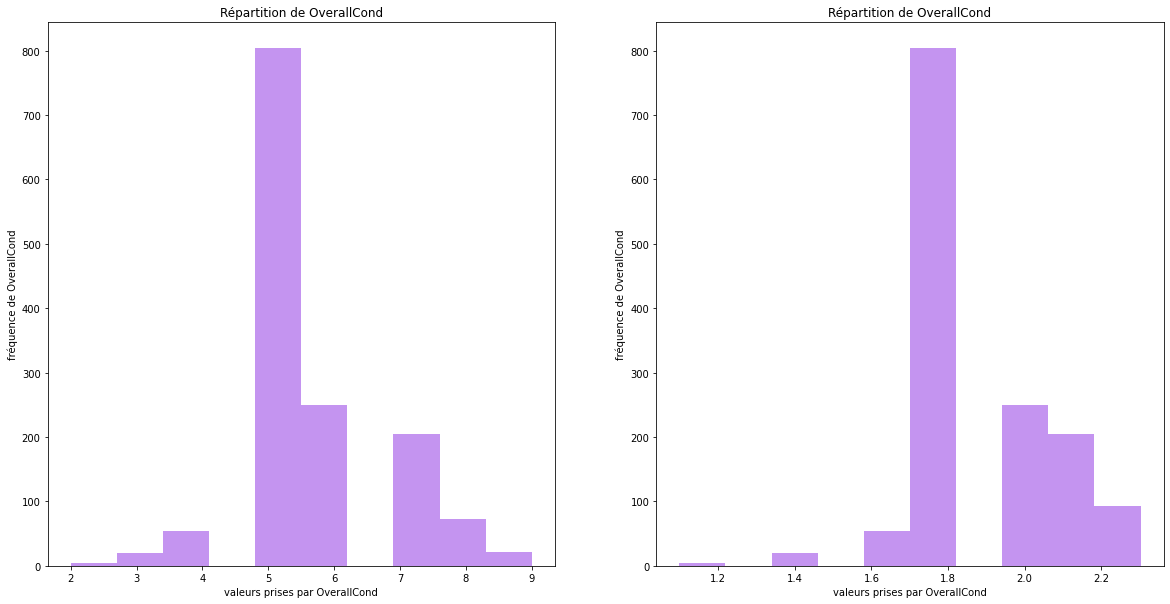

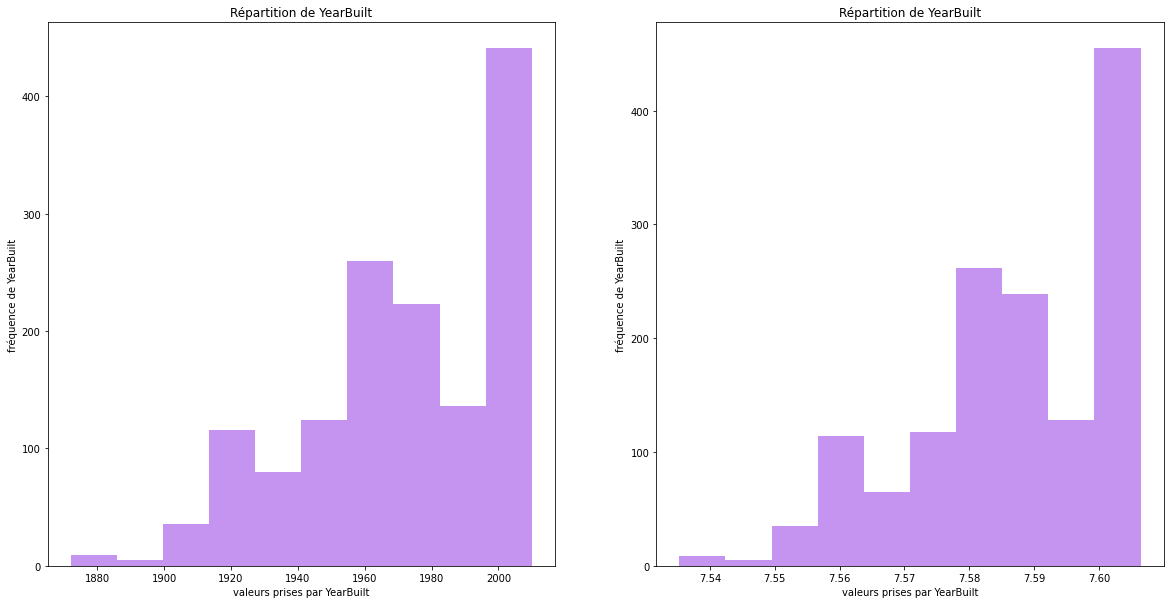

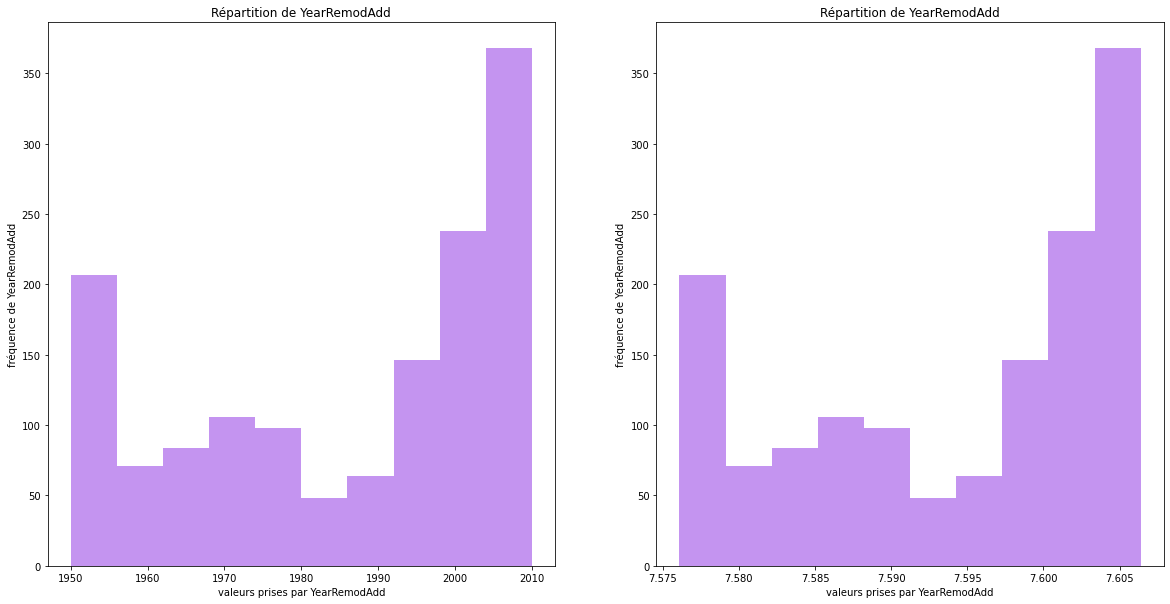

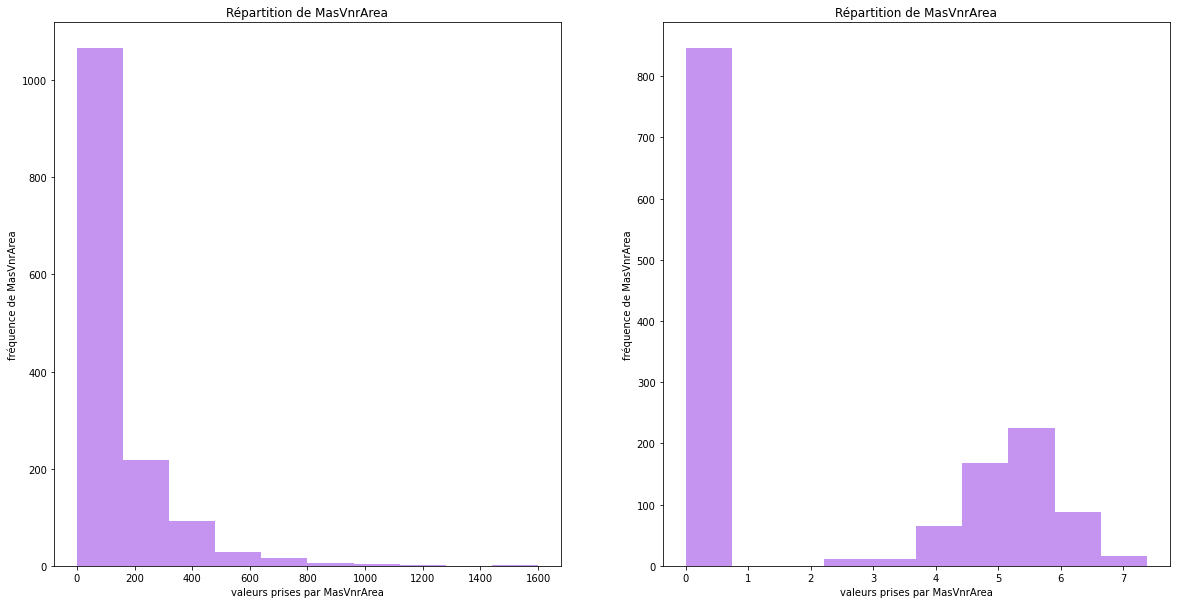

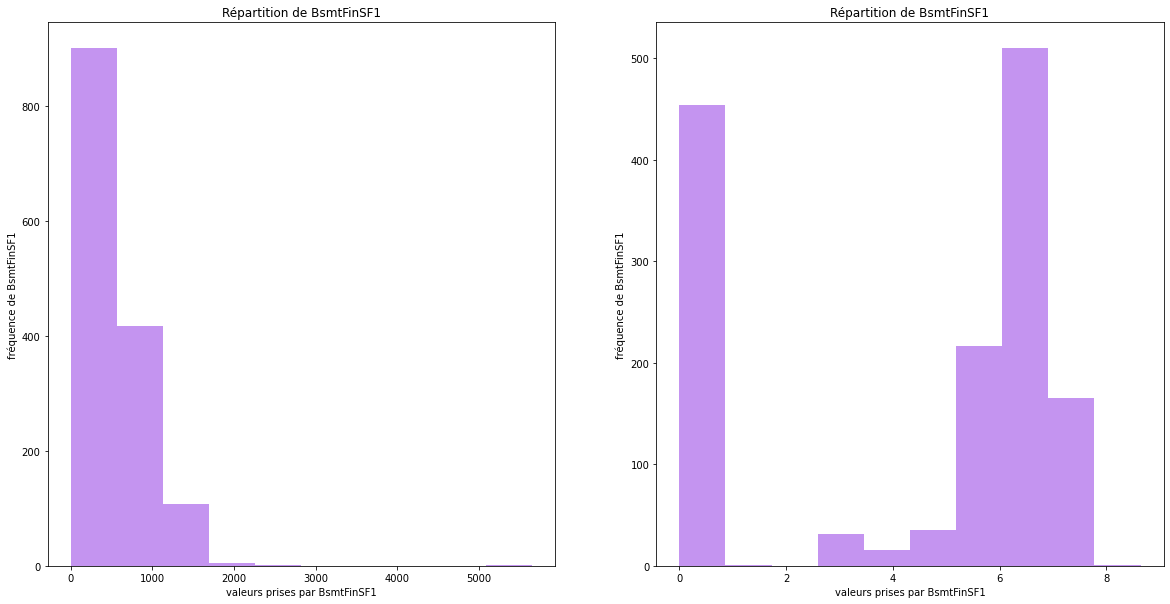

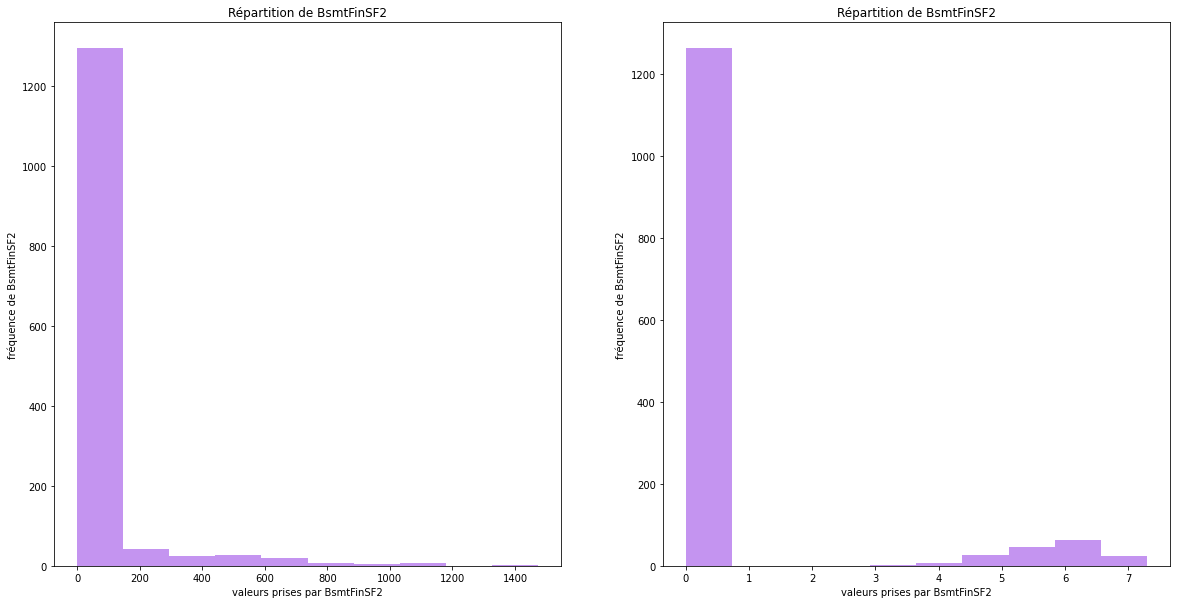

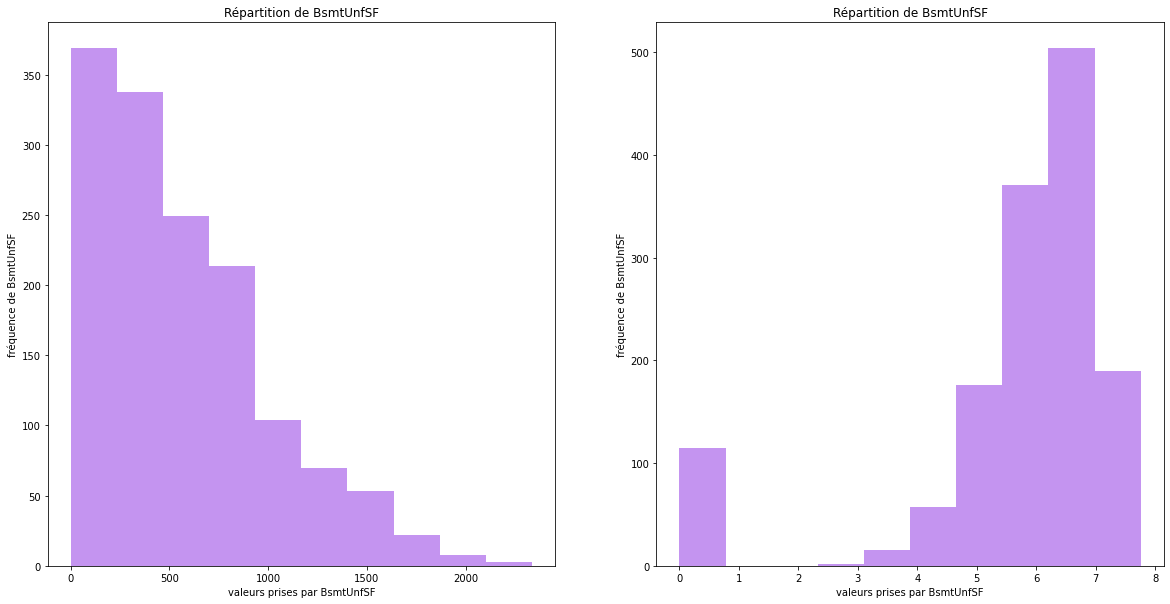

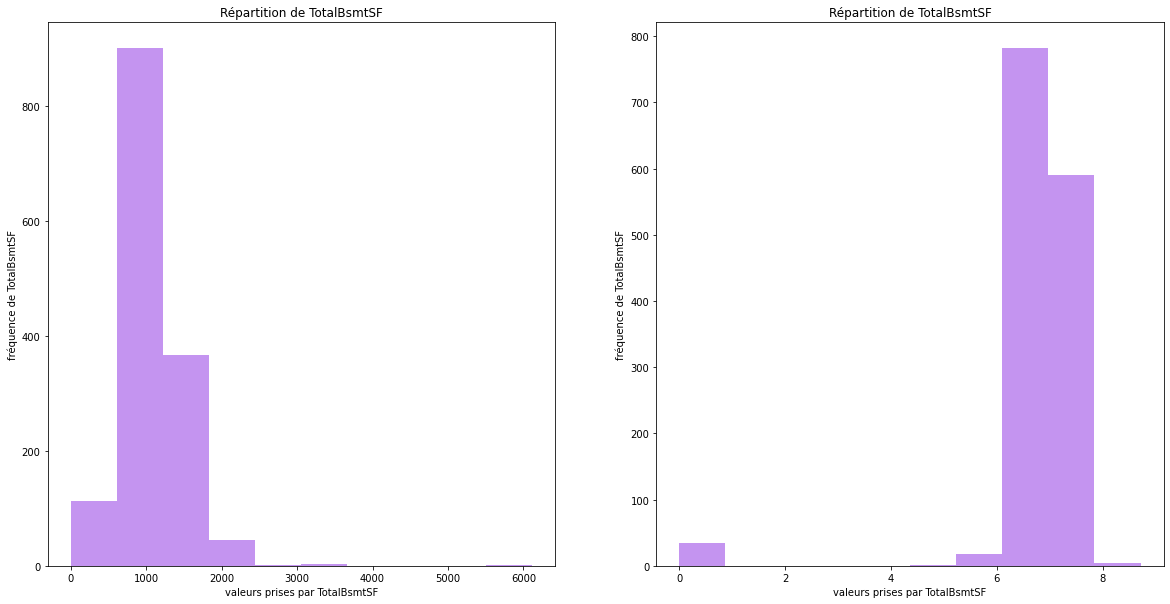

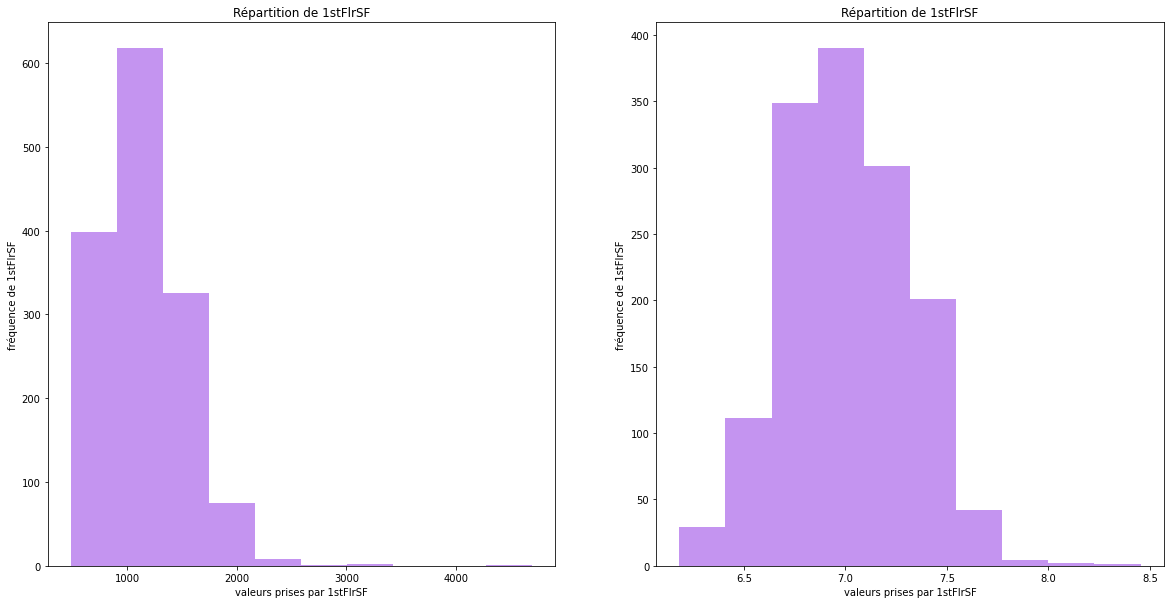

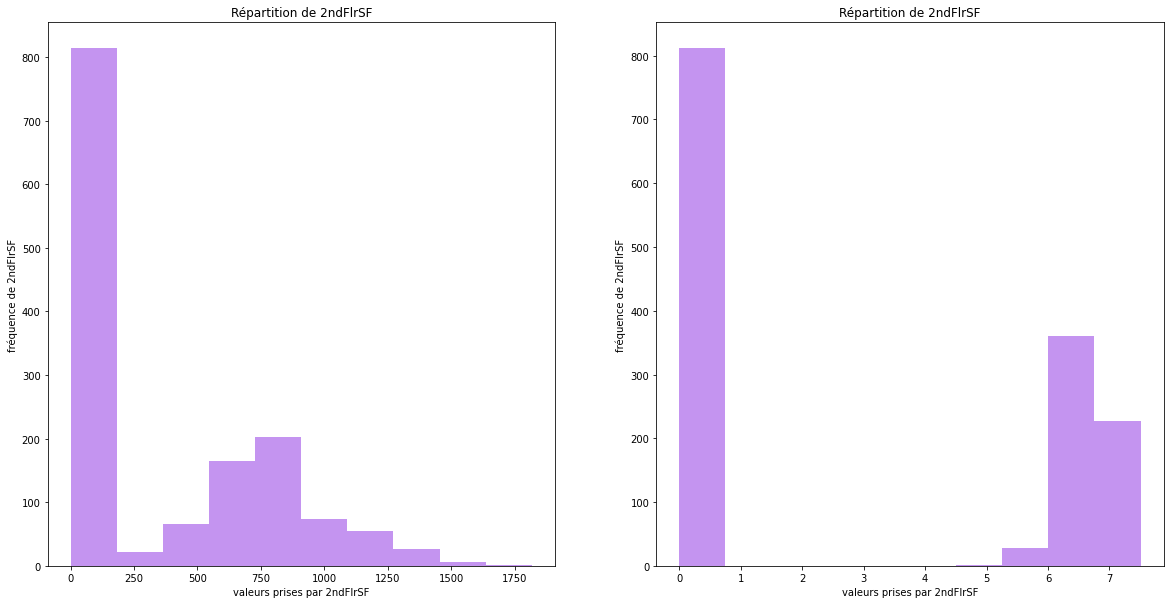

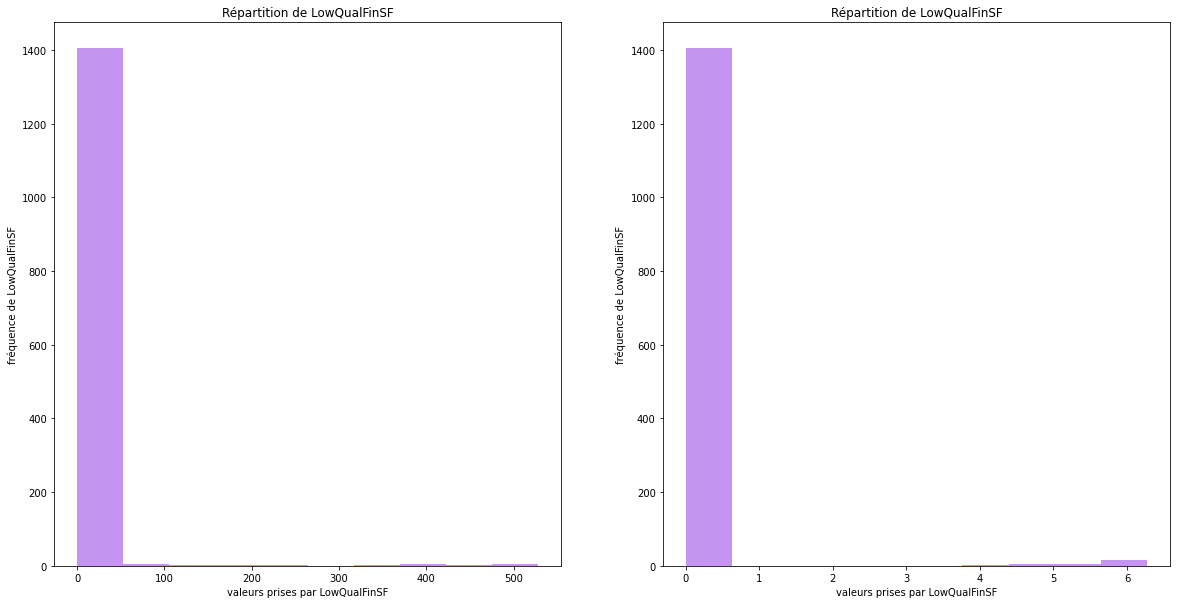

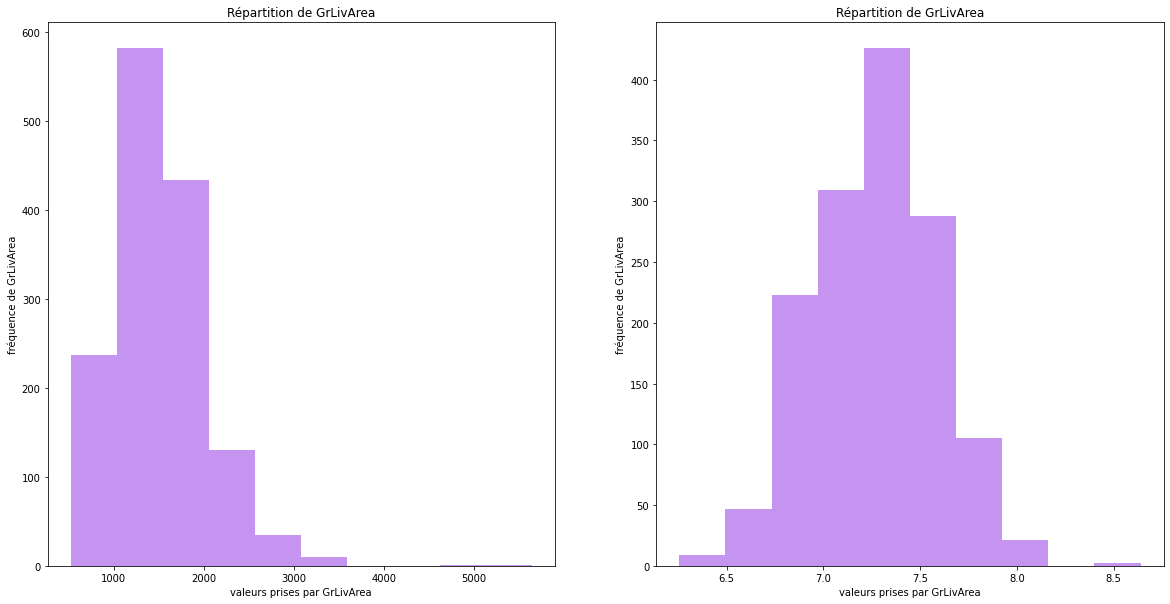

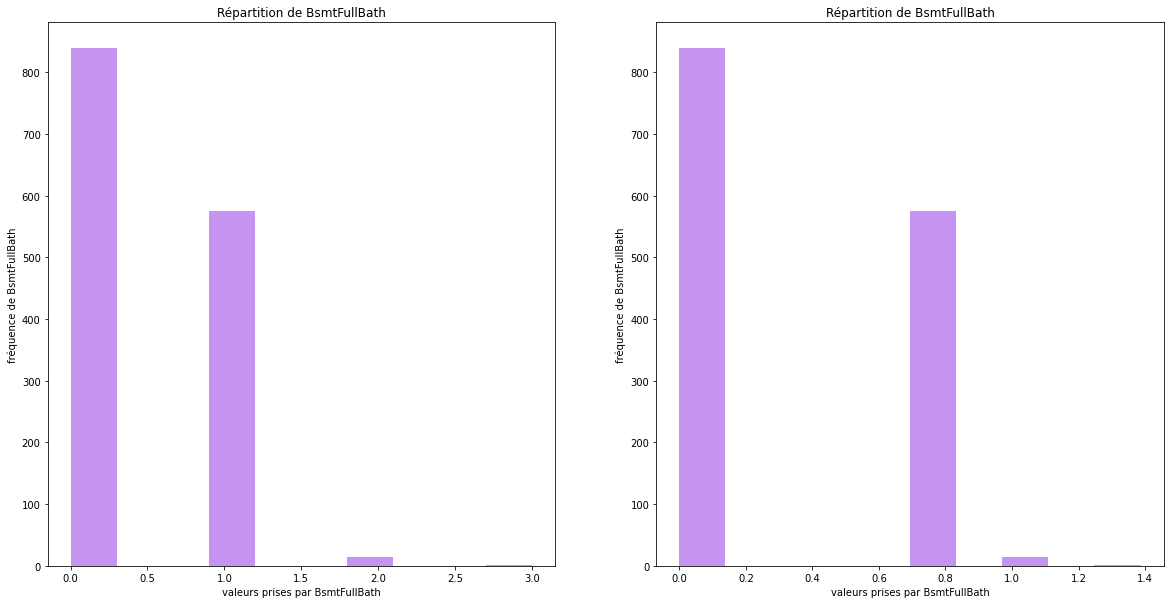

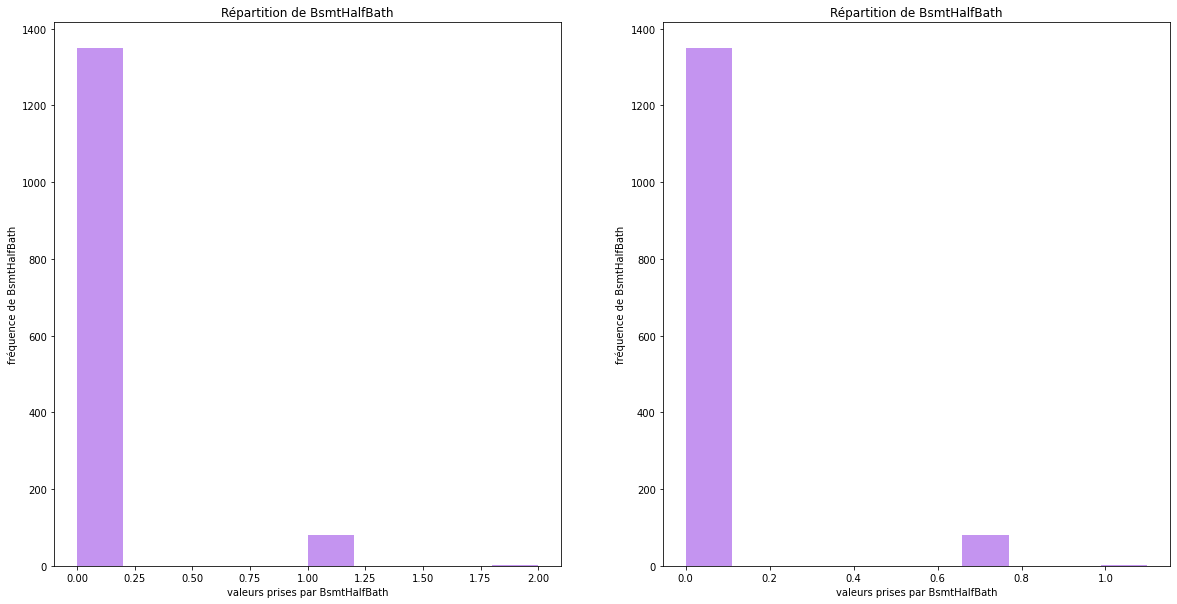

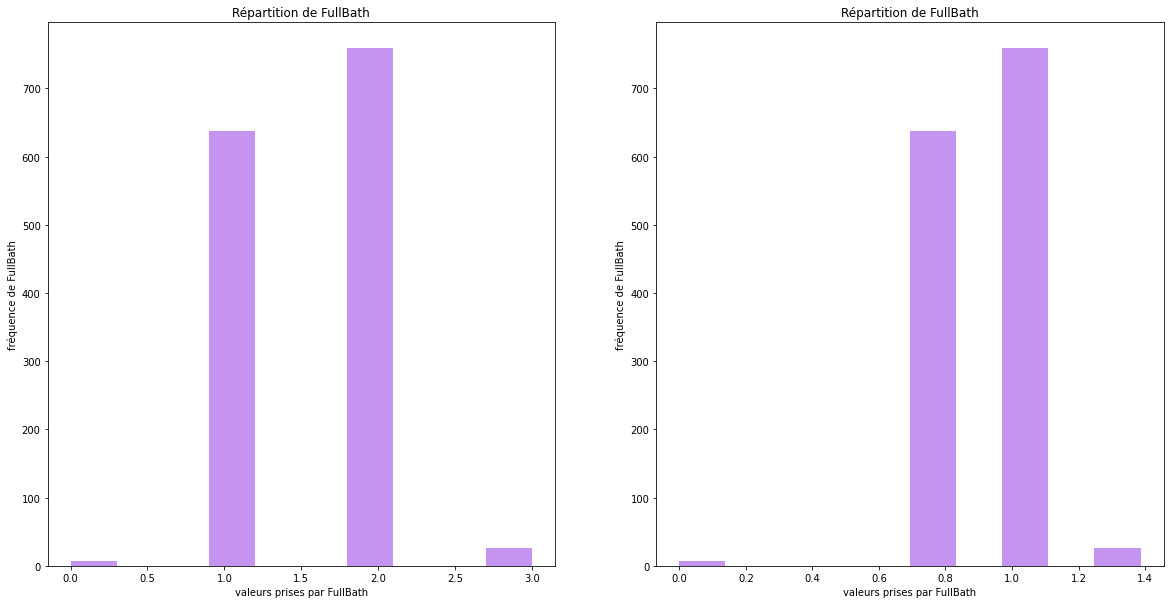

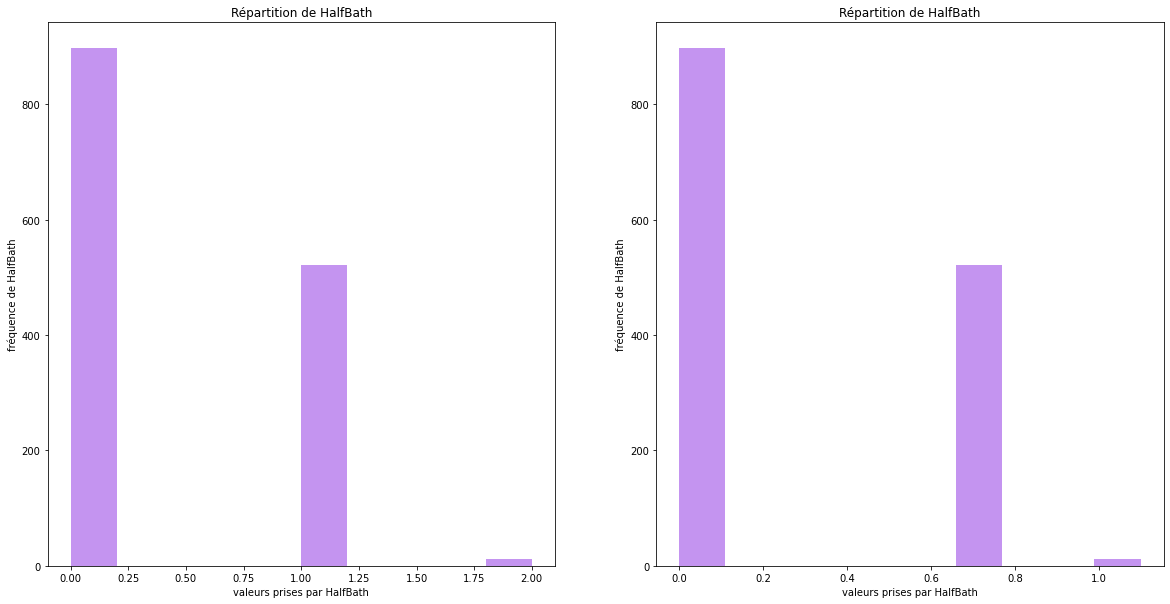

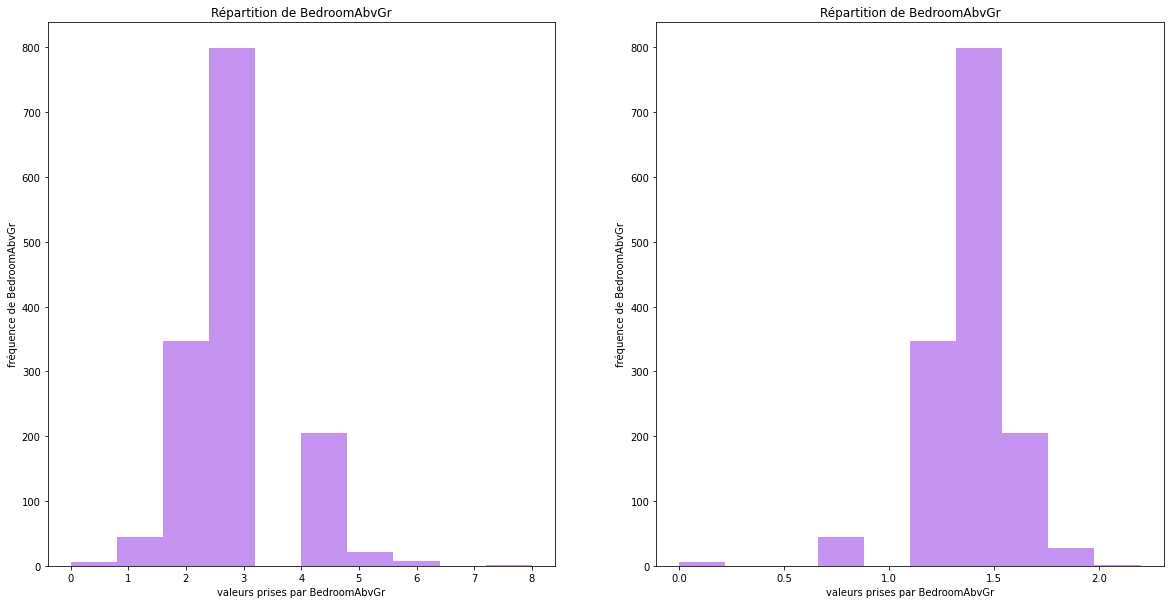

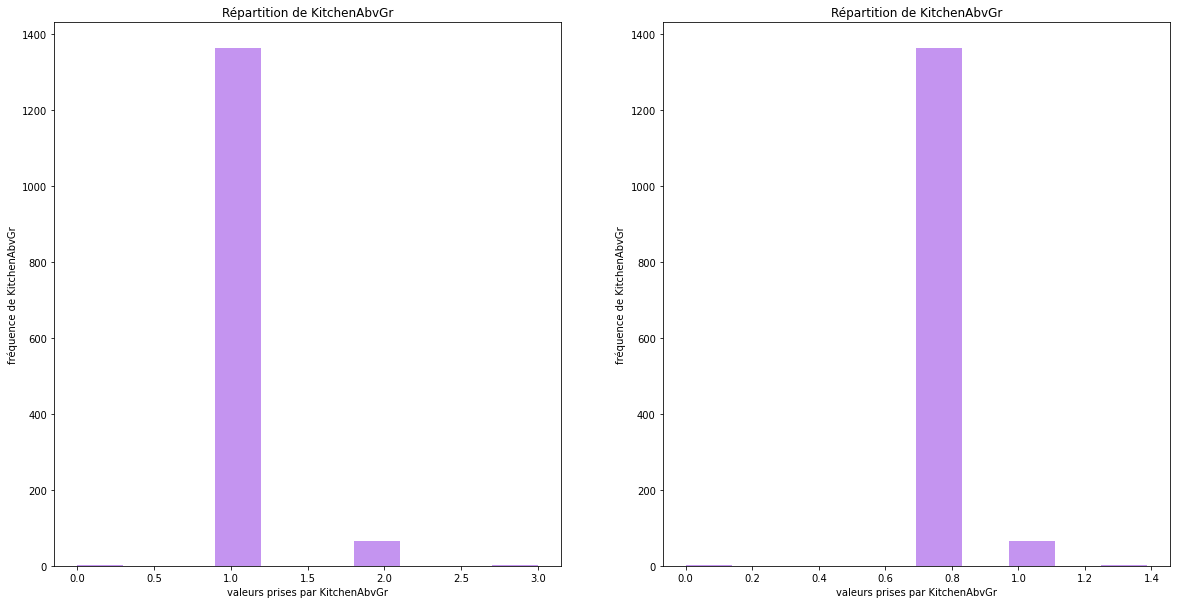

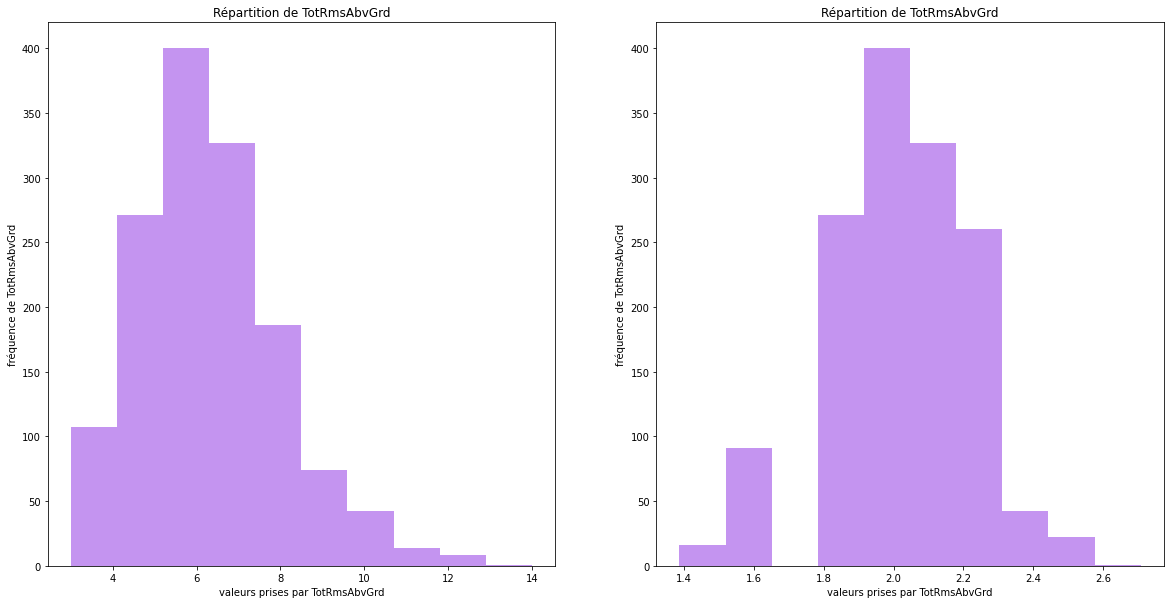

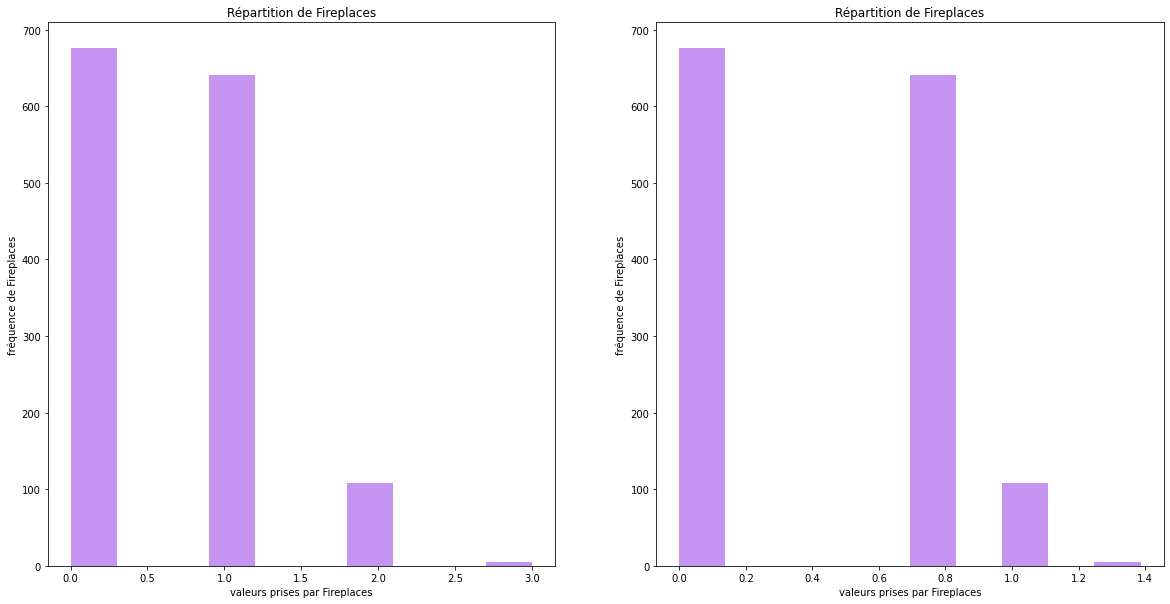

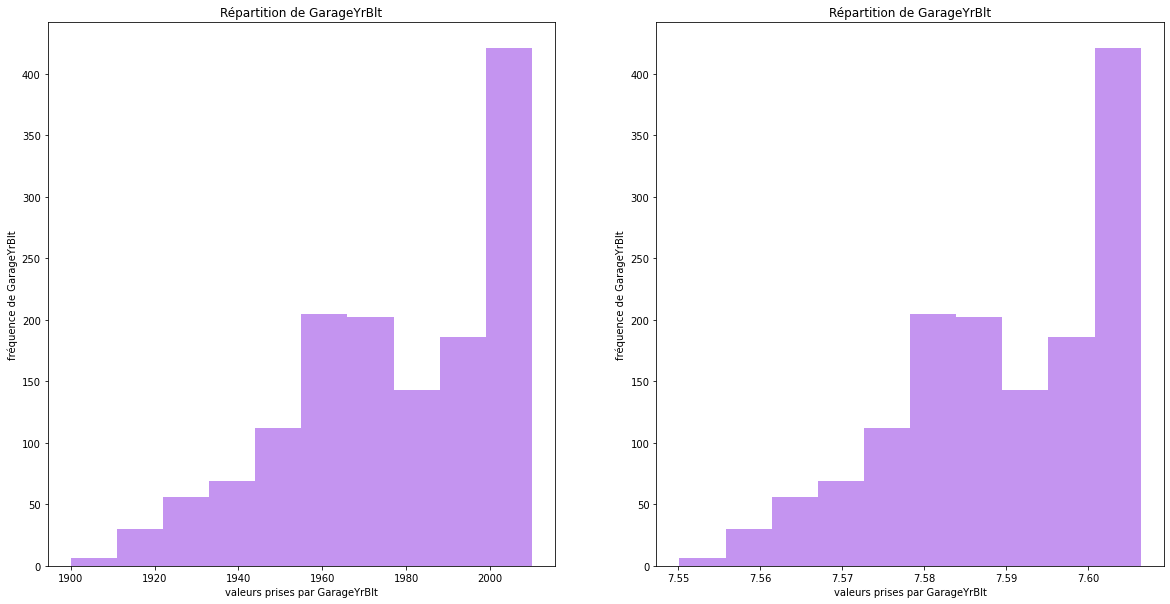

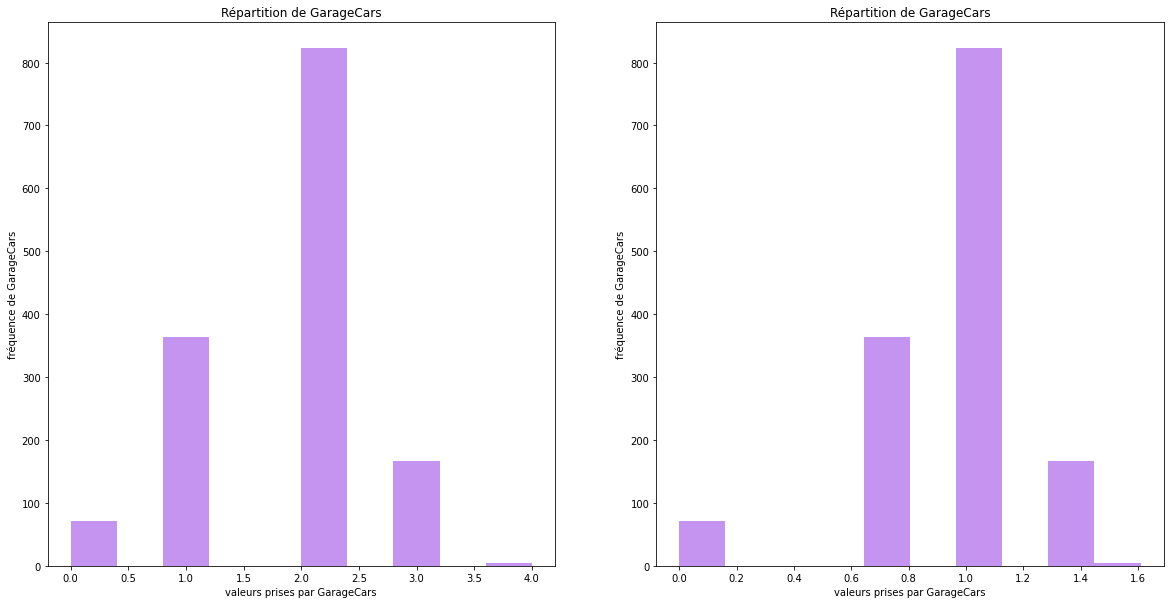

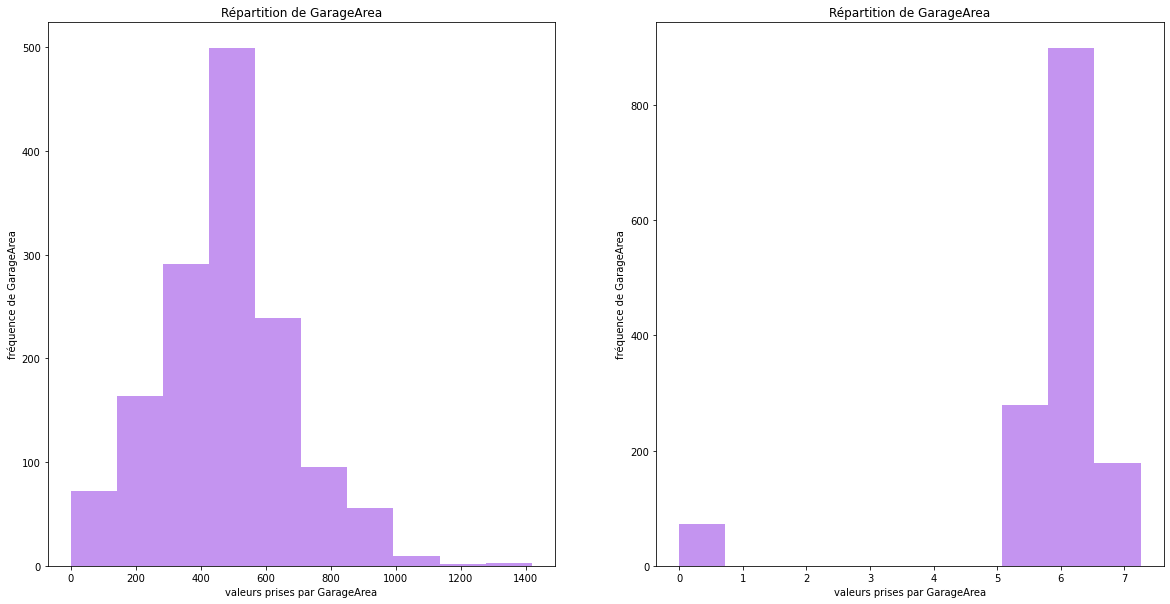

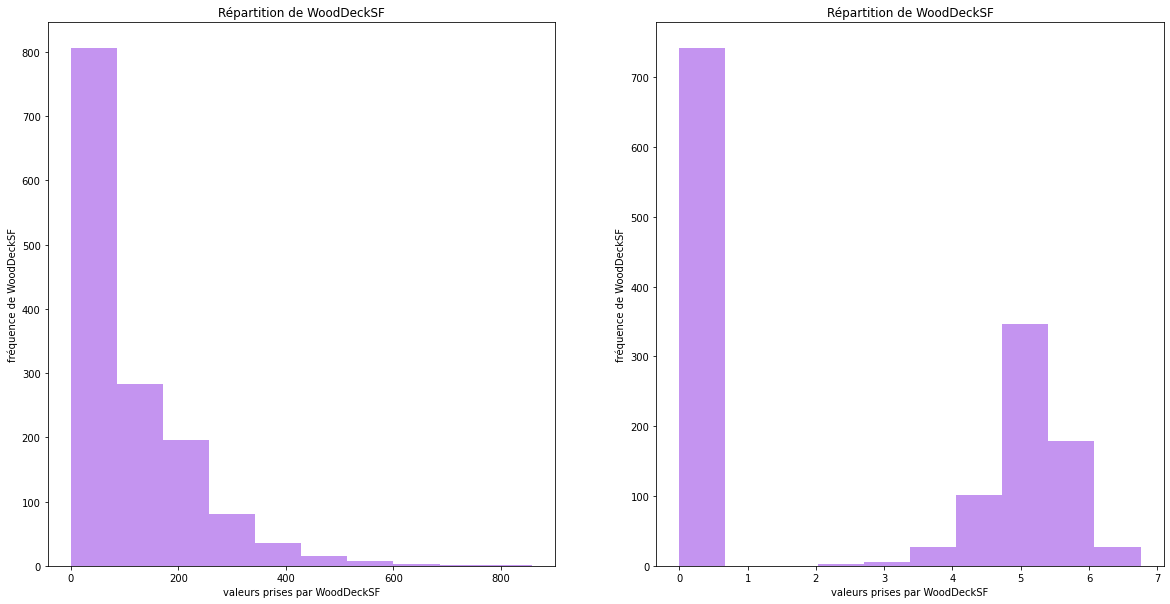

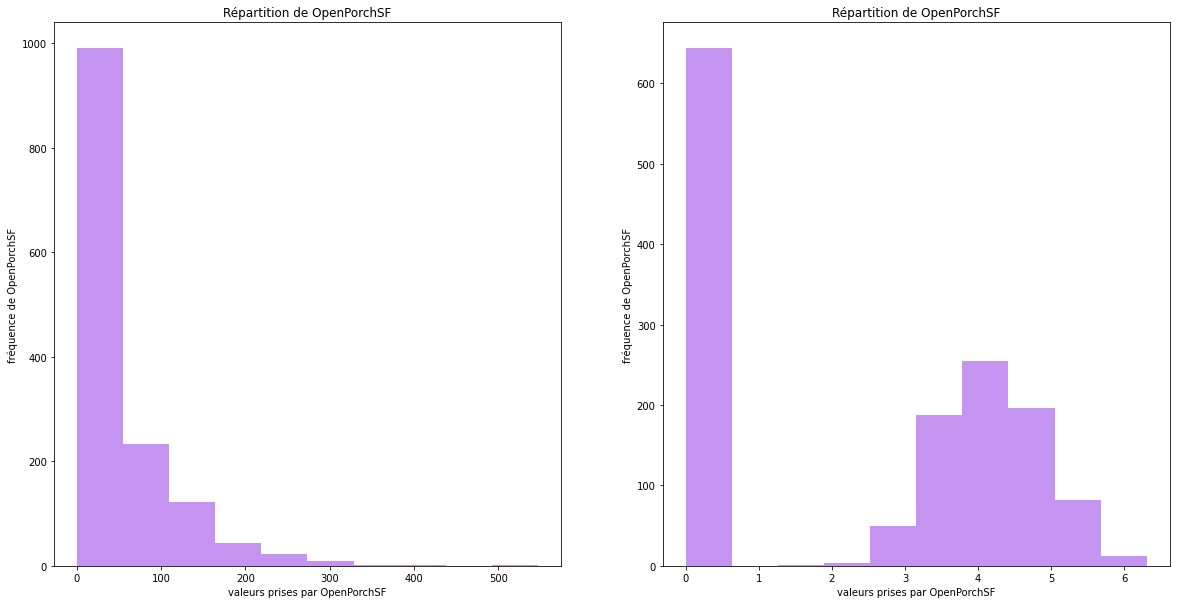

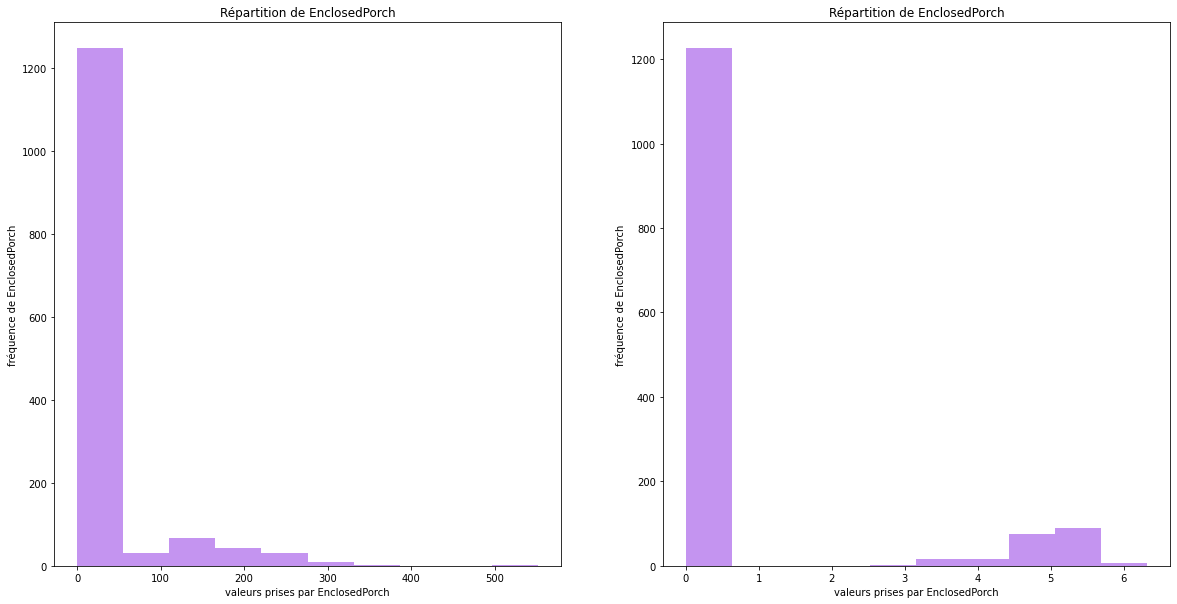

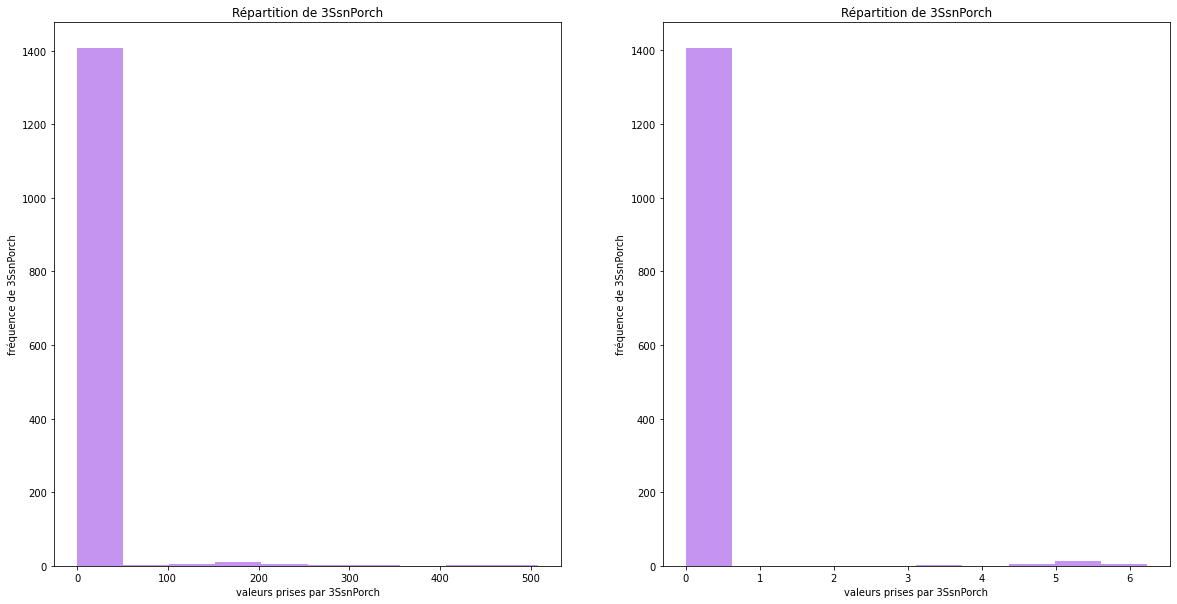

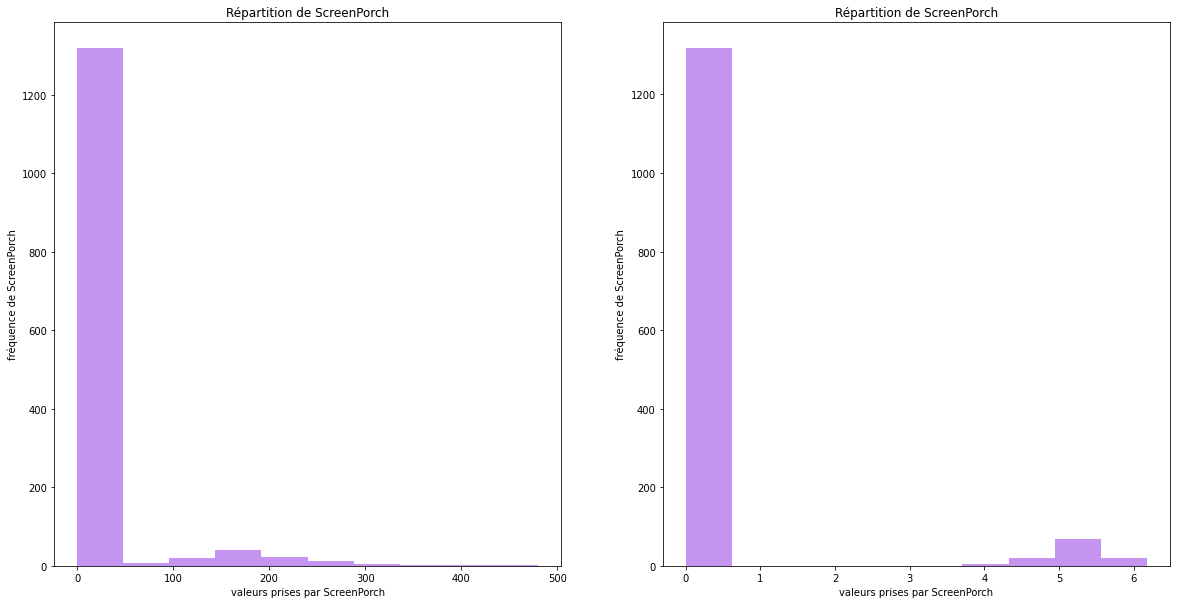

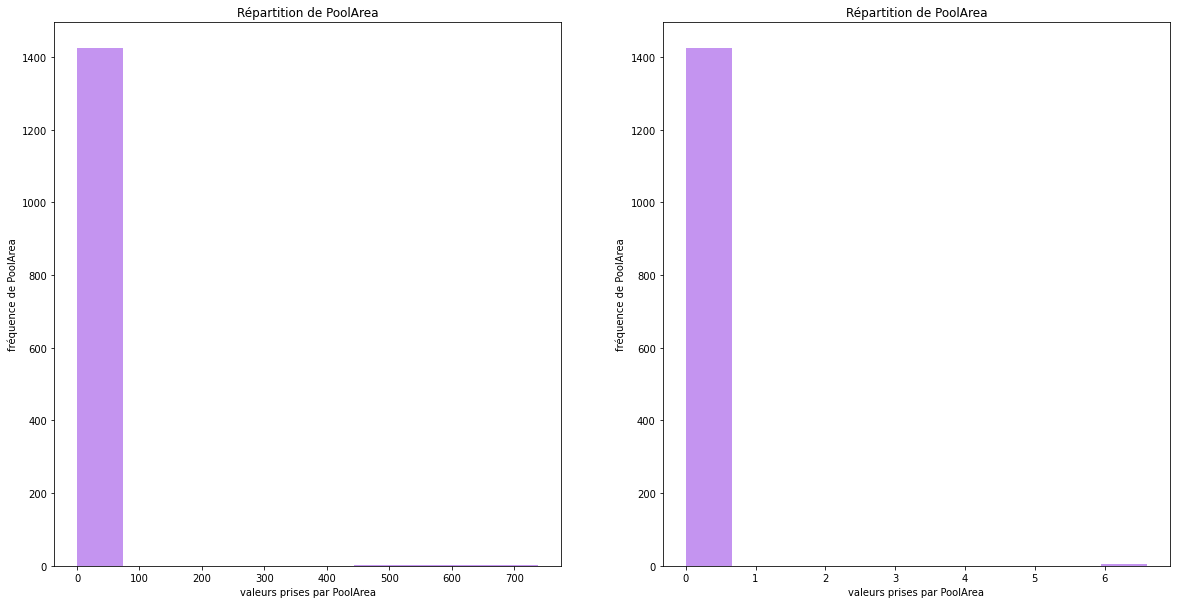

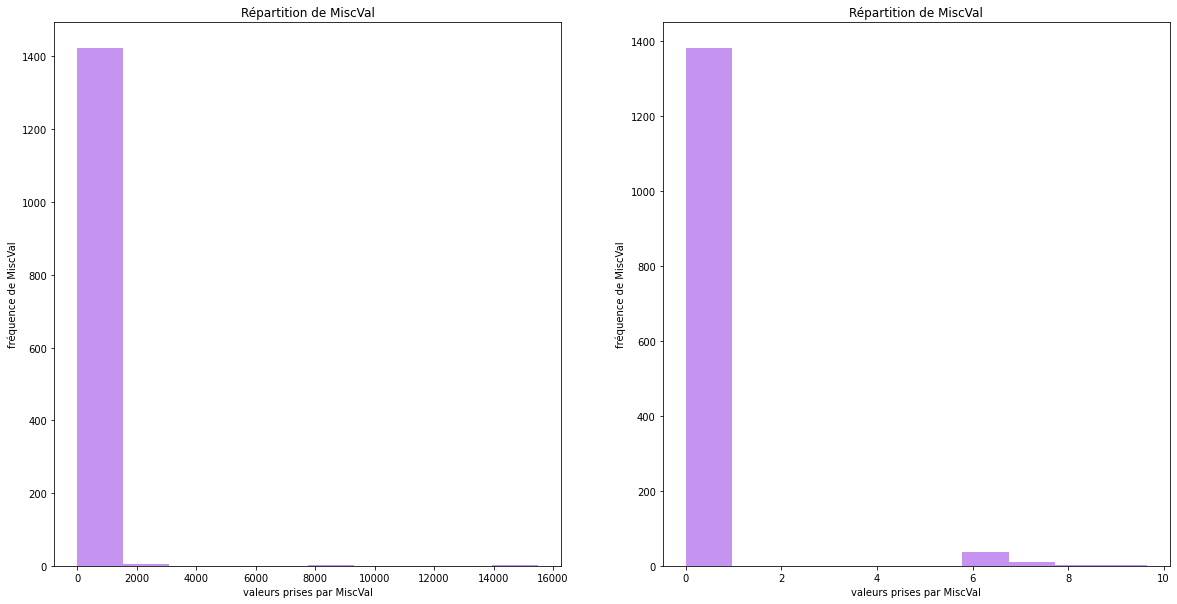

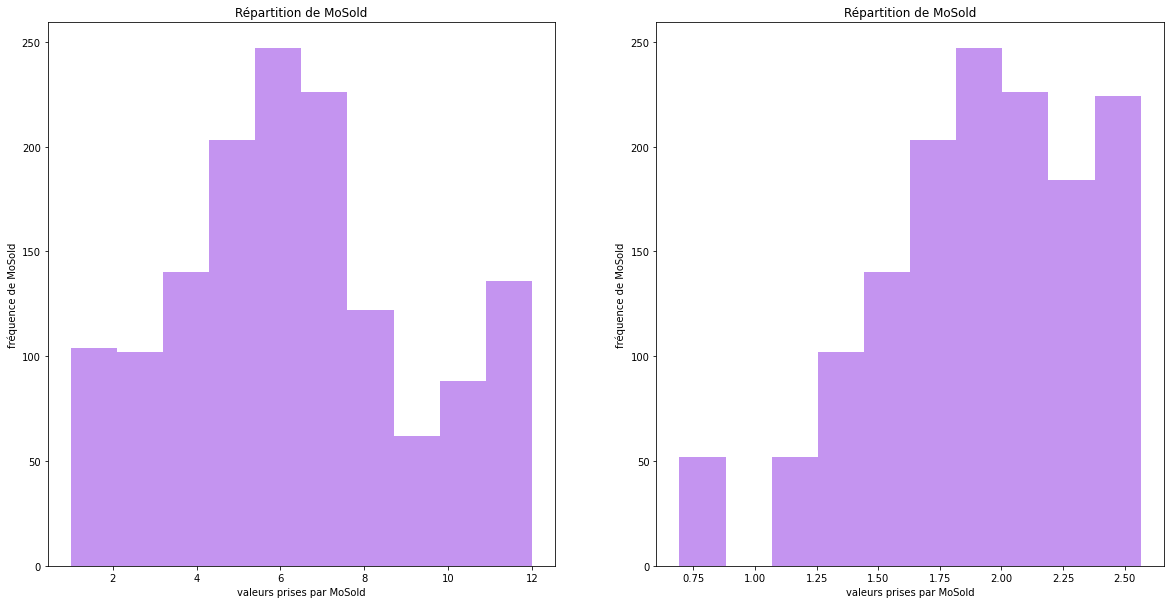

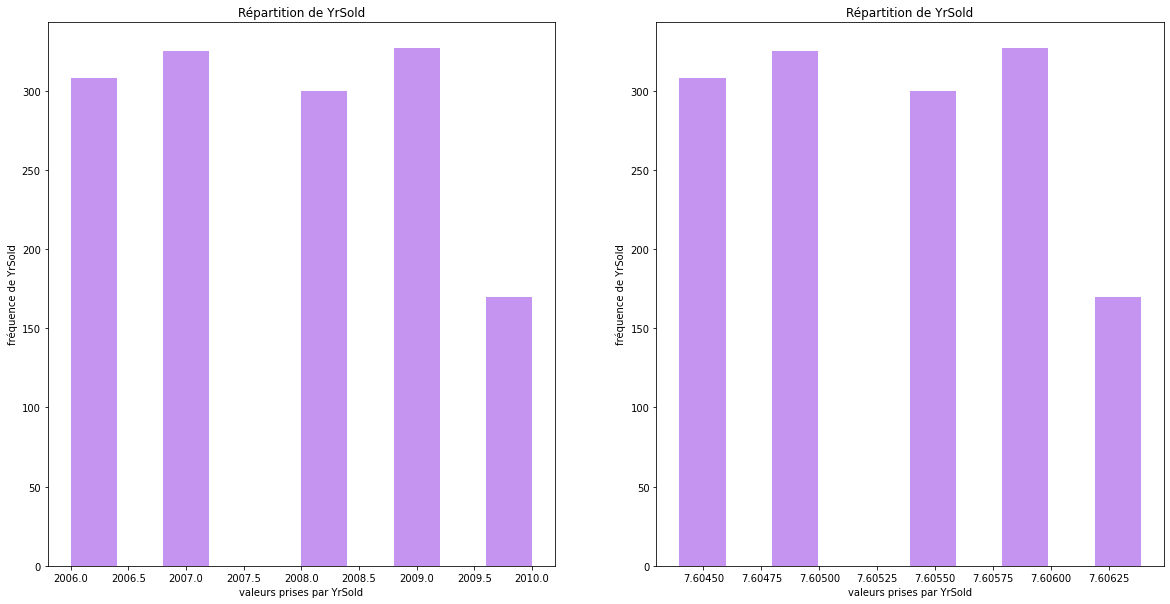

In [408]:
# log transform to reduce the value range

for col in num:
    if col != 'Id':
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

        ax[0].hist(df_train[col], color='blueviolet', alpha=0.5, histtype='barstacked')
        ax[0].set_xlabel('valeurs prises par {}'.format(col))
        ax[0].set_ylabel('fréquence de {}'.format(col))
        ax[0].set_title('Répartition de {}'.format(col))

        ax[1].hist(np.log(1+df_train[col]), color='blueviolet', alpha=0.5, histtype='barstacked')
        ax[1].set_xlabel('valeurs prises par {}'.format(col))
        ax[1].set_ylabel('fréquence de {}'.format(col))
        ax[1].set_title('Répartition de {}'.format(col))

        plt.show()
        
        # Passage au log
        df_train[col] = np.log(df_train[col] + 1) 
        df_test[col] = np.log(df_test[col] + 1)
        
y['SalePrice'] = np.log(y['SalePrice'].values + 1)


In [409]:
# Standardisation
scaler = StandardScaler()
scalery = StandardScaler()
df_train[num] = scaler.fit_transform(df_train[num].to_numpy())
df_test[num] = scaler.transform(df_test[num].to_numpy())
y['SalePrice'] = scalery.fit_transform(y['SalePrice'].values.reshape(-1,1))
df_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0   -1.126615     0.511982  0.492872    -0.801998     0.446867  -0.339446   
1   -1.126615     0.548464  0.891474     0.020402     0.446867  -0.439731   
2    0.418137     0.283162  0.831000    -0.801998    -0.495077   0.852148   
3    0.418137     0.437648  0.196393     0.020402     0.446867   0.884940   
4    1.410329    -1.302437 -1.144727     1.361174    -0.495077   0.687939   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -1.170659   -0.815462    0.641162    2.324119  -0.024696     0.025326   
1     -1.318719    0.975869    0.868622   -0.358293   0.195166     0.389658   
2      0.637030   -0.815462    0.816915   -0.358293  -0.389532     0.070496   
3      0.637030    0.347050    0.725461   -0.358293   0.073536     0.068579   
4      0.346176   -0.815462    0.448403   -0.358293   0.690784     0.356270   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.676967 -0.870158      -0.13235  -1.465459     -0.832384     -0.244006   
1  0.602448 -0.870158      -0.13235  -0.233209     -0.832384     -0.244006   
2 -0.563107  1.122989      -0.13235   0.403132     -0.832384     -0.244006   
3 -0.570107  1.112858      -0.13235   0.354777     -0.832384     -0.244006   
4  0.480515 -0.870158      -0.13235  -0.350647     -0.832384     -0.244006   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0 -1.024501 -0.766377     -1.023499     -0.208063     -0.968979   -1.014162   
1 -1.024501  1.263030      0.245760     -0.208063     -0.227668   -1.014162   
2  0.826506  1.263030      0.245760     -0.208063     -0.227668    0.749757   
3  0.826506  1.263030      0.245760     -0.208063      0.414484    0.749757   
4  0.826506 -0.766377     -1.023499     -0.208063     -0.968979   -1.014162   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0    -0.626008   -0.901559    0.545215    0.956715    -1.070959   
1    -0.746159   -0.901559   -0.064133    1.352880     0.610764   
2     0.801643    0.394158    0.247515    1.115758     0.584883   
3     0.840932    0.394158    0.229442    1.319156     0.610764   
4     0.604904    0.394158    0.282353   -0.951165     0.987040   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
0      -0.404512  -0.129885     3.157483 -0.064894 -0.189017  0.073065   
1      -0.404512  -0.129885    -0.290503 -0.064894  7.568873  0.073065   
2      -0.404512  -0.129885    -0.290503 -0.064894 -0.189017 -1.257940   
3      -0.404512  -0.129885    -0.290503 -0.064894 -0.189017  0.073065   
4      -0.404512  -0.129885     3.287574 -0.064894 -0.189017 -2.906540   

     YrSold  MSZoning1  MSZoning3  MSZoning4  LotShape0  LotShape1  LotShape3  \
0  1.653215        0.0        0.0        0.0        0.0        0.0        1.0   
1  1.653215        0.0        1.0        0.0        1.0        0.0        0.0   
2  1.653215        0.0        1.0        0.0        1.0        0.0        0.0   
3  1.653215        0.0        1.0        0.0        1.0        0.0        0.0   
4  1.653215        0.0        1.0        0.0        1.0        0.0        0.0   

   LandContour0  LandContour1  LandContour3  LotConfig0  LotConfig1  \
0           0.0           0.0           1.0         0.0         0.0   
1           0.0           0.0           1.0         1.0         0.0   
2           0.0           0.0           1.0         0.0         0.0   
3           0.0           0.0           1.0         0.0         0.0   
4           0.0           1.0           0.0         0.0         0.0   

   LotConfig2  LotConfig4  LandSlope0  LandSlope1  Neighborhood3  \
0         0.0         1.0         1.0         0.0            0.0   
1         0.0         0.0         1.0         0.0            0.0   
2         0.0         1.0         1.0         0.0            0.0   
3         0.0         1.0         1.0         0.0            0.0   
4         0.0      

In [410]:
# Adding of 'SalePrice'
num.append('SalePrice')
df_train = pd.concat([df_train, y], axis=1)
# Correlation 
cor = df_train[num].corr()
cor.style.background_gradient(cmap='coolwarm').set_precision(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


-0.03505298706409065


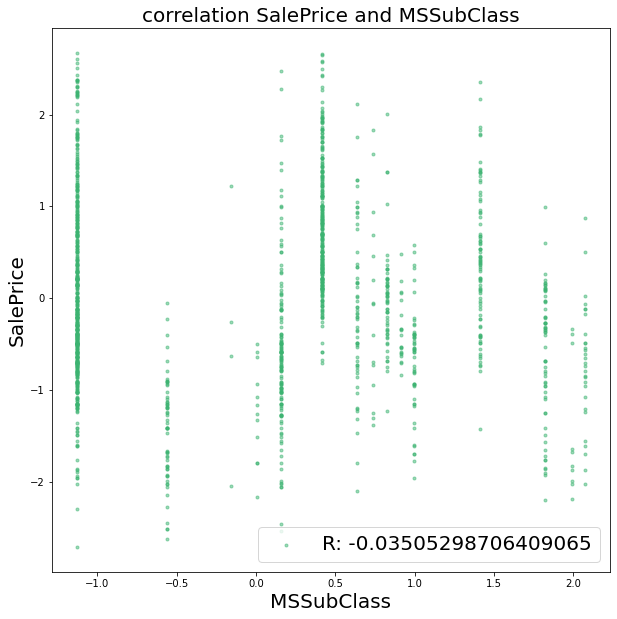

0.37101072461243845


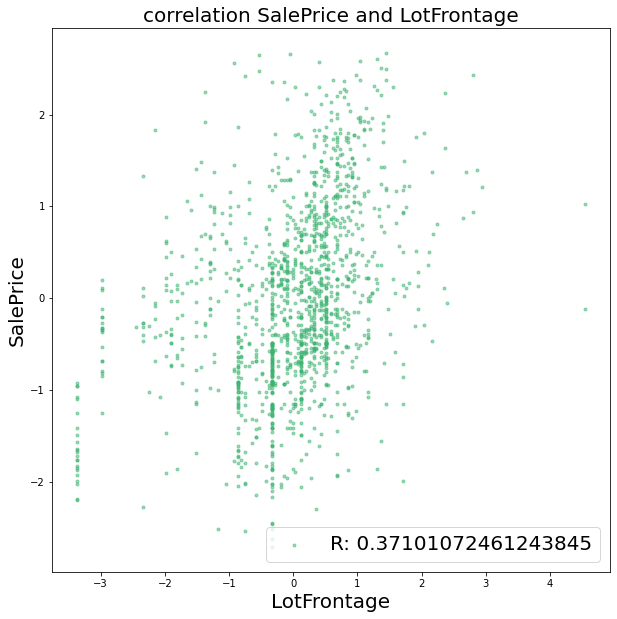

0.38513400788884666


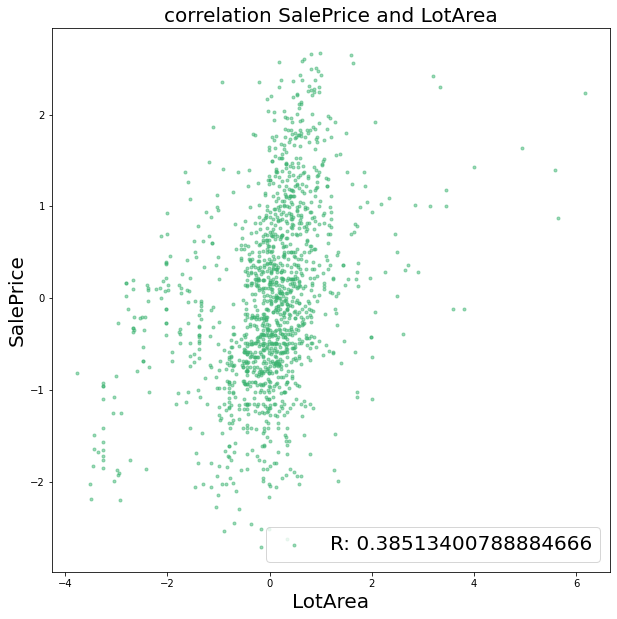

0.7872229456203471


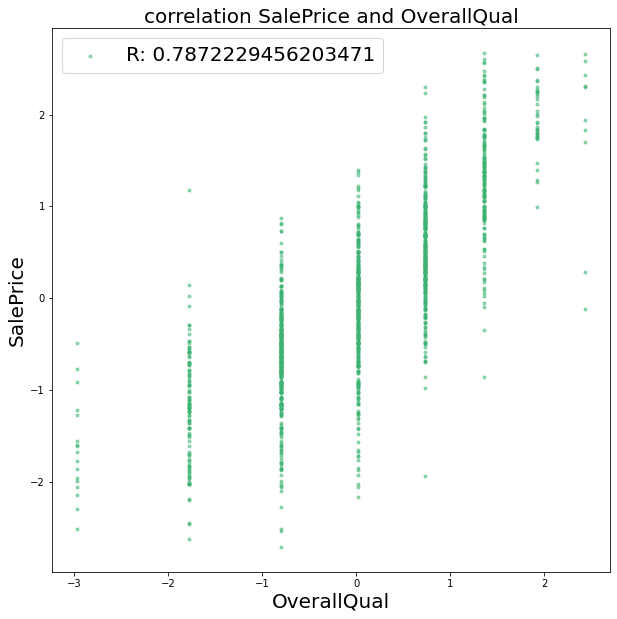

-0.05672990510120387


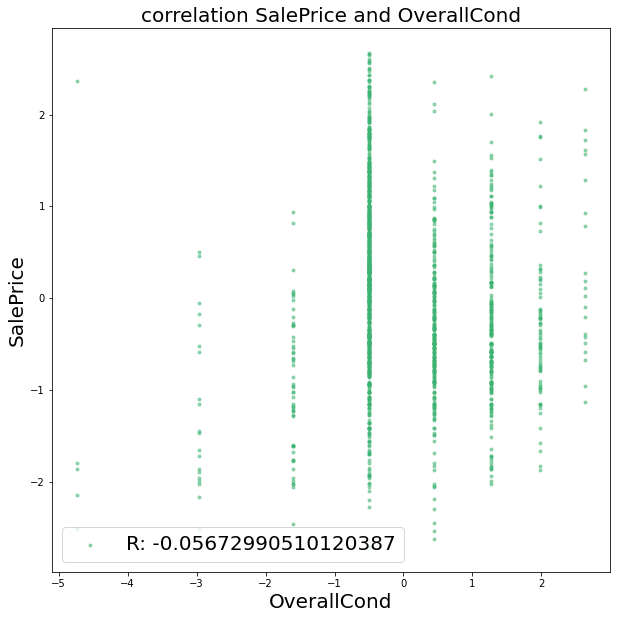

0.5856067434385315


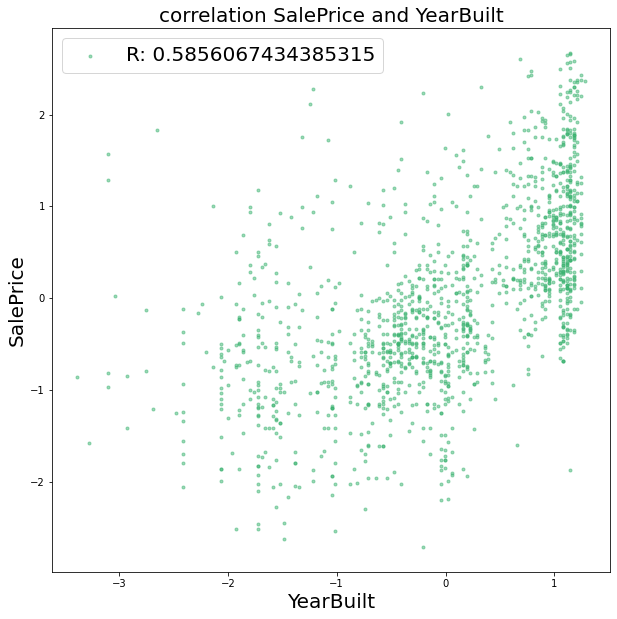

0.5558742893052401


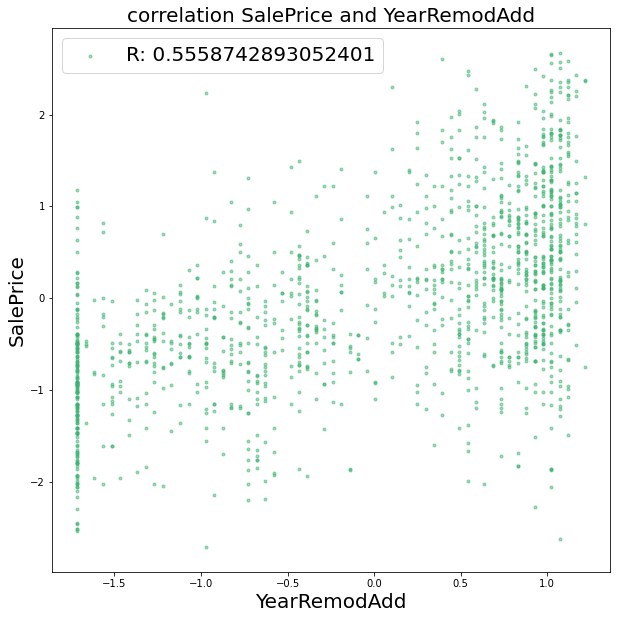

0.4038352167261193


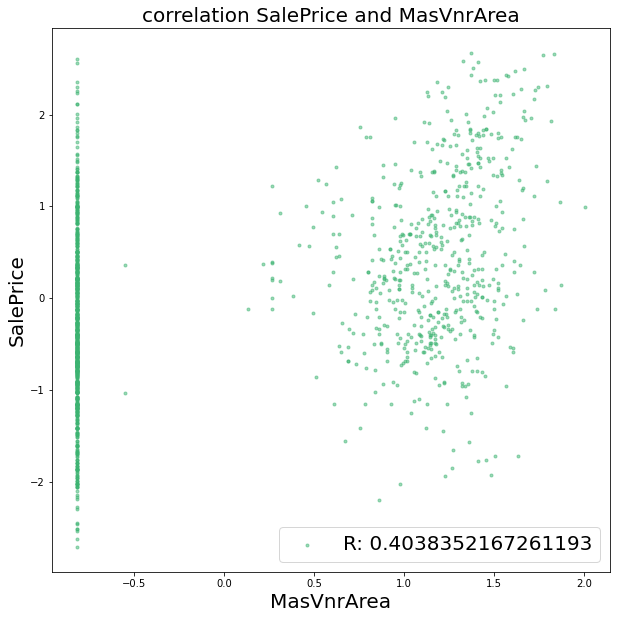

0.18746001210204966


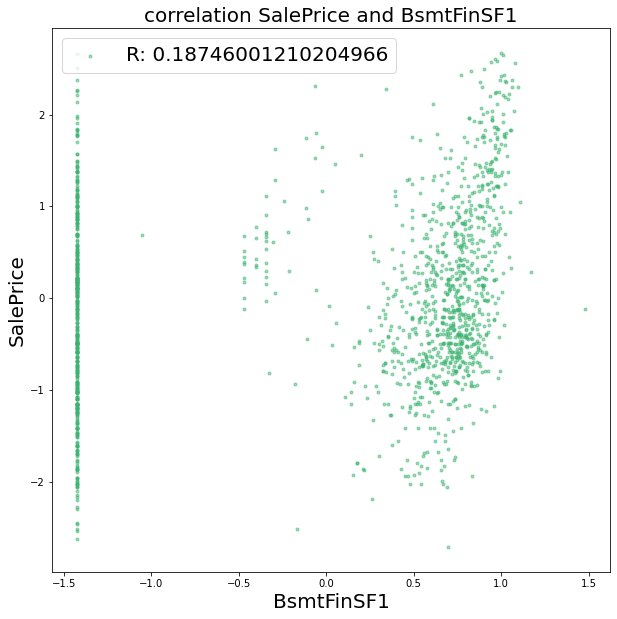

-0.04207050178620187


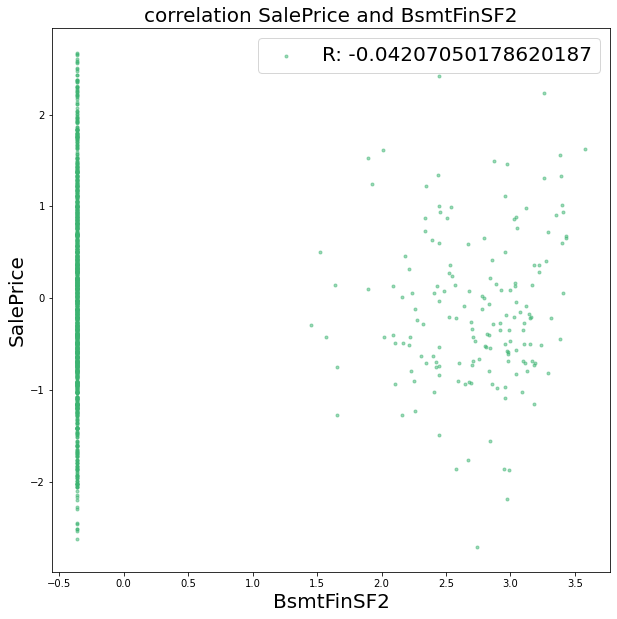

0.2078620342665159


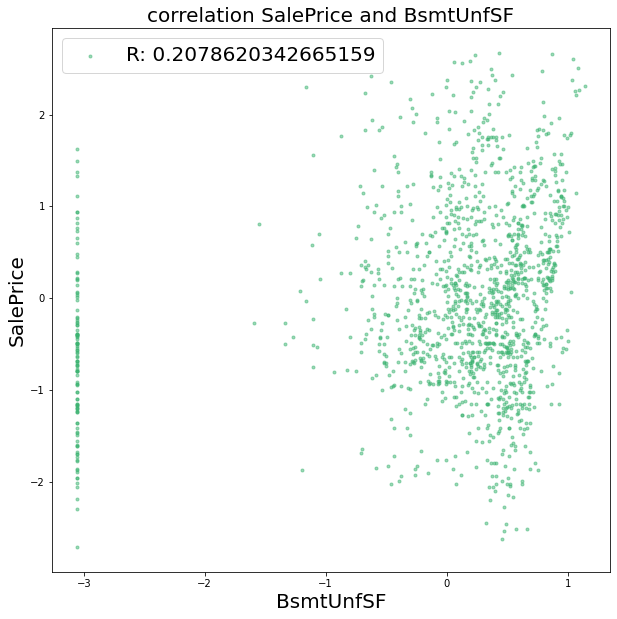

0.3598405877467164


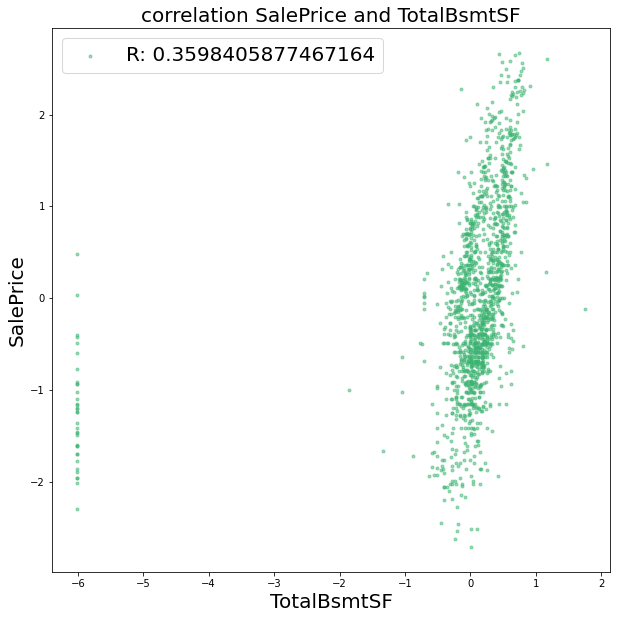

0.5774523527712762


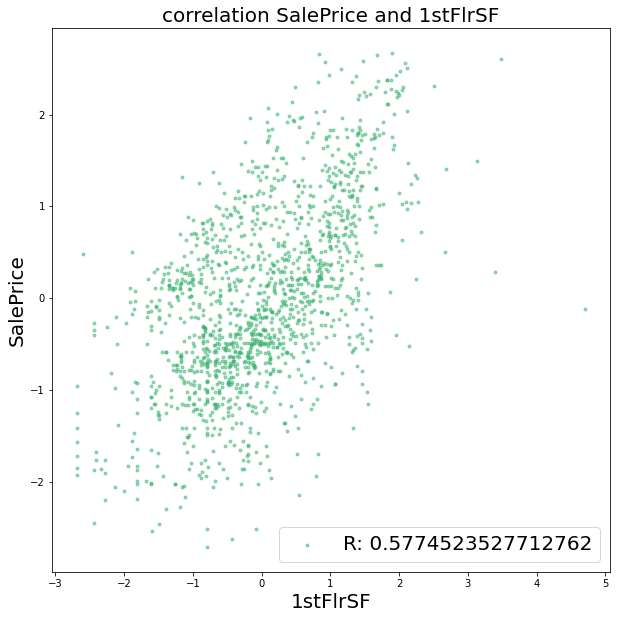

0.16628289683058994


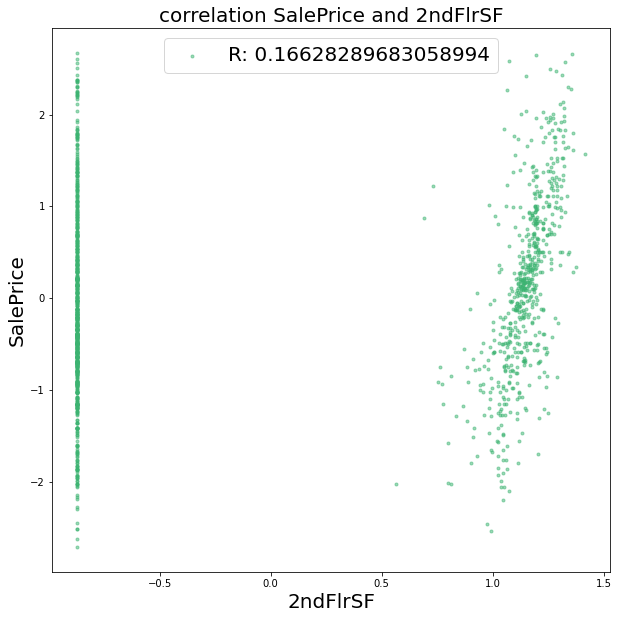

-0.07957374765700613


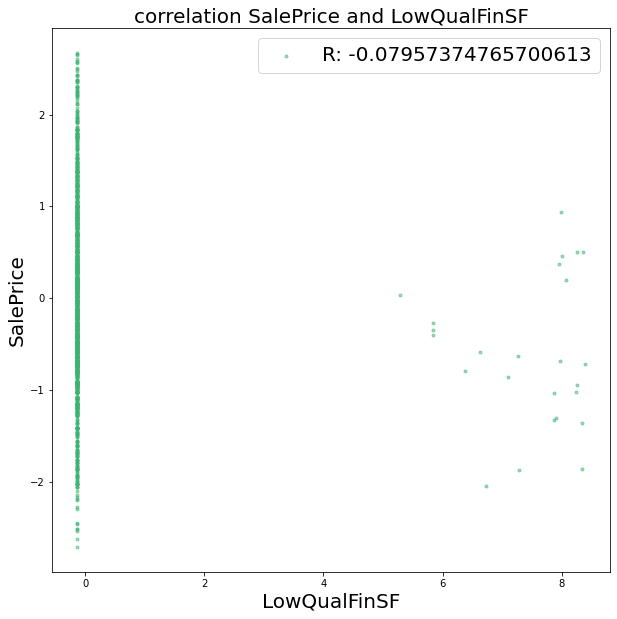

0.7077600415206945


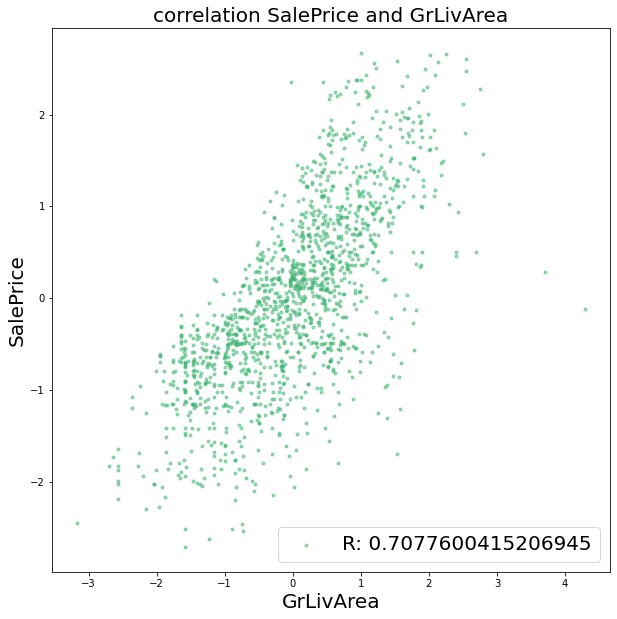

0.23664040282642504


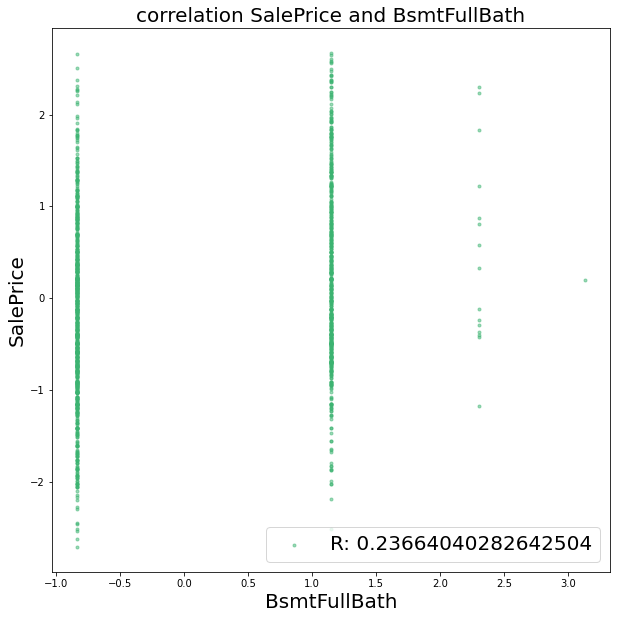

-0.018047949983830233


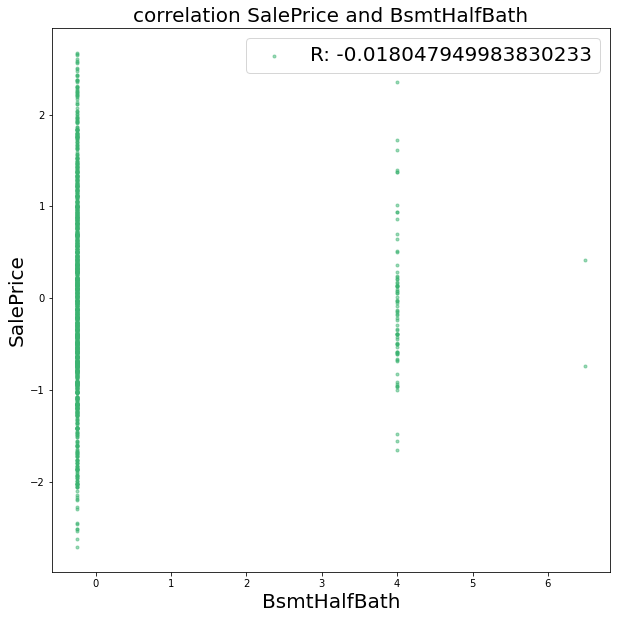

0.5650340135831365


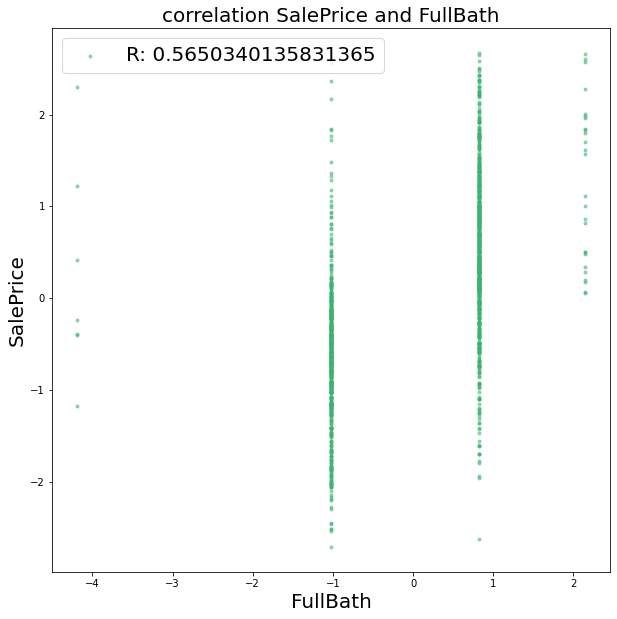

0.30335896670722623


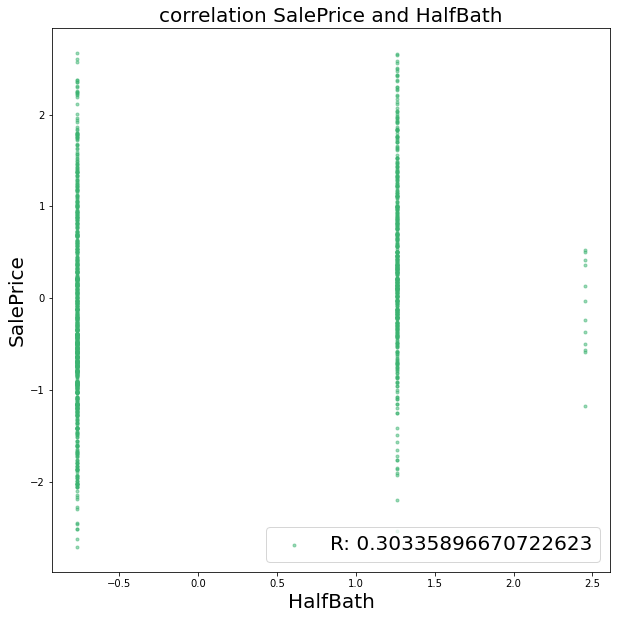

0.16707014964749836


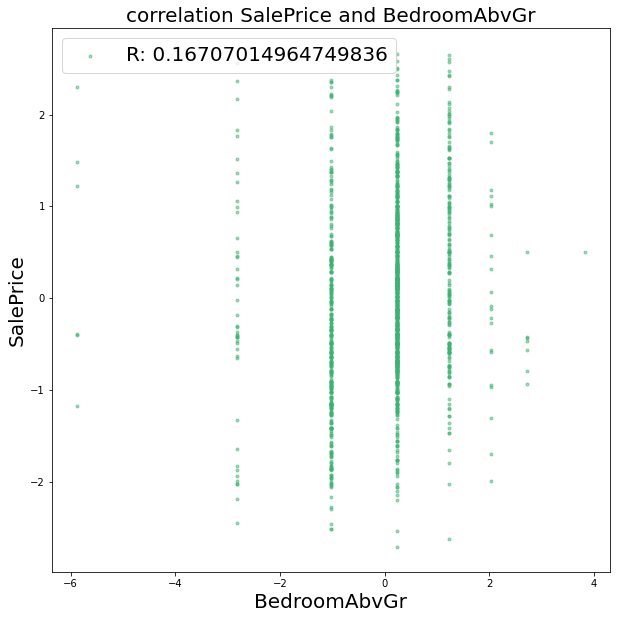

-0.15189283468698764


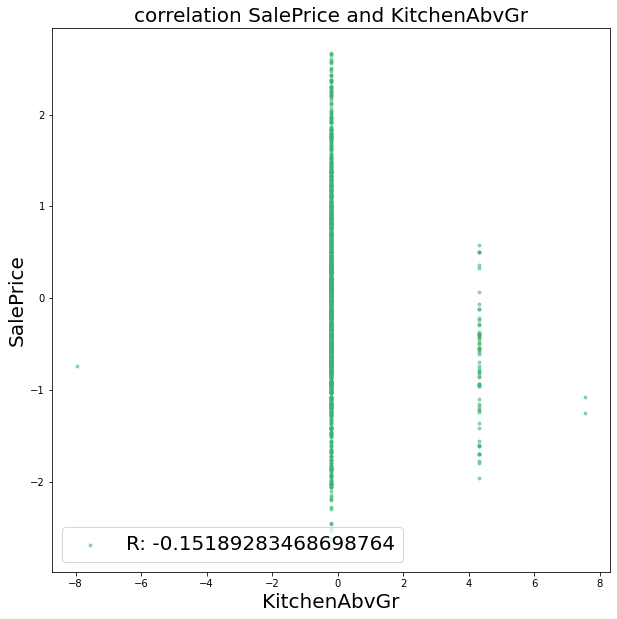

0.5022282471731038


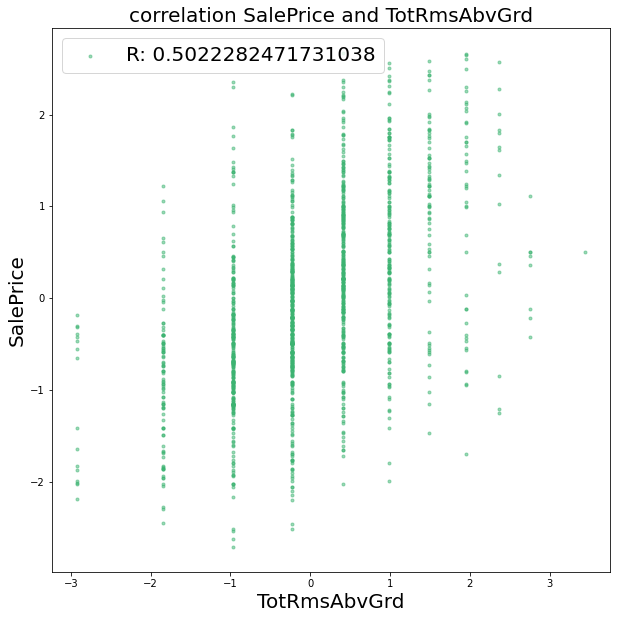

0.4985711470035486


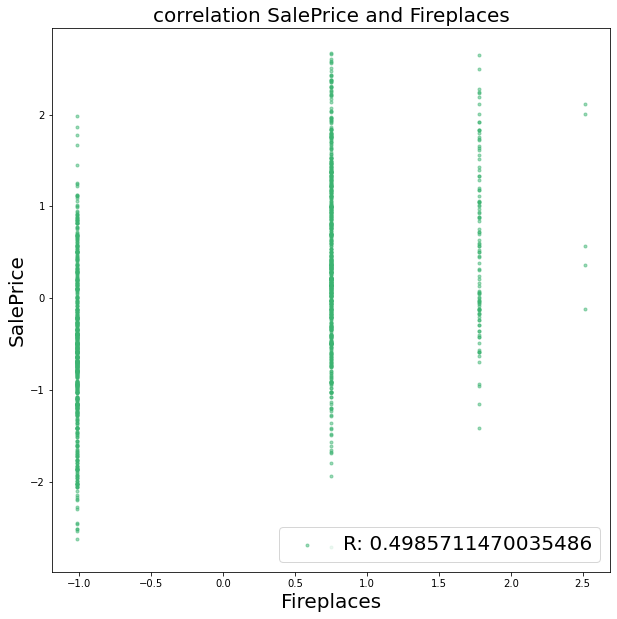

0.5600082633471629


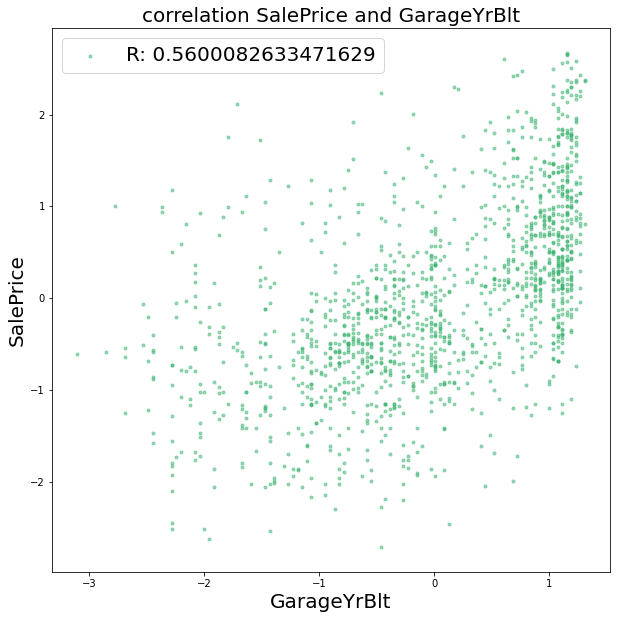

0.6204121098405091


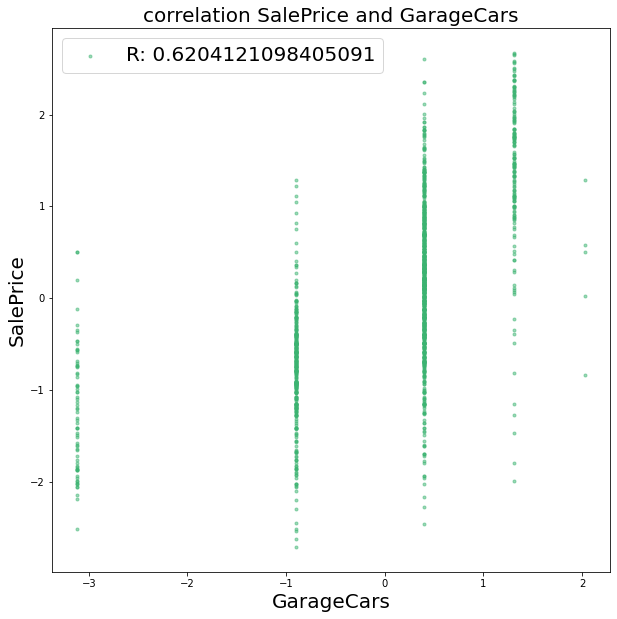

0.4208478516194829


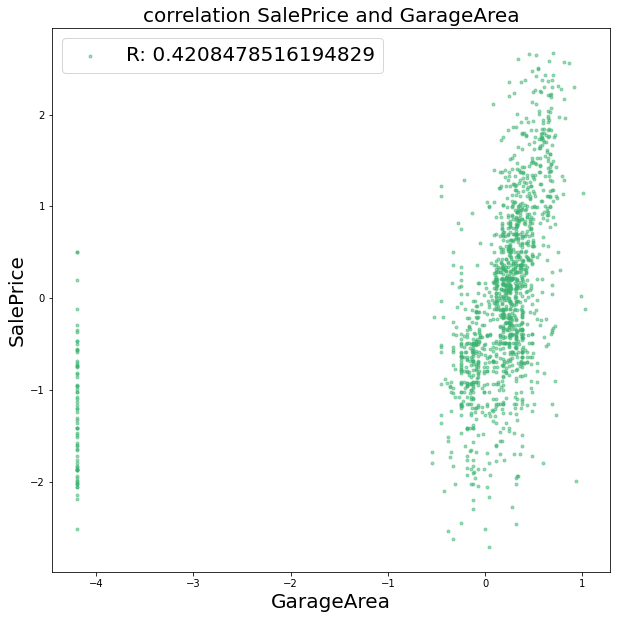

0.3318648416967787


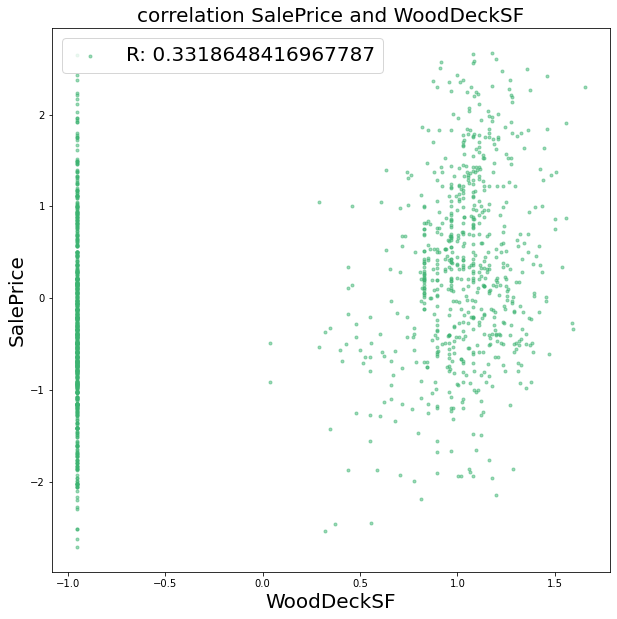

0.4610041033870948


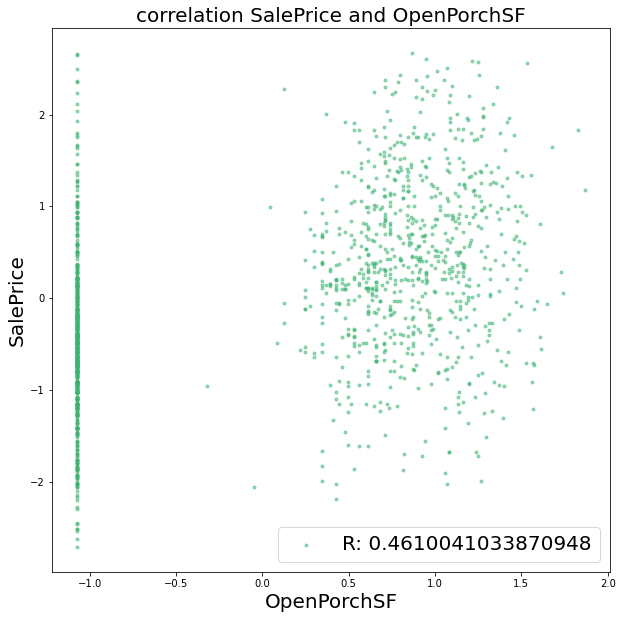

-0.20521839546393555


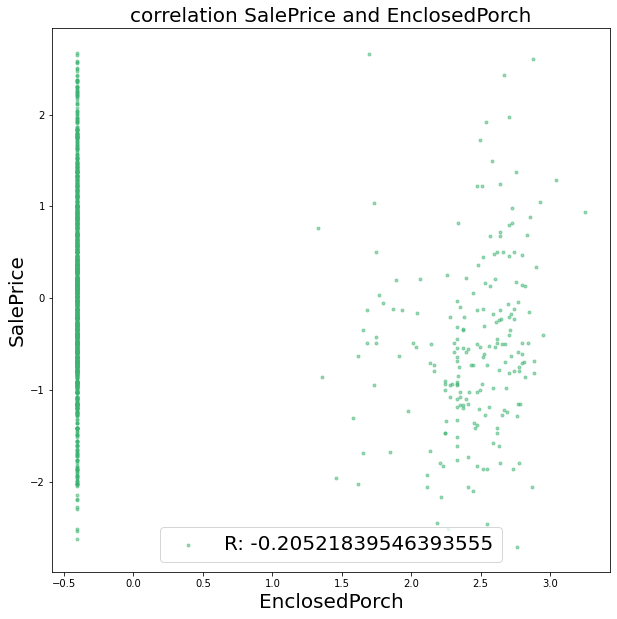

0.0652225315890198


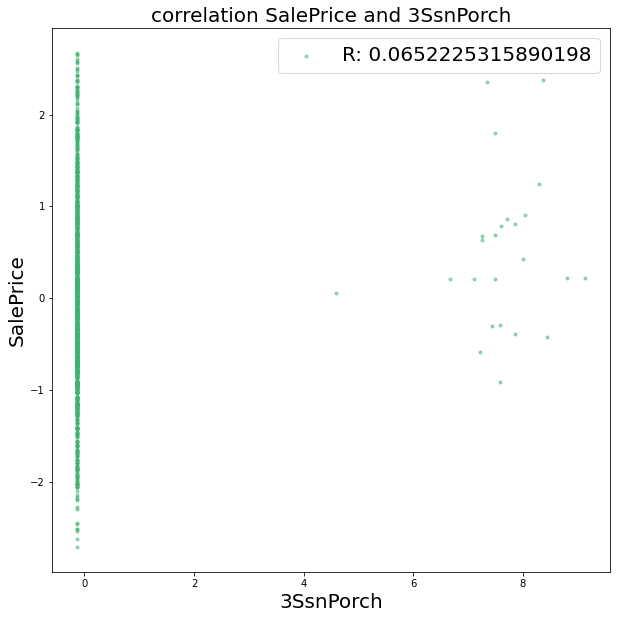

0.08445257864744242


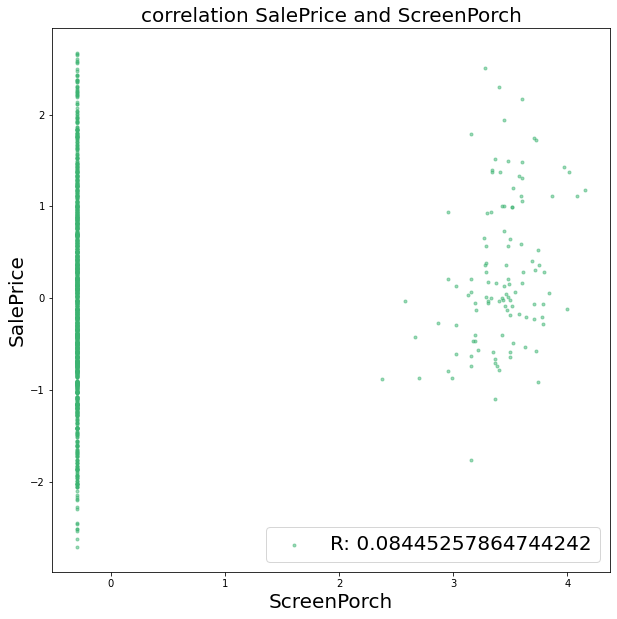

0.03940904083789445


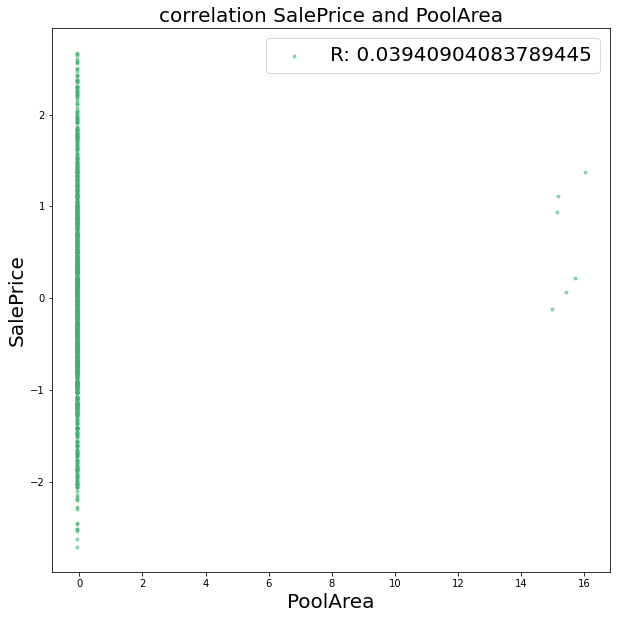

-0.05478171534019512


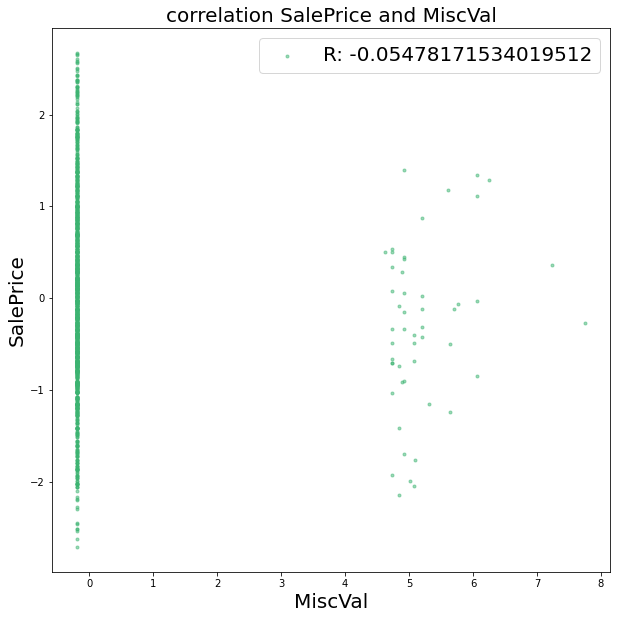

0.05251009724799524


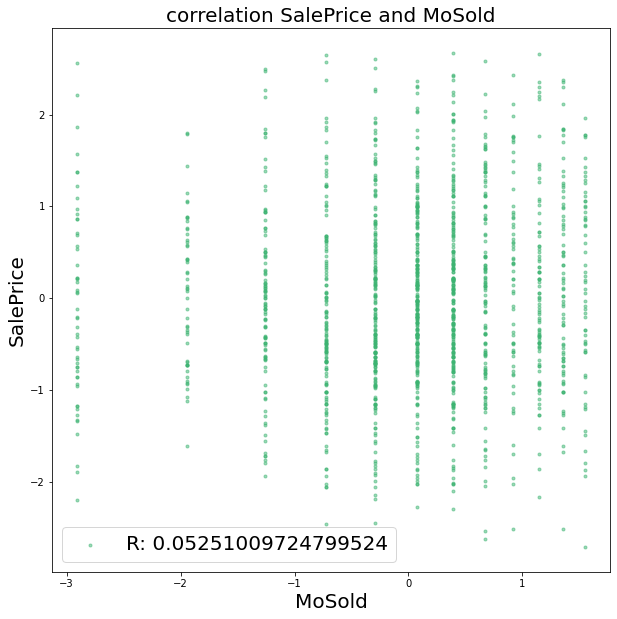

-0.028063953593504568


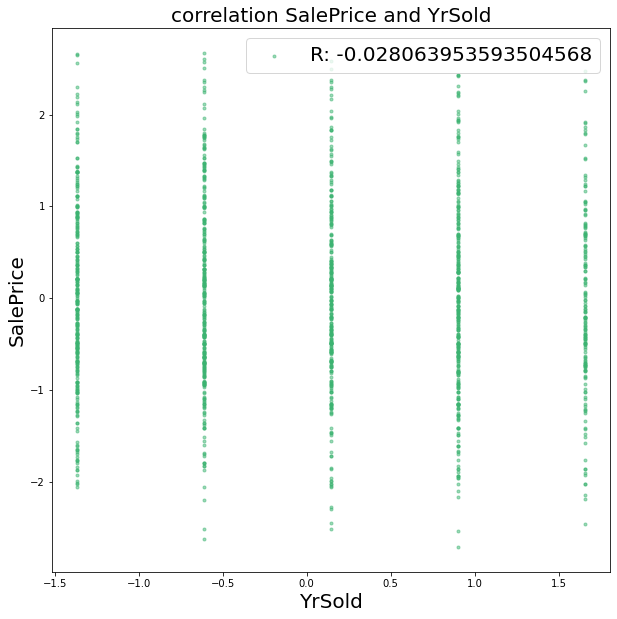

In [411]:
# correlation display
for col in num:
    if col not in ['Id', 'SalePrice']:
        r = np.corrcoef(df_train[col].values, df_train['SalePrice'].values)[0][1]
        print(r)
        plt.figure(figsize=(10, 10))
        plt.scatter(df_train[col].values, df_train['SalePrice'].values, marker='.', alpha=0.5, color = 'mediumseagreen', label="R: {}".format(r))
        plt.xlabel("{}".format(col), fontsize=20)
        plt.ylabel("SalePrice", fontsize=20)
        plt.title("correlation SalePrice and {}".format(col), fontsize=20)
        plt.legend(fontsize=20)
        plt.show()

In [412]:
# We suppress all the feature 
# which are not enough correlated
# with 'SalePrice'

# list of feature with 
# low correlation with 
# 'SalesPrice'

low_cor = cor['SalePrice'].where(abs(cor['SalePrice']) < 0.3 ).dropna().index.tolist()
for col in low_cor:
    if col != 'Id' and col != 'SalePrice':
        del(df_train[col])
        del(df_test[col])

In [413]:
# new display of correlation
new_num = []
for col in df_train:
    if col in num:
        new_num.append(col)
        
cor = df_train[new_num].corr()
cor.style.background_gradient(cmap='coolwarm').set_precision(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


In [414]:
df_train.shape

(1430, 134)

# GridSearchCV

In [474]:
# prepare the data
# Train
X = df_train.to_numpy()
X_train = X[:, :-1]
y_train = X[:, -1]

# Test
X_test = df_test.to_numpy()

In [424]:
'''
# Tune parameter for each model
reg_rf = RandomForestRegressor()
reg_gb = GradientBoostingRegressor()
reg_xg = xgb.XGBRegressor()

# Hyper parameter Grid
tuned_parameters_gb = {'n_estimators': [180]}

tuned_parameters_rf = {'n_estimators': [50, 100, 200],
                       'criterion' : ['mse', 'mae'],
                       'max_depth': [None], 
                       'min_samples_split': [2], 
                       'min_samples_leaf': [1],
                       'bootstrap': [True, False],
                       'max_features': ['auto']}

tuned_parameters_gb = {'loss': ['ls', 'lad', 'huber', 'quantile'],
                       'learning_rate': [0.1, 0.01],
                       'n_estimators': [100, 200, 300],
                       'ccp_alpha': [0, 0.01],
                       'criterion': ['friedman_mse', 'mse', 'mae']}

tuned_parameters_xg = {"colsample_bytree": [0.7, 0.3],
                       "gamma": [0, 0.5],
                       "learning_rate": [0.1, 0.03, 0.3],
                       "max_depth": [2, 6],
                       "n_estimators": [50, 100, 200],
                       "subsample": [0.6, 0.4]}
'''

In [425]:
'''
T0 = time.time()
# Split
K = 5
cv = KFold(n_splits = K, shuffle=True, random_state=0)

tune = [tuned_parameters_rf, tuned_parameters_gb, tuned_parameters_xg]
reg = [reg_rf, reg_gb, reg_xg]
job = [-1, -1, 1]
result = []

for job, reg, tune in zip(job, reg, tune):
    # GridSearch
    R = GridSearchCV(estimator=reg, param_grid=tune, cv = cv, scoring = 'neg_mean_absolute_error', n_jobs = job)
    R.fit(X_train, y_train)
    result.append(R.cv_results_)
    print(time.time() - T0)
print(time.time() - T0)
'''

556.1615896224976


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1633: FutureWarn

KeyboardInterrupt: 

In [476]:
# Cross Validation
'''
tuned_parameters_xg = {"colsample_bytree": [0.7, 0.3],
                       "gamma": [0, 0.5],
                       "learning_rate": [0.1, 0.03, 0.3],
                       "max_depth": [2, 6],
                       "n_estimators": [50, 100, 200],
                       "subsample": [0.6, 0.4]}
K = 5
cv = KFold(n_splits = K, shuffle=True, random_state=0)
reg_xg = xgb.XGBRegressor()
R = GridSearchCV(estimator=reg_xg, param_grid=tuned_parameters_xg, cv = cv, scoring = 'neg_mean_squared_error', n_jobs = 1)
R.fit(X_train, y_train)
'''

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monoto...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                         

In [477]:
# Best params
# R.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 200,
 'subsample': 0.6}

In [487]:
# refit with best params
R = xgb.XGBRegressor(colsample_bytree = 0.7,
                     gamma = 0,
                     learning_rate= 0.1,
                     max_depth = 2,
                     n_estimators = 200,
                     subsample = 0.6)

R.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Predictions and Residuals

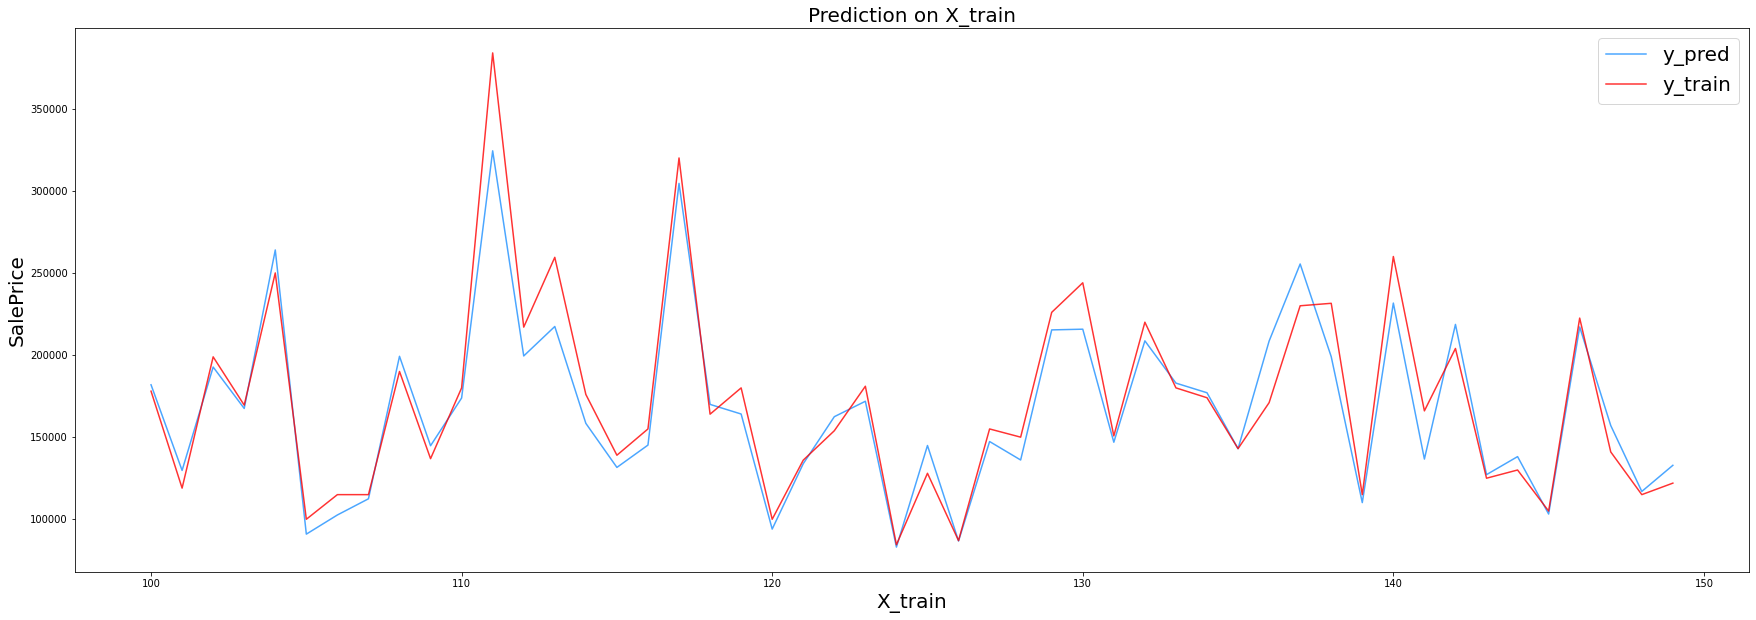

In [488]:
# prediction on X-train
start = 100
end = 150

y_pred = R.predict(X_train)
X = range(start,end)

plt.figure(figsize=(30, 10))
plt.plot(X, (np.exp(scalery.inverse_transform(y_pred)) - 1)[start:end] , alpha=0.8, color = 'dodgerblue', label="y_pred")
plt.plot(X, (np.exp(scalery.inverse_transform(y)) - 1)[start: end], alpha=0.8, color = 'red', label="y_train")
plt.xlabel("X_train", fontsize=20)
plt.ylabel("SalePrice", fontsize=20)
plt.title("Prediction on X_train", fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [489]:
mean_squared_error(y, y_pred)

0.0654450768825486

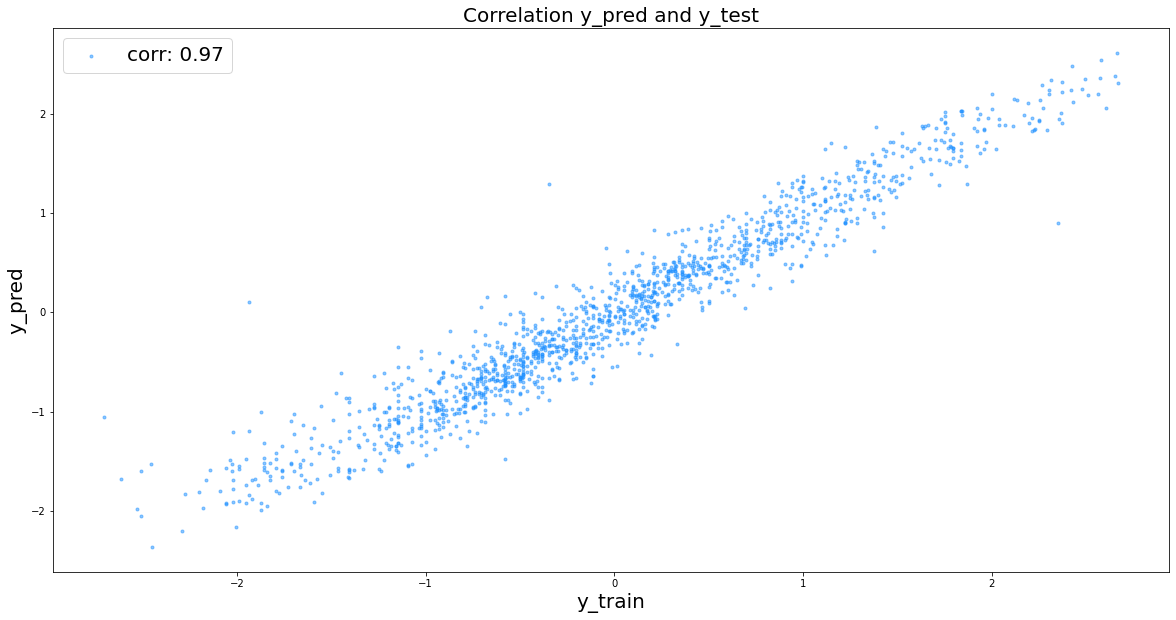

In [490]:
# Correlation
y_pred = R.predict(X_train)
r = np.corrcoef(y_pred, y_train)[0,1]
plt.figure(figsize=(20, 10))
plt.scatter(y_train, y_pred, marker='.', alpha=0.5, color = 'dodgerblue', label="corr: {0:.2f}".format(r))
plt.xlabel("y_train", fontsize=20)
plt.ylabel("y_pred", fontsize=20)
plt.title("Correlation y_pred and y_test", fontsize=20)
plt.legend(fontsize=20)
plt.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


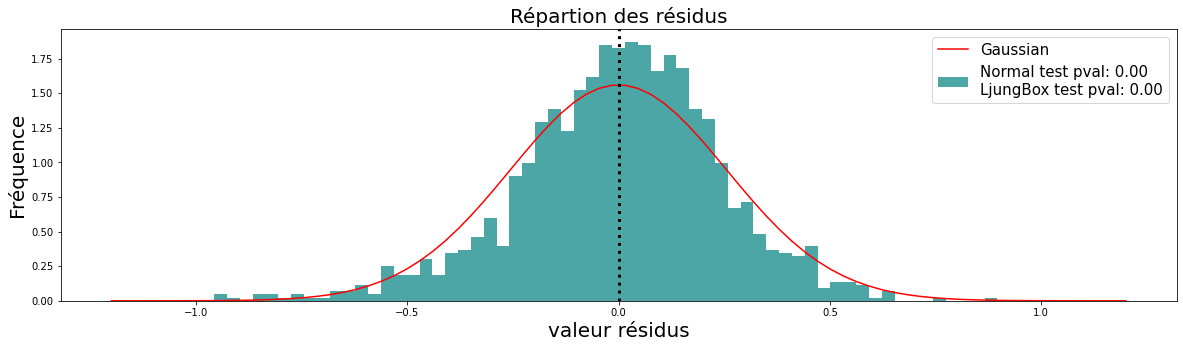

In [491]:
# Normal test (Kolmogorov Smirnoff)
# LjungBox test

resid = y_train-y_pred
_, pval1 = kstest_normal(y_train-y_pred, dist='norm')
_, pval2 = acorr_ljungbox(y_train - y_pred, lags=[9])

# Dislplay
plt.figure(figsize=(20,5))
_, b, _ = plt.hist(resid, bins=np.linspace(-1.2, 1.2, 80), alpha=0.7, color='teal', density=True, label='Normal test pval: {0:.2f}\nLjungBox test pval: {0:.2f}'.format(pval1, pval2))
plt.plot(b, norm.pdf(b, loc=np.mean(resid), scale=np.std(resid)), color='r', label='Gaussian')
plt.axvline(x=0, color='black', lw=3, ls=':')
plt.title("Répartion des résidus", fontsize=20)
plt.xlabel("valeur résidus", fontsize=20)
plt.ylabel("Fréquence", fontsize=20)
plt.legend(fontsize=15)
plt.show()

# Submit

In [492]:
y_pred = R.predict(X_test)
y_pred = np.exp(scalery.inverse_transform(y_pred)) - 1

df = pd.DataFrame()
df['Id'] = idx_test['Id'].values
df['SalePrice'] = y_pred
df.head(10)

Id      SalePrice
0  1461  121847.648438
1  1462  158716.812500
2  1463  189799.250000
3  1464  193015.000000
4  1465  194655.968750
5  1466  175837.968750
6  1467  163843.453125
7  1468  165973.671875
8  1469  193830.312500
9  1470  127829.804688

In [493]:
# Creation files.csv

df.to_csv('submission.csv', index=False)